# Sparse and Non Negative Shallow Auto Encoder with PADO, without original images
* Sparsity Regularizer : KL Divergence (KLdivSum), applied to the activation.
* Non-Negativity Regularizer : Non Negativity Constraint
* Number of epochs for training: 500 epochs
* Activation of the encoder: Sigmoid
* Encoder architecture: infoGAN
* Activation of the decoder: LeakyRELU (useless in case of Non-Negativity)
## Impact of the value of the sparsity parameters
* Sparsity objective: 0.01, 0.05, 0.1, 0.2
* Sparsity weight: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5

### Addition of an PADO preprocessing, as well as the original images
* Input: Positive Additive Decomposition of Openings by reconstruction with a decreasing structuring element
* Original images (before the decomposition) included as input to the AE

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from nonNegSparseShallowAE import Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
FILE_PATH = "../"
x_test, _ = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=False)
x_small = x_test[:10]
x_small[2] = x_test[31]
print('x_small shape:', x_small.shape)

x_small shape: (10, 28, 28, 1)


In [3]:
x_small_PADO = morphoMaths.positive_decomposition_by_openings_by_rec(x_small[:,:,:,0], levels=5, step=1, init_step=1, add_original_images=True)
x_small_PADO.shape

/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:143: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  selem[[slice(d, d + 1) for d in offset]] = False
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:161: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  images[[0] + inside_slices] = seed
/home/bastien/.conda/envs/StageENV/lib/python3.6/site-packages/skimage/morphology/greyreconstruct.py:162: FutureWarning: Using a non-tuple sequence for mult

(10, 28, 28, 7)

In [4]:
results = pd.read_csv("../Results/ShallowAE/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_10results")
results

Unnamed: 0  sparsity_objective  sparsity_weight  test_error  test_kl_loss  \
0            0                0.01           0.0001    0.016688      0.001127   
1            1                0.05           0.0001    0.013128      0.001017   
2            2                0.10           0.0001    0.010819      0.000709   
3            3                0.20           0.0001    0.009559      0.000266   
4            4                0.01           0.0005    0.018865      0.002520   
5            5                0.05           0.0005    0.015086      0.001740   
6            6                0.10           0.0005    0.012374      0.000906   
7            7                0.20           0.0005    0.010316      0.000227   
8            8                0.01           0.0010    0.019494      0.003059   
9            9                0.05           0.0010    0.017419      0.001505   
10          10                0.10           0.0010    0.013201      0.000816   
11          11                0.20           0.0010    0.009823      0.000217   
12          12                0.01           0.0050    0.029792      0.004078   
13          13                0.05           0.0050    0.016771      0.001161   
14          14                0.10           0.0050    0.012938      0.000649   
15          15                0.20           0.0050    0.010381      0.000484   
16          16                0.01           0.0100    0.033339      0.005414   
17          17                0.05           0.0100    0.016600      0.001143   
18          18                0.10           0.0100    0.012423      0.000889   
19          19                0.20           0.0100    0.009850      0.000742   
20          20                0.01           0.0500    0.059509      0.003861   
21          21                0.05           0.0500    0.018590      0.002792   
22          22                0.10           0.0500    0.015459      0.003829   
23          23                0.20           0.0500    0.011208      0.004713   
24          24                0.01           0.1000    0.046116      0.008899   
25          25                0.05           0.1000    0.019703      0.006795   
26          26                0.10           0.1000    0.014868      0.007909   
27          27                0.20           0.1000    0.014237      0.025053   
28          28                0.01           0.5000    0.074505      0.003595   
29          29                0.05           0.5000    0.060675      0.115405   
30          30                0.10           0.5000    0.042795      0.756310   
31          31                0.20           0.5000    0.027709      0.465711   

    test_max_approx_error_toOriginal_dilatation  \
0                                      0.507910   
1                                      0.886173   
2                                      1.211838   
3                                      1.729795   
4                                      0.172020   
5                                      0.313286   
6                                      0.520725   
7                                      1.140199   
8                                      0.084652   
9                                      0.133591   
10                                     0.405449   
11                                     1.088532   
12                                     0.032713   
13                                     0.073647   
14                                     0.304959   
15                                     1.113970   
16                                     0.039459   
17                                     0.072985   
18                                     0.310197   
19                                     1.081152   
20                                     0.078194   
21                                     0.068103   
22                                     0.244871   
23                                     0.855707   
24                                     0.055809   
25  

In [5]:
max_values = results.max(axis=0)
max_idx = results.idxmax()
min_values = results.min(axis=0)
min_idx = results.idxmin()
median_values = results.median()
std_values = results.std()
sparsity_objectives = results['sparsity_objective']
sparsity_weights = results['sparsity_weight']

In [6]:

print('***********************Maximum values**********************')
print(max_values[1:])
print('\n')
print('***********************Minimum values**********************')
print(min_values[1:])
print('\n')
print('***********************Median values**********************')
print(median_values[1:])


***********************Maximum values**********************
sparsity_objective                                 0.200000
sparsity_weight                                    0.500000
test_error                                         0.074505
test_kl_loss                                       0.756310
test_max_approx_error_toOriginal_dilatation        1.729795
test_max_approx_error_toRec_dilatation             1.771501
test_sparsity                                      0.781080
training_error                                     0.074426
training_kl_loss                                   0.220698
training_max_approx_error_toOriginal_dilatation    1.734210
training_max_approx_error_toRec_dilatation         1.773948
training_sparsity                                  0.778884
dtype: float64


***********************Minimum values**********************
sparsity_objective                                 0.010000
sparsity_weight                                    0.000100
test_error             

In [7]:
print('\033[1m'+'Lowest error: '+'\033[0m' , round(min_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_error']], ', sparsity_weight=', sparsity_weights[min_idx['test_error']], '\n')
print('\033[1m'+'Highest error: '+'\033[0m', round(max_values['test_error'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_error']], ', sparsity_weight=', sparsity_weights[max_idx['test_error']], '\n')
print('\033[1m'+'Least sparse: '+'\033[0m' , round(min_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[min_idx['test_sparsity']], '\n')
print('\033[1m'+'Most sparse: '+'\033[0m', round(max_values['test_sparsity'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_sparsity']], ', sparsity_weight=', sparsity_weights[max_idx['test_sparsity']], '\n')
print('\033[1m'+'Lowest Max-approximation error to dilatation of the originals: '+'\033[0m' , round(min_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Highest  Max-approximation error to dilatation of the originals: '+'\033[0m', round(max_values['test_max_approx_error_toOriginal_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toOriginal_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toOriginal_dilatation']], '\n')
print('\033[1m'+'Lowest KL-loss: '+'\033[0m' , round(min_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[min_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[min_idx['test_kl_loss']], '\n')
print('\033[1m'+'Highest KL-loss: '+'\033[0m', round(max_values['test_kl_loss'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_kl_loss']], ', sparsity_weight=', sparsity_weights[max_idx['test_kl_loss']], '\n')
print('\033[1m'+'Lowest max-approximation error to dilatation of the reconstruction: '+'\033[0m' , round(min_values['test_max_approx_error_toRec_dilatation'], 5), ', sparsity_objective=',sparsity_objectives[min_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[min_idx['test_max_approx_error_toRec_dilatation']], '\n')
print('\033[1m'+'Highest max-approximation error to dilatation of the reconstruction: '+'\033[0m', round(max_values['test_max_approx_error_toRec_dilatation'], 4), ', sparsity_objective=',sparsity_objectives[max_idx['test_max_approx_error_toRec_dilatation']], ', sparsity_weight=', sparsity_weights[max_idx['test_max_approx_error_toRec_dilatation']], '\n')


Lowest error:  0.0096 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 

Highest error:  0.0745 , sparsity_objective= 0.01 , sparsity_weight= 0.5 

Least sparse:  0.1653 , sparsity_objective= 0.01 , sparsity_weight= 0.5 

Most sparse:  0.7811 , sparsity_objective= 0.01 , sparsity_weight= 0.005 

Lowest Max-approximation error to dilatation of the originals:  0.0327 , sparsity_objective= 0.01 , sparsity_weight= 0.005 

Highest  Max-approximation error to dilatation of the originals:  1.7298 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 

Lowest KL-loss:  0.0002 , sparsity_objective= 0.2 , sparsity_weight= 0.001 

Highest KL-loss:  0.7563 , sparsity_objective= 0.1 , sparsity_weight= 0.5 

Lowest max-approximation error to dilatation of the reconstruction:  0.00053 , sparsity_objective= 0.01 , sparsity_weight= 0.5 

Highest max-approximation error to dilatation of the reconstruction:  1.7715 , sparsity_objective= 0.2 , sparsity_weight= 0.0001 



Nb:
* Lowest error reached with weakest sparsity constraints.
* Highest error reached with strongest sparsity constraints.
* The lowest sparsity measuer is not significant, as if all coefficients are very close to zero but are similar, then the sparsity measure from Hoyer 2004 is close to 0.
* Highest max-approximation error to dilatation of the originals and of the reconstruction reached with the weakest sparsity constraint.

In [8]:
sparsity_objectives = np.load('../Results/ShallowAE/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_10_sparsityObjectives_dim100.npy')
sparsity_weights = np.load('../Results/ShallowAE/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_10_sparsityWeights_dim100.npy')
test_mse = np.load('../Results/ShallowAE/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_10_test_errors_dim100.npy')
train_mse = np.load('../Results/ShallowAE/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_10_training_errors_dim100.npy')
test_kl_loss = np.load('../Results/ShallowAE/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_10_test_kl_loss_dim100.npy')
train_kl_loss = np.load('../Results/ShallowAE/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_10_training_kl_loss_dim100.npy')
test_max_approx_to_Original = np.load('../Results/ShallowAE/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_10_test_max_approx_error_toOriginal_dilation_dim100.npy')
train_max_approx_to_Original = np.load('../Results/ShallowAE/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_10_training_max_approx_error_toOriginal_dilatation_dim100.npy')
test_max_approx_to_Rec = np.load('../Results/ShallowAE/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_10_test_max_approx_error_toRec_dilation_dim100.npy')
train_max_approx_to_Rec = np.load('../Results/ShallowAE/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_10_training_max_approx_error_toRec_dilatation_dim100.npy')
test_sparsity = np.load('../Results/ShallowAE/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_10_test_sparsity_dim100.npy')
train_sparsity = np.load('../Results/ShallowAE/SeveralChannels/WithPADO/Sparse_NonNeg/KLdivSum_NonNegConstraint/TestOutputs/18_09_10_training_sparsity_dim100.npy')

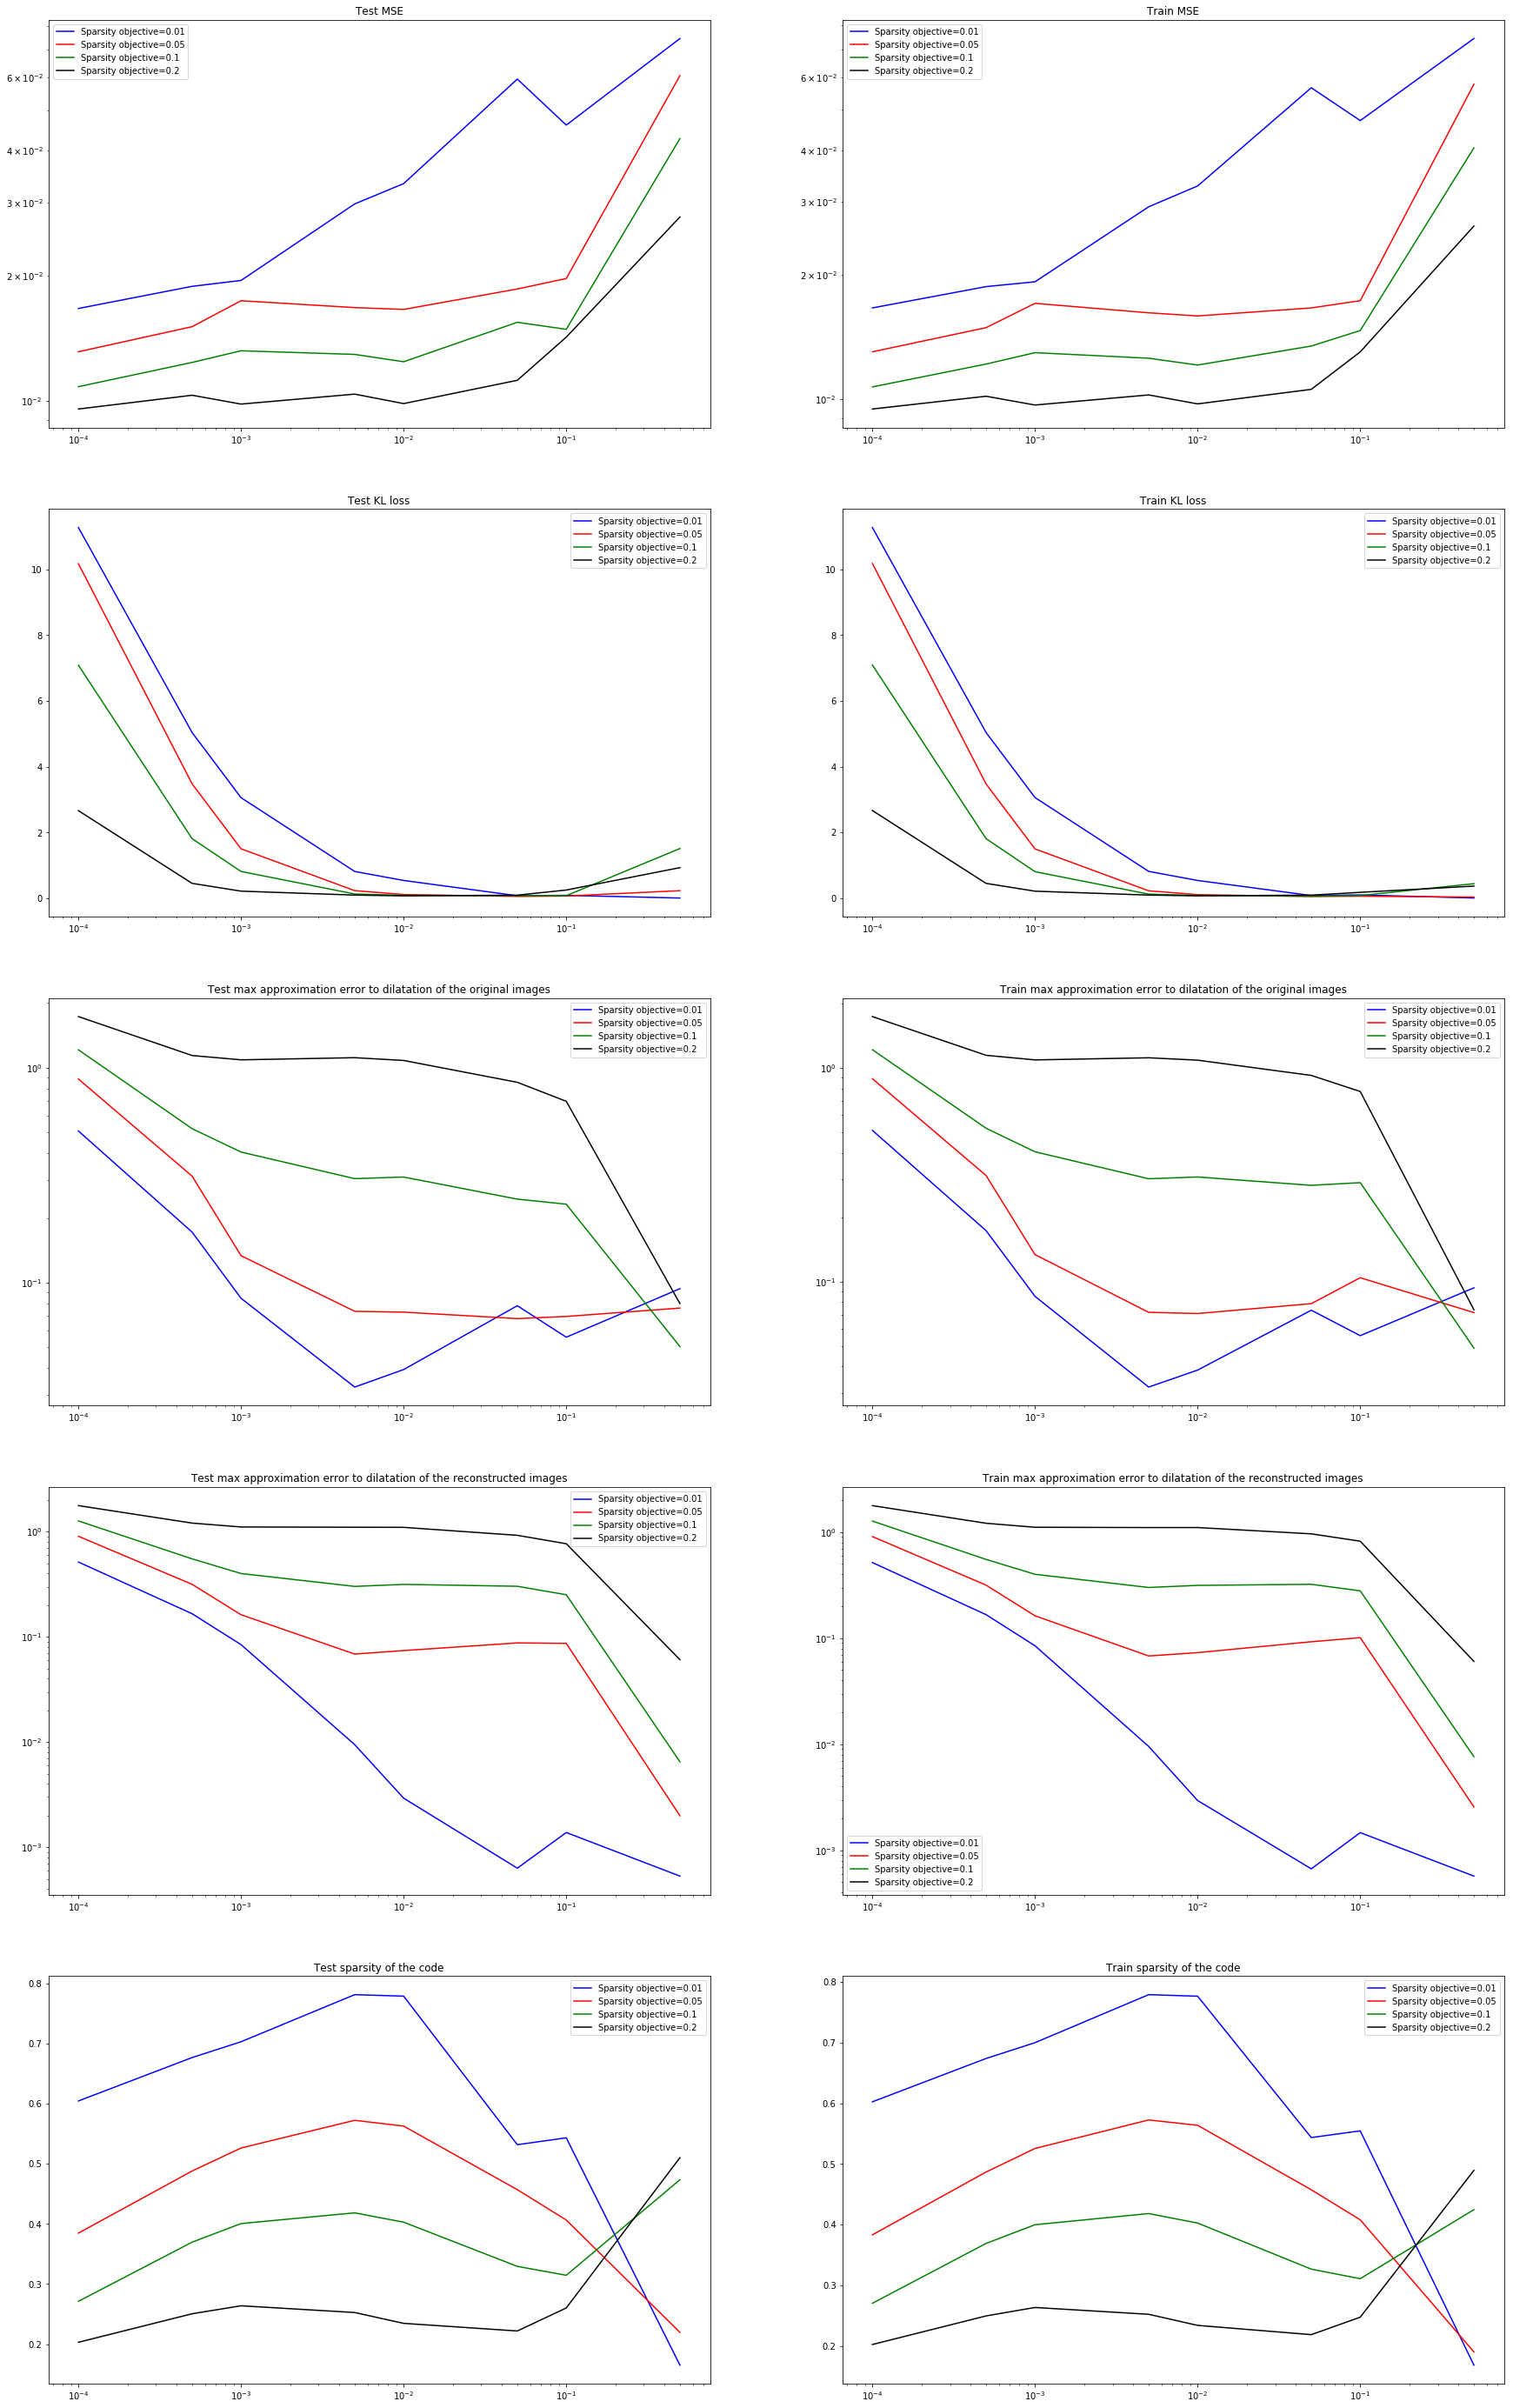

In [9]:
plt.figure(figsize=(30,50))

ax = plt.subplot(5, 2, 1)
ax.plot(sparsity_weights, test_mse[:,0], 'b')
ax.plot(sparsity_weights, test_mse[:,1], 'r')
ax.plot(sparsity_weights, test_mse[:,2], 'g')
ax.plot(sparsity_weights, test_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test MSE')

ax = plt.subplot(5, 2, 2)
ax.plot(sparsity_weights, train_mse[:,0], 'b')
ax.plot(sparsity_weights, train_mse[:,1], 'r')
ax.plot(sparsity_weights, train_mse[:,2], 'g')
ax.plot(sparsity_weights, train_mse[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train MSE')

ax = plt.subplot(5, 2, 3)
ax.plot(sparsity_weights, test_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, test_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, test_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, test_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test KL loss')


ax = plt.subplot(5, 2, 4)
ax.plot(sparsity_weights, train_kl_loss[:,0]/sparsity_weights, 'b')
ax.plot(sparsity_weights, train_kl_loss[:,1]/sparsity_weights, 'r')
ax.plot(sparsity_weights, train_kl_loss[:,2]/sparsity_weights, 'g')
ax.plot(sparsity_weights, train_kl_loss[:,3]/sparsity_weights, 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train KL loss')

ax = plt.subplot(5, 2, 5)
ax.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 6)
ax.plot(sparsity_weights, train_max_approx_to_Original[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Original[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the original images')


ax = plt.subplot(5, 2, 7)
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test max approximation error to dilatation of the reconstructed images')

ax = plt.subplot(5, 2, 8)
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,0], 'b')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,1], 'r')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,2], 'g')
ax.plot(sparsity_weights, train_max_approx_to_Rec[:,3], 'k')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train max approximation error to dilatation of the reconstructed images')


ax = plt.subplot(5, 2, 9)
ax.plot(sparsity_weights, test_sparsity[:,0], 'b')
ax.plot(sparsity_weights, test_sparsity[:,1], 'r')
ax.plot(sparsity_weights, test_sparsity[:,2], 'g')
ax.plot(sparsity_weights, test_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Test sparsity of the code')


ax = plt.subplot(5, 2, 10)
ax.plot(sparsity_weights, train_sparsity[:,0], 'b')
ax.plot(sparsity_weights, train_sparsity[:,1], 'r')
ax.plot(sparsity_weights, train_sparsity[:,2], 'g')
ax.plot(sparsity_weights, train_sparsity[:,3], 'k')
ax.set_xscale('log')
ax.legend(['Sparsity objective=0.01', 'Sparsity objective=0.05', 'Sparsity objective=0.1', 'Sparsity objective=0.2'])
ax.set_title('Train sparsity of the code')

plt.show()

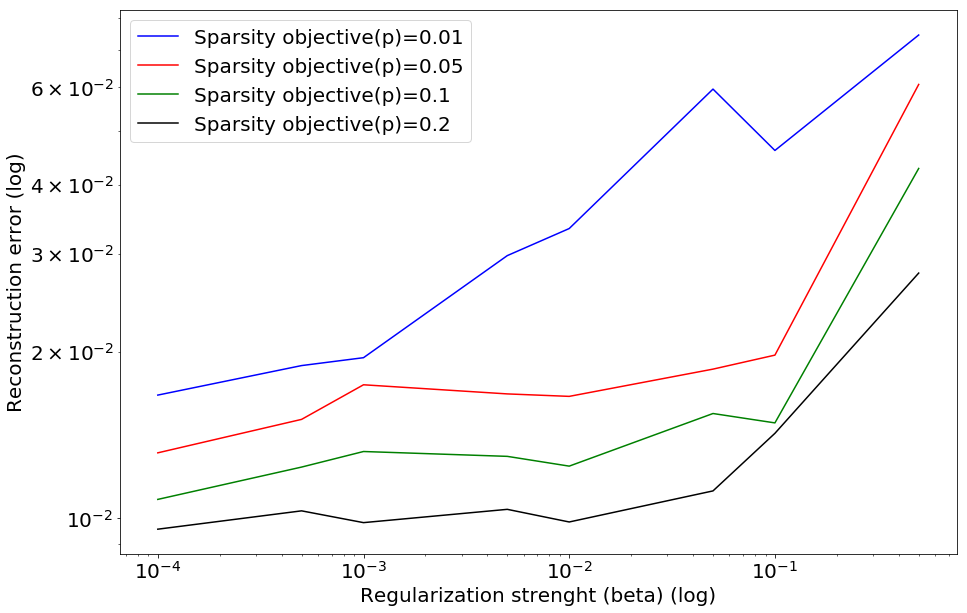

In [10]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_mse[:,0], 'b')
plt.plot(sparsity_weights, test_mse[:,1], 'r')
plt.plot(sparsity_weights, test_mse[:,2], 'g')
plt.plot(sparsity_weights, test_mse[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Reconstruction error (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

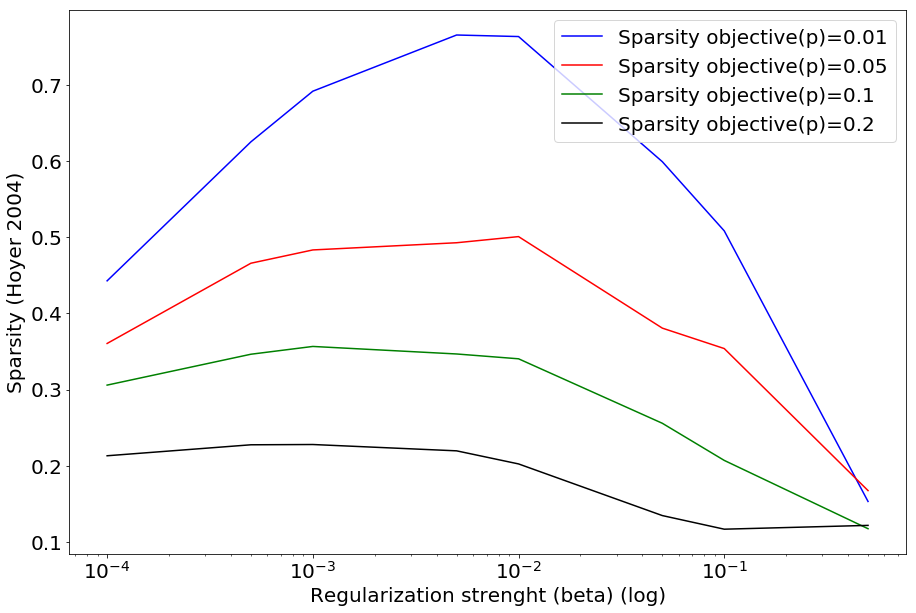

In [14]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_sparsity[:,0], 'b')
plt.plot(sparsity_weights, test_sparsity[:,1], 'r')
plt.plot(sparsity_weights, test_sparsity[:,2], 'g')
plt.plot(sparsity_weights, test_sparsity[:,3], 'k')
plt.xscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Sparsity (Hoyer 2004)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

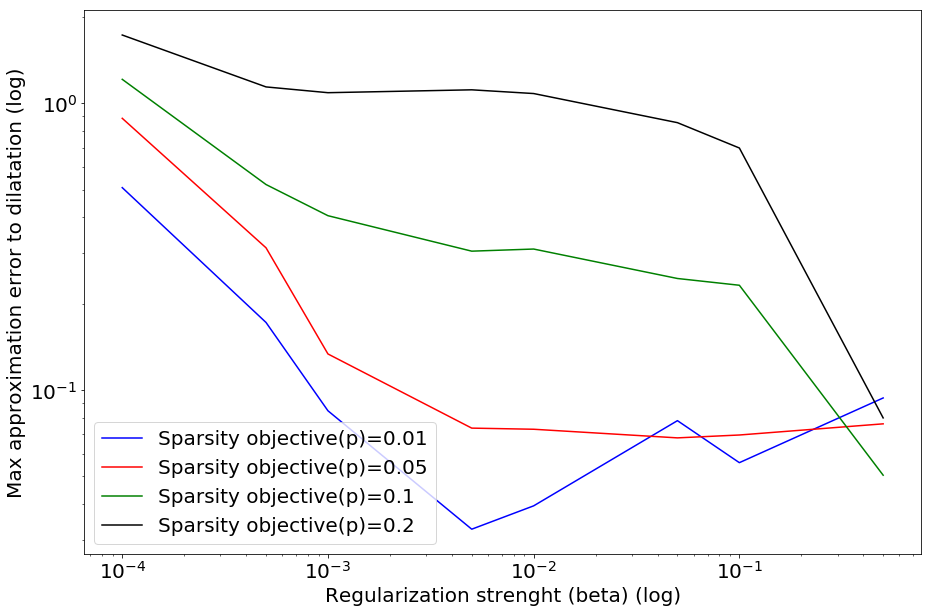

In [11]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_max_approx_to_Original[:,0], 'b')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,1], 'r')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,2], 'g')
plt.plot(sparsity_weights, test_max_approx_to_Original[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Max approximation error to dilatation (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

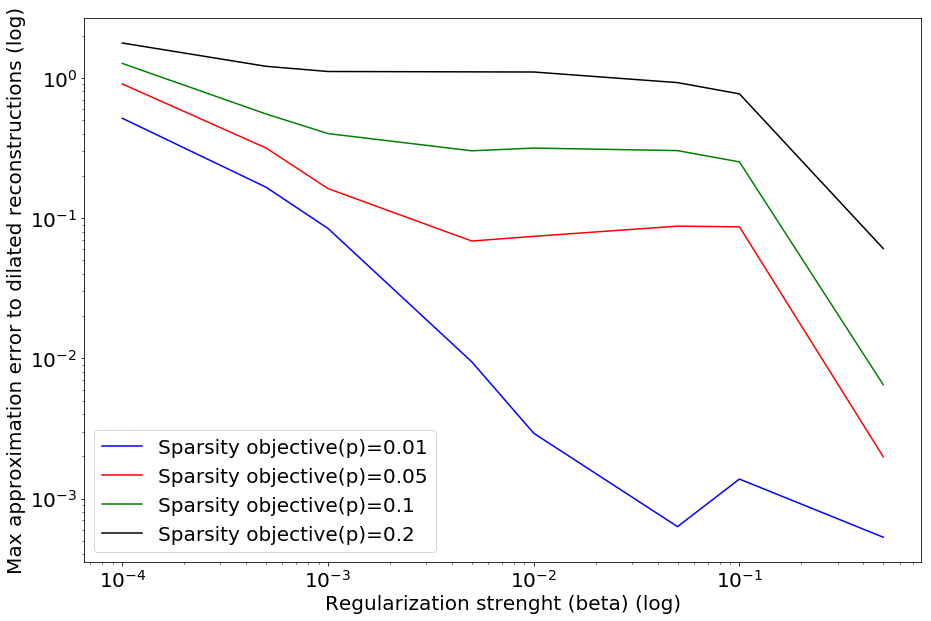

In [12]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 20
plt.figure(figsize=(15,10))
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,0], 'b')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,1], 'r')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,2], 'g')
plt.plot(sparsity_weights, test_max_approx_to_Rec[:,3], 'k')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Sparsity objective(p)=0.01', 'Sparsity objective(p)=0.05', 'Sparsity objective(p)=0.1', 'Sparsity objective(p)=0.2'])
plt.ylabel('Max approximation error to dilated reconstructions (log)')
plt.xlabel('Regularization strenght (beta) (log)')
plt.show()

# 1. Sparsity_Objective = 0.01

## 1.1 Sparsity_weight = 0.0001 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.016687772473692894


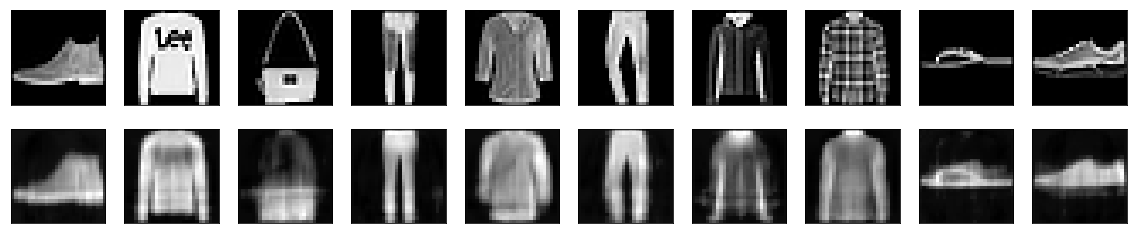

Histograms of the encodings - Sparsity (Hoyer):  0.604381799697876


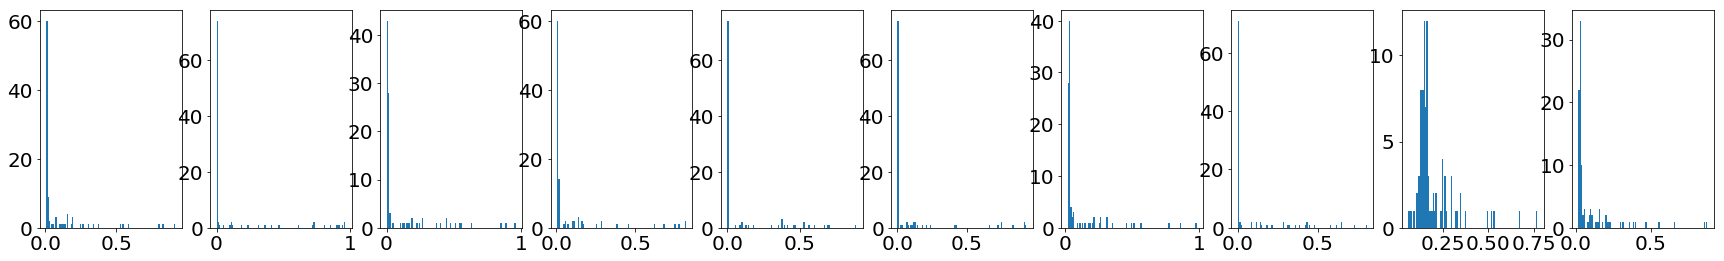

Atom images of the decoder


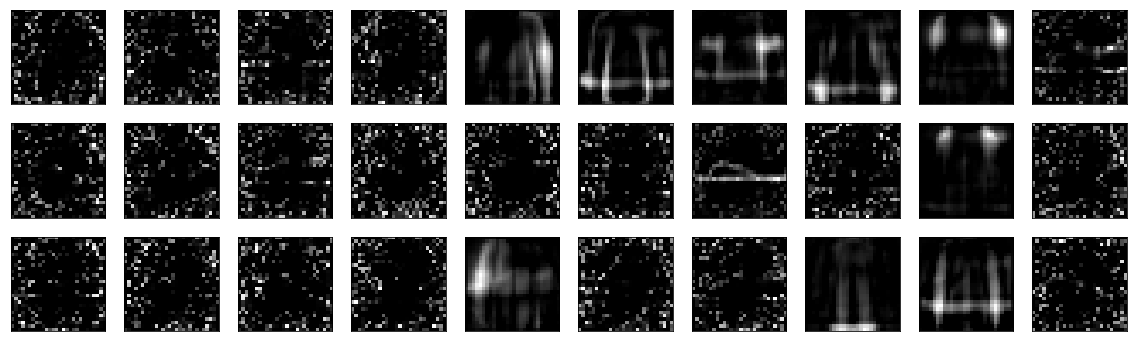

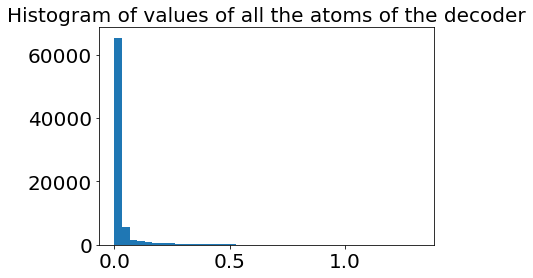

In [13]:
i = np.arange(8)[sparsity_weights==0.0001][0]
j = np.arange(4)[sparsity_objectives==0.01][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_0.0001_0.01_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


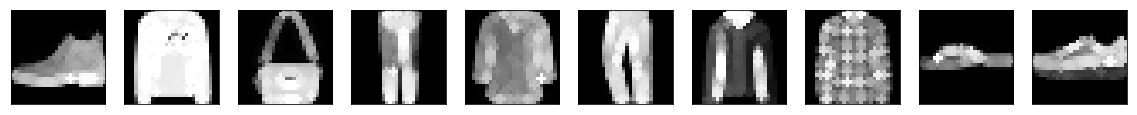

Dilatation of the reconstructions


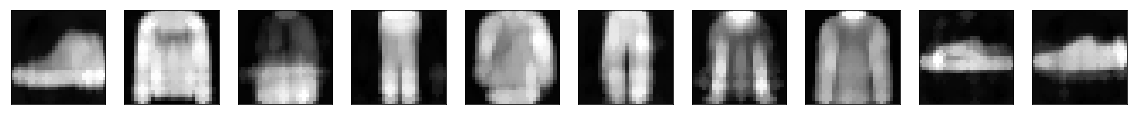

Original images and max-approximation to dilatation
Max-approx error to original:  0.507909575843811  - Max-approx error to reconstruction:  0.51502934923172


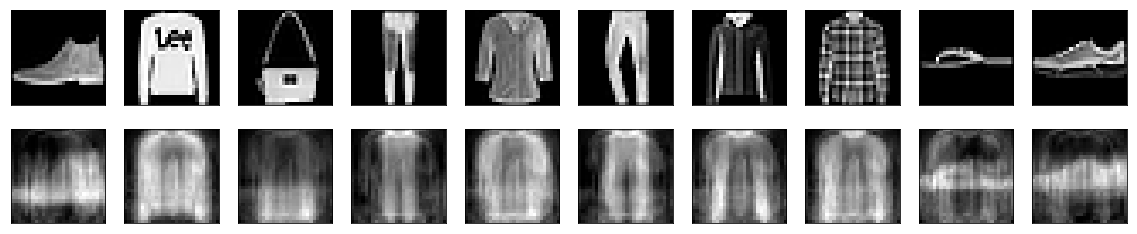

Dilated of the atom images of the decoder


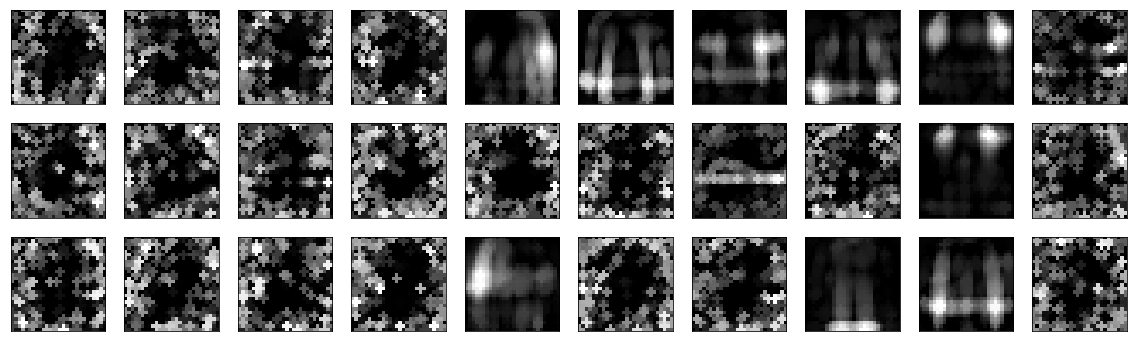

In [14]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.2 Sparsity_weight = 0.0005 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.01886519300043583


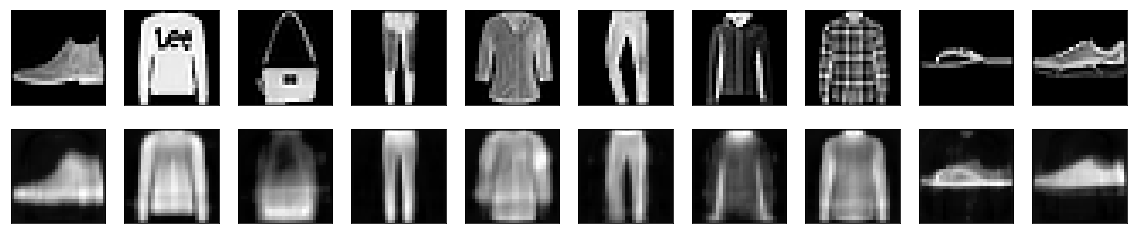

Histograms of the encodings - Sparsity (Hoyer):  0.6764942407608032


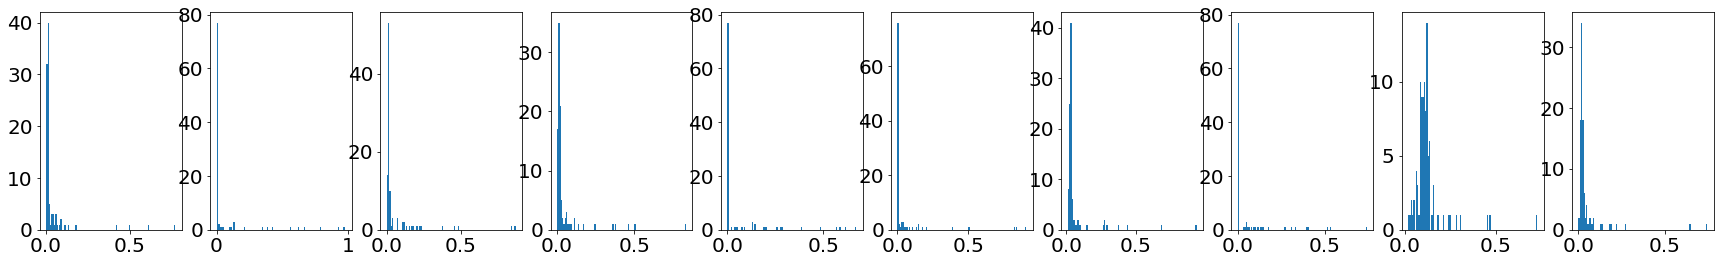

Atom images of the decoder


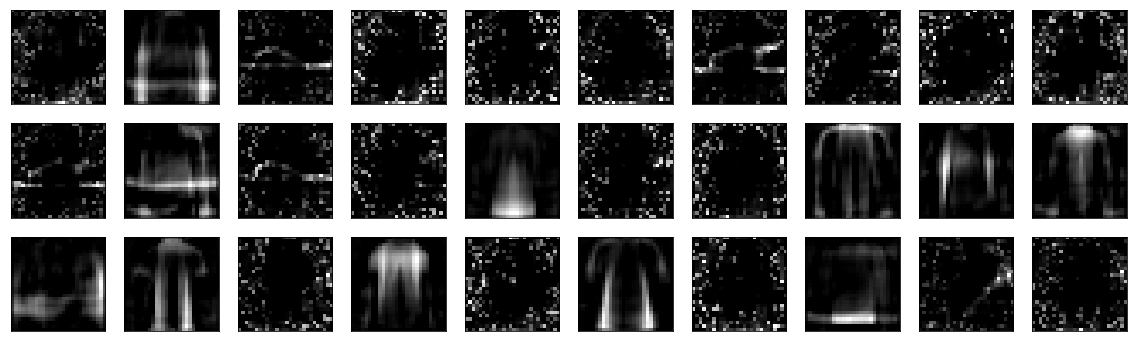

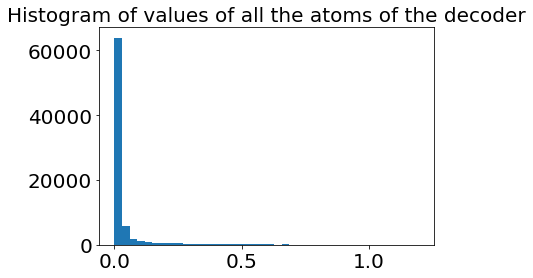

In [15]:
sp_o = 0.01
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


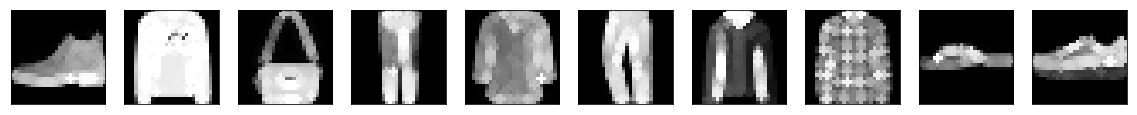

Dilatation of the reconstructions


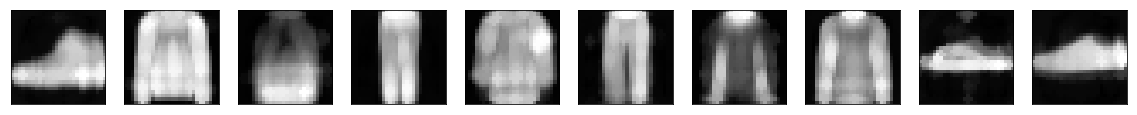

Original images and max-approximation to dilatation
Max-approx error to original:  0.17202045786380768  - Max-approx error to reconstruction:  0.16605245831012727


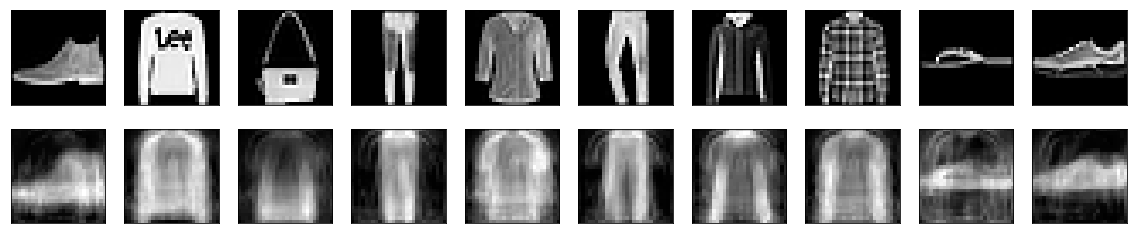

Dilated of the atom images of the decoder


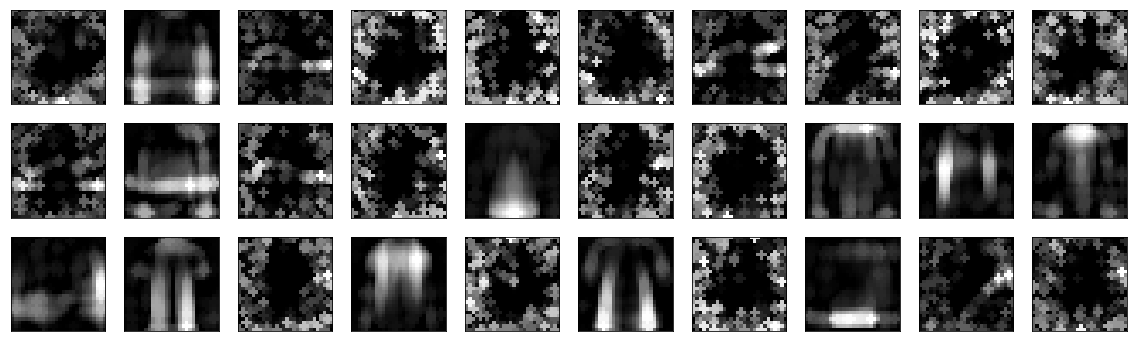

In [16]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.3 Sparsity_weight = 0.001 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.01949375157356262


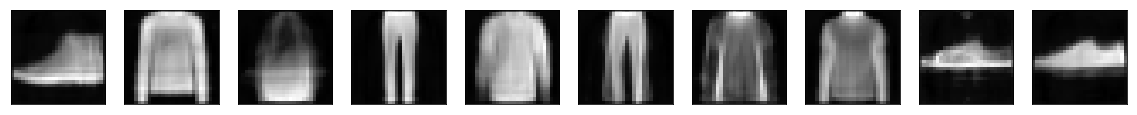

Histograms of the encodings - Sparsity (Hoyer):  0.7027737498283386


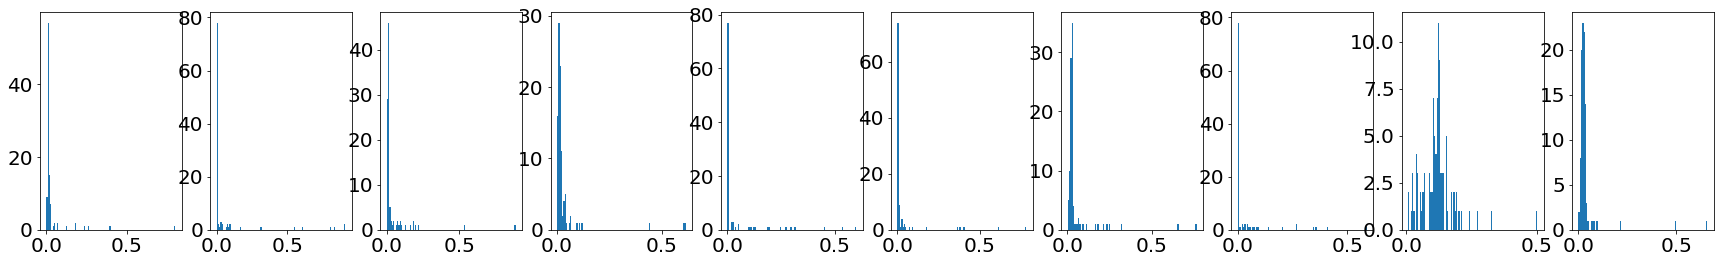

Atom images of the decoder


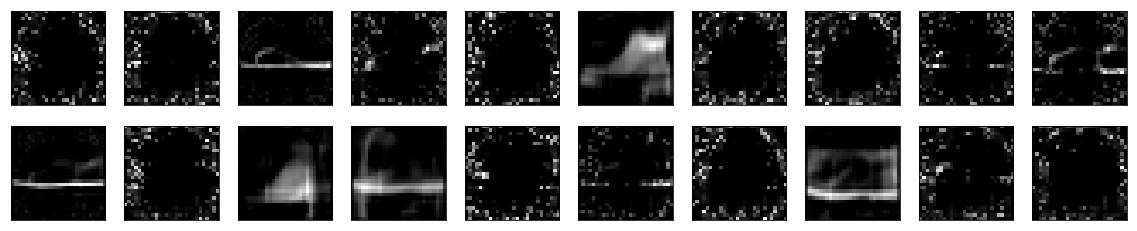

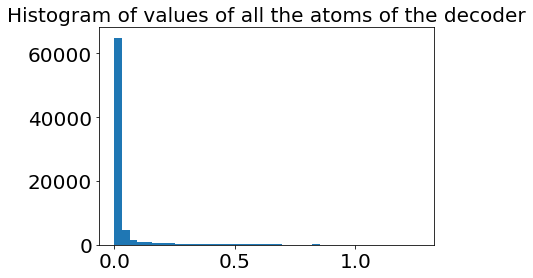

In [17]:
sp_o = 0.01
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


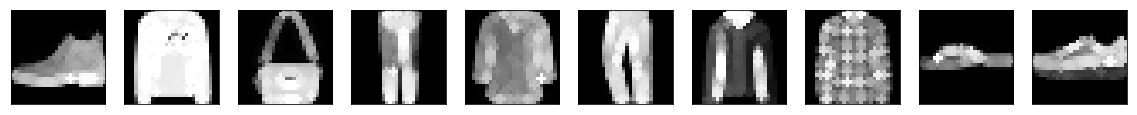

Dilatation of the reconstructions


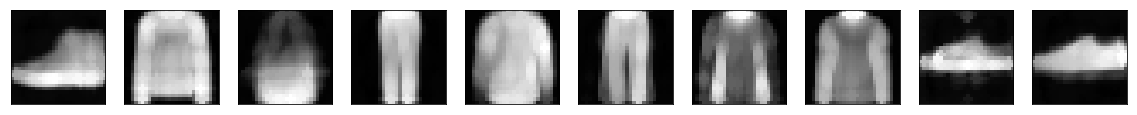

Original images and max-approximation to dilatation
Max-approx error to original:  0.08465239090919495  - Max-approx error to reconstruction:  0.08440017290115356


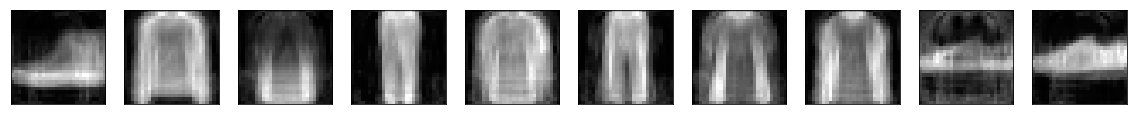

Dilated of the atom images of the decoder


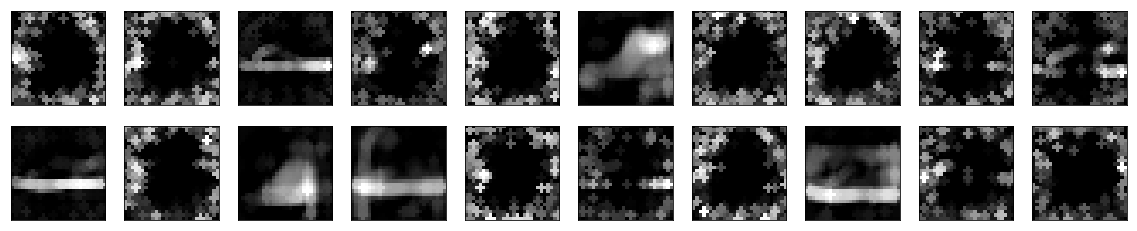

In [18]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

## 1.4 Sparsity_weight = 0.005 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.02979172392487526


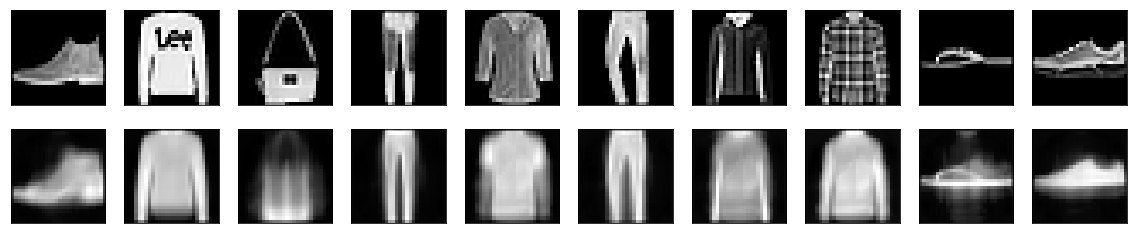

Histograms of the encodings - Sparsity (Hoyer):  0.7810801267623901


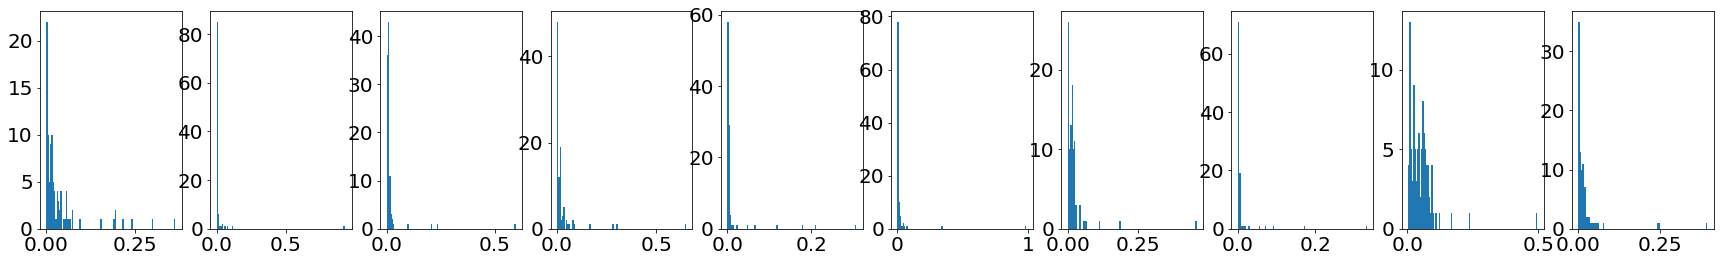

Atom images of the decoder


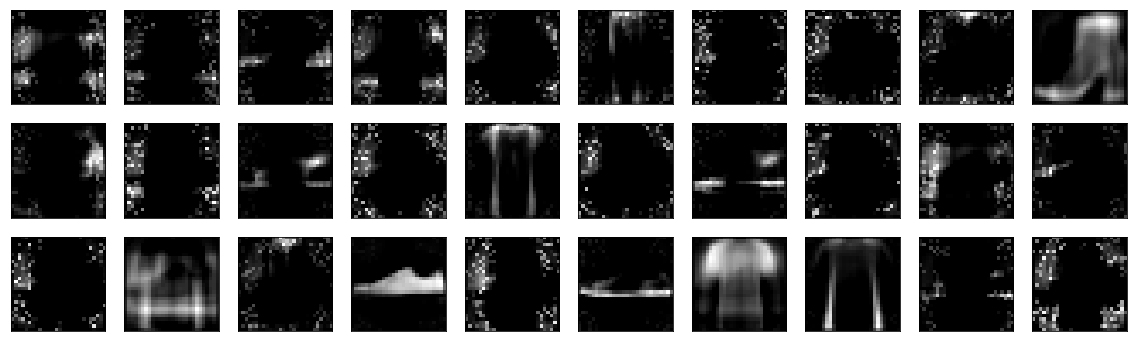

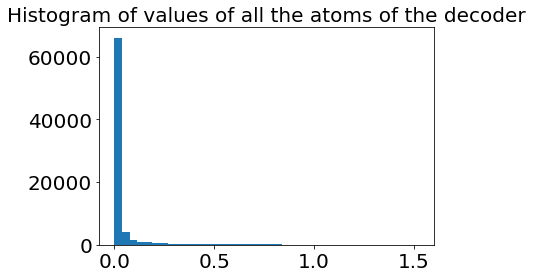

In [19]:
sp_o = 0.01
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


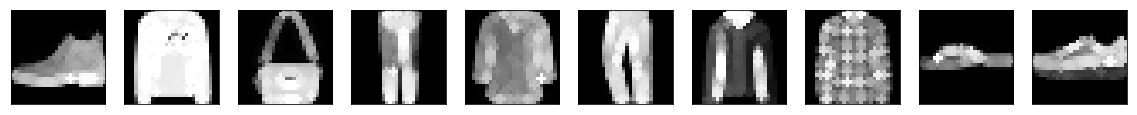

Dilatation of the reconstructions


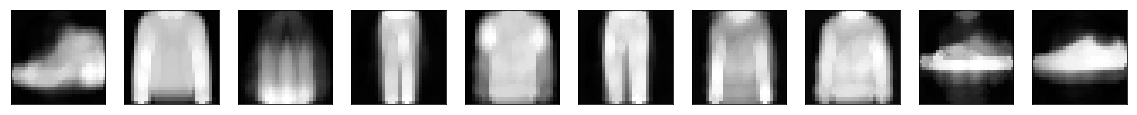

Original images and max-approximation to dilatation
Max-approx error to original:  0.032713059931993485  - Max-approx error to reconstruction:  0.009447987664490938


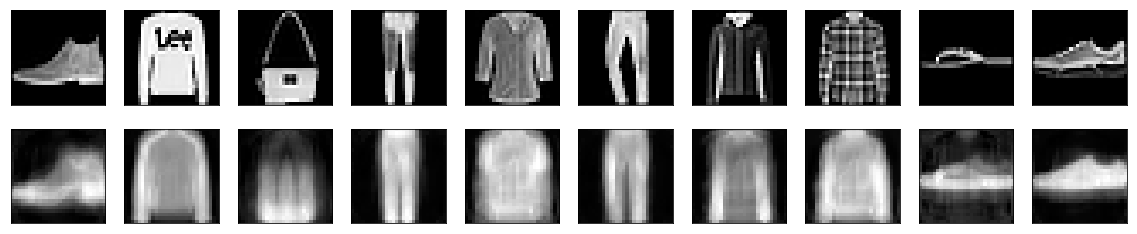

Dilated of the atom images of the decoder


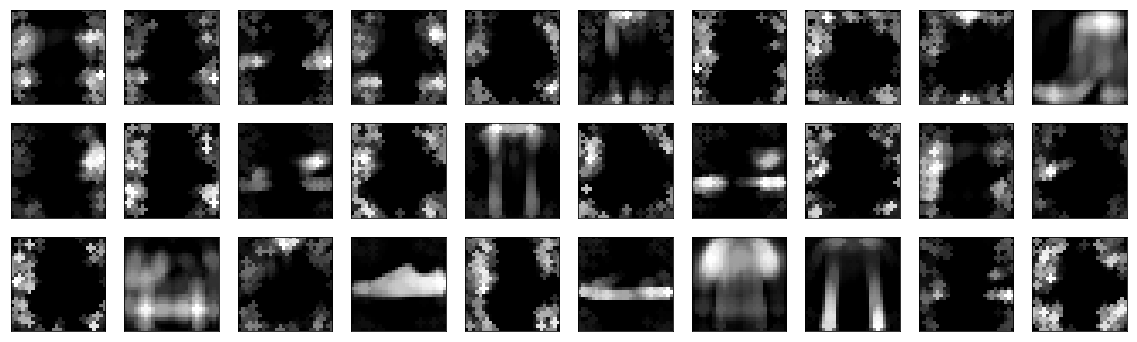

In [20]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.5 Sparsity_weight = 0.01 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.03333908056020737


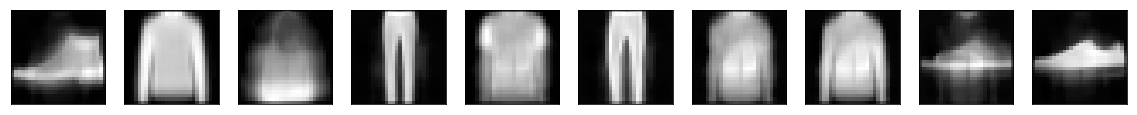

Histograms of the encodings - Sparsity (Hoyer):  0.7785854339599609


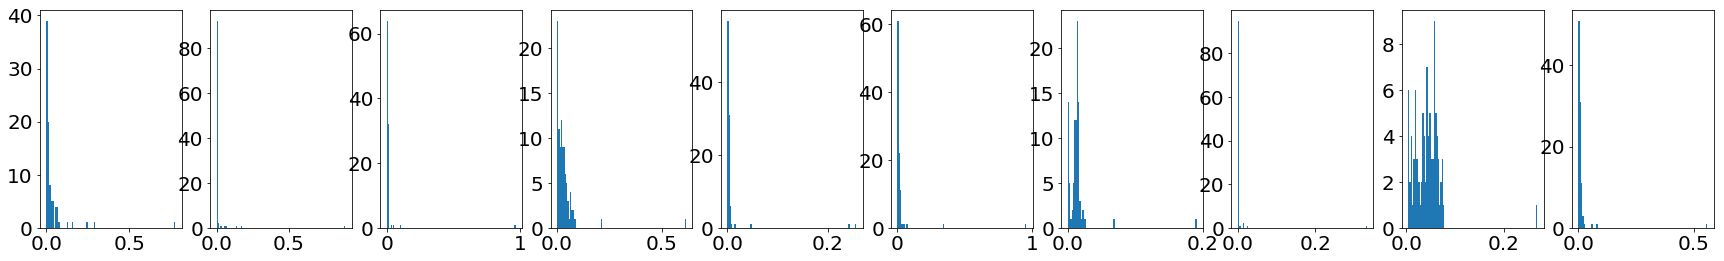

Atom images of the decoder


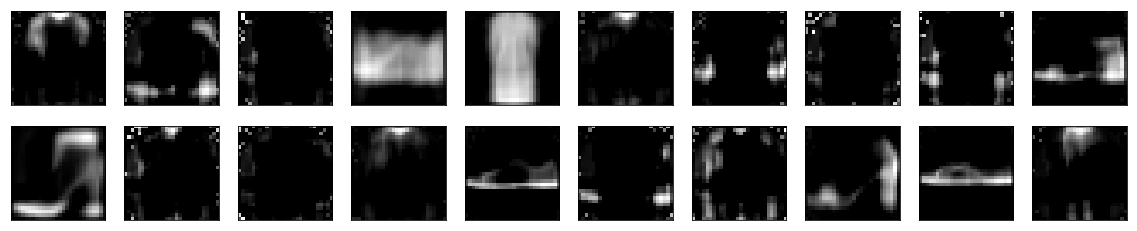

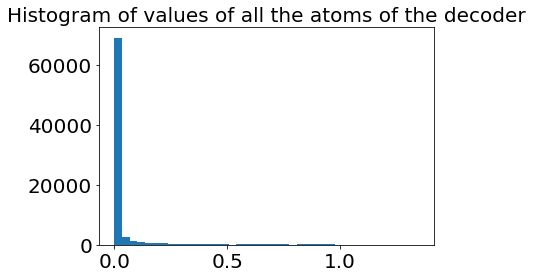

In [21]:
sp_o = 0.01
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO, plot_input=False)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=20)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


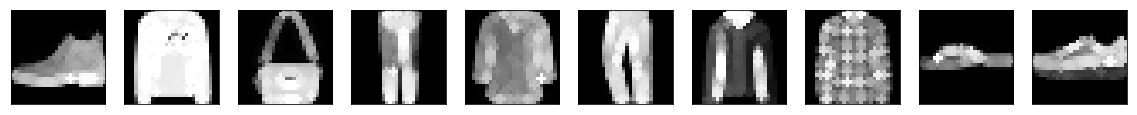

Dilatation of the reconstructions


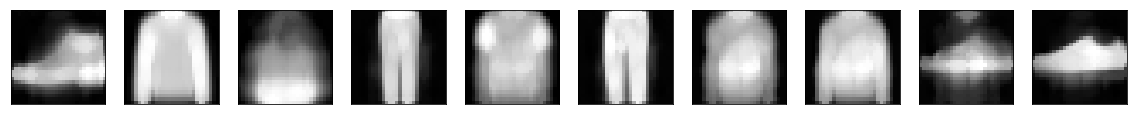

Original images and max-approximation to dilatation
Max-approx error to original:  0.039458573126792906  - Max-approx error to reconstruction:  0.0029263302085921167


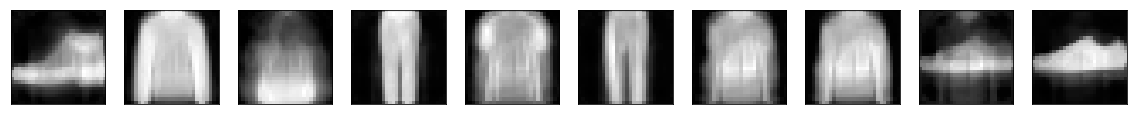

Dilated of the atom images of the decoder


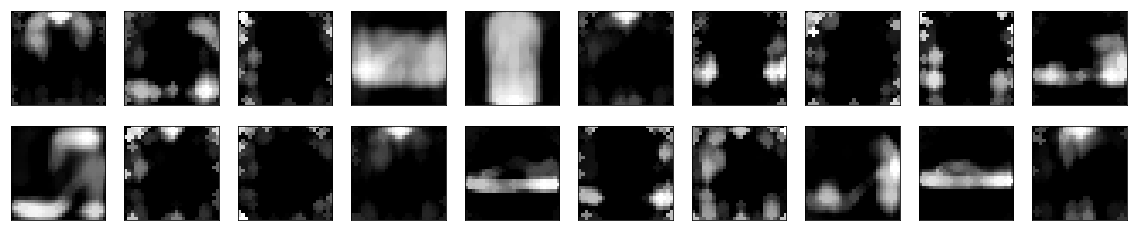

In [22]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO, plot_input=False)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=20)

## 1.6 Sparsity_weight = 0.05 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.059508503788709644


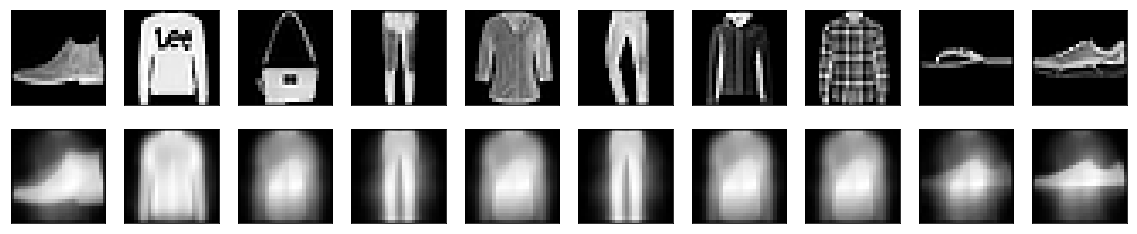

Histograms of the encodings - Sparsity (Hoyer):  0.5316555500030518


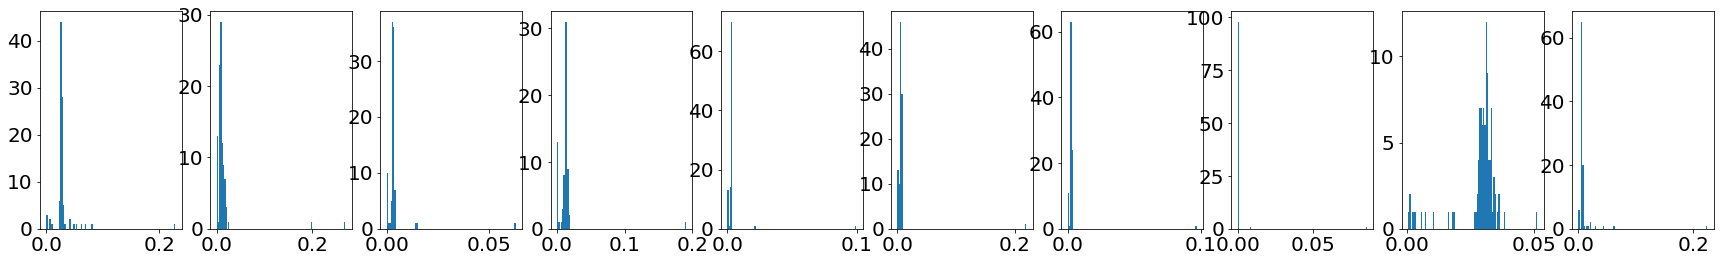

Atom images of the decoder


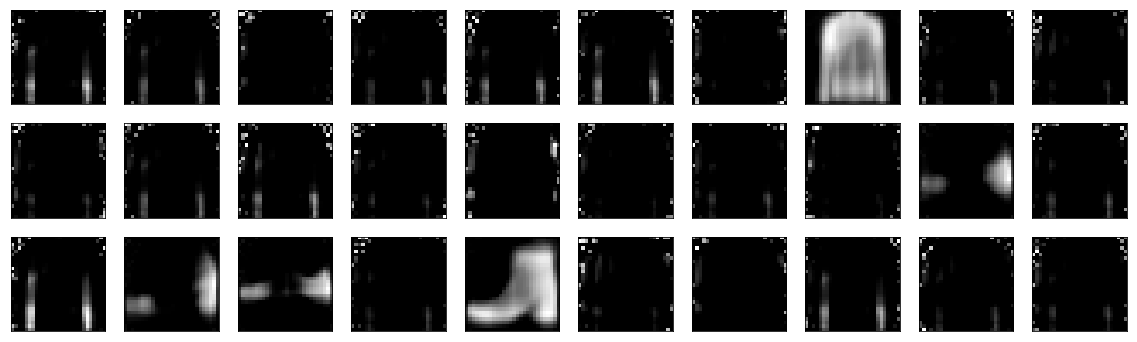

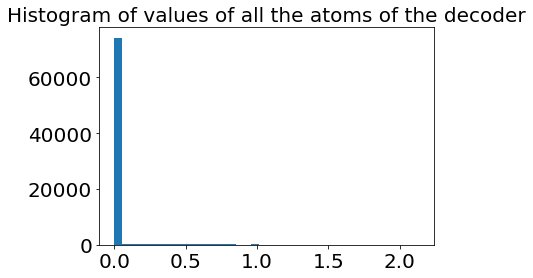

In [23]:
sp_o = 0.01
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


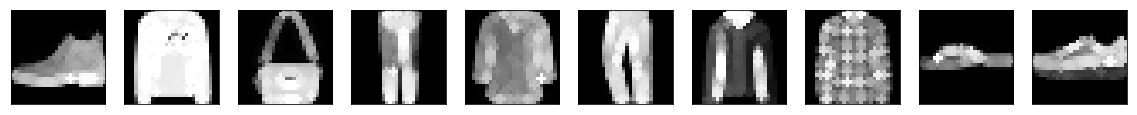

Dilatation of the reconstructions


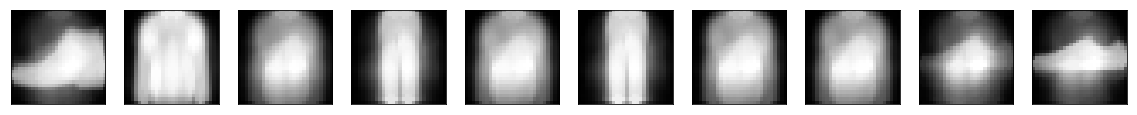

Original images and max-approximation to dilatation
Max-approx error to original:  0.07819408175945282  - Max-approx error to reconstruction:  0.0006318949146196246


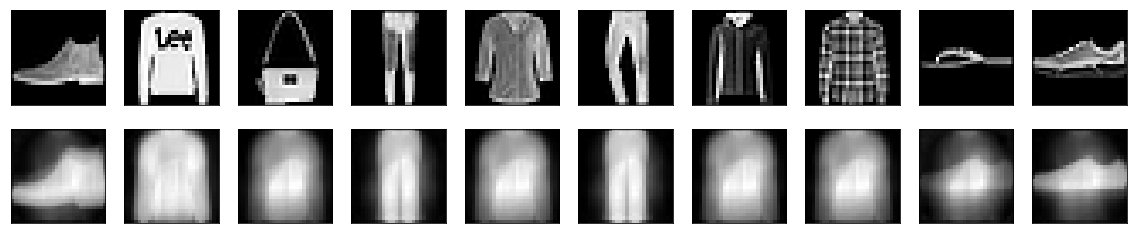

Dilated of the atom images of the decoder


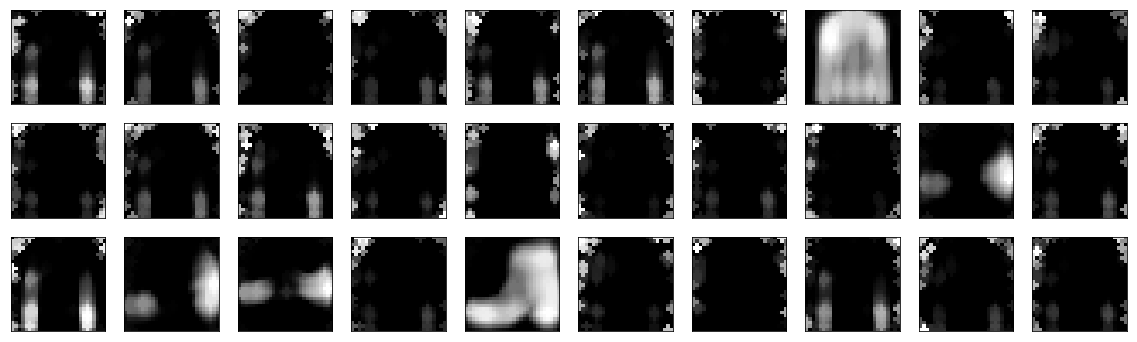

In [24]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.7 Sparsity_weight = 0.1 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.04611602434515953


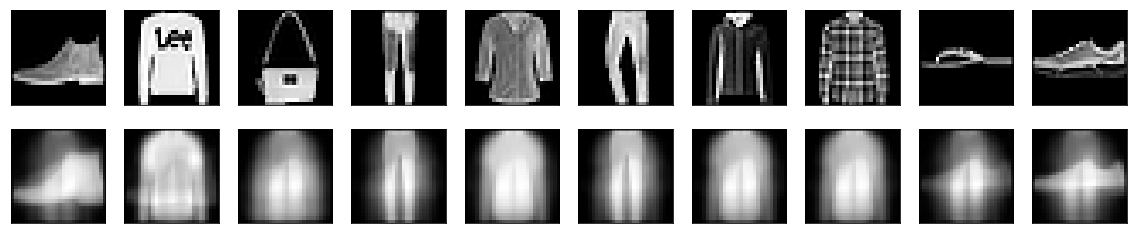

Histograms of the encodings - Sparsity (Hoyer):  0.5430989265441895


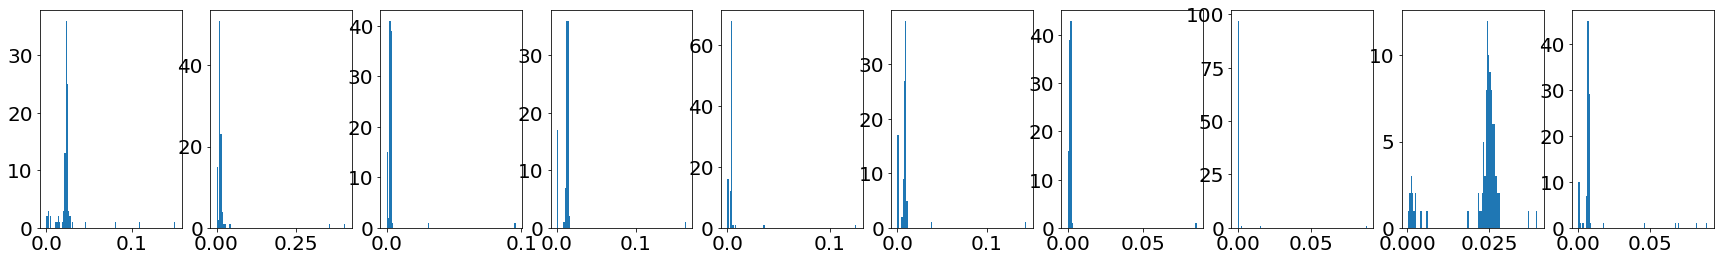

Atom images of the decoder


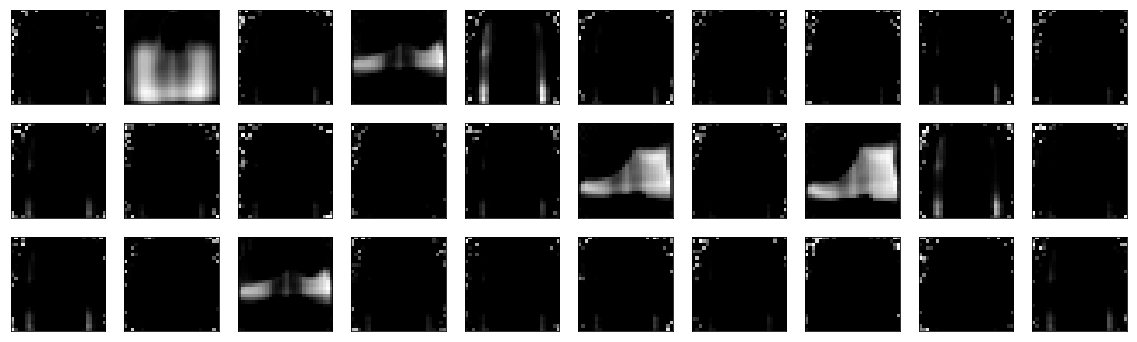

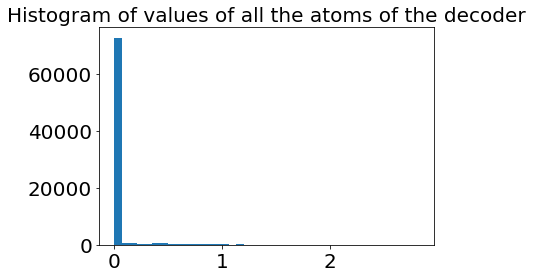

In [25]:
sp_o = 0.01
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


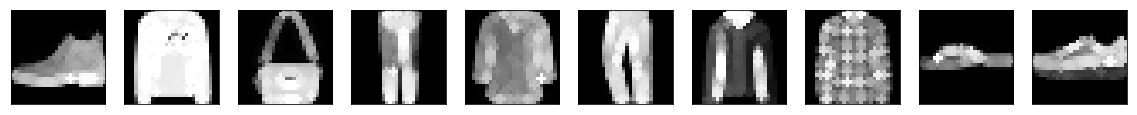

Dilatation of the reconstructions


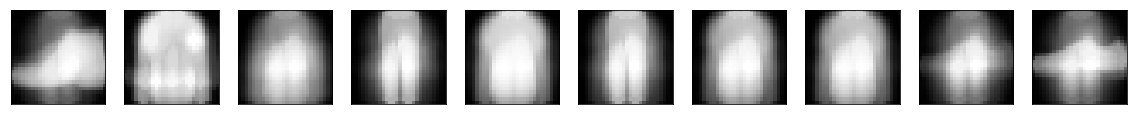

Original images and max-approximation to dilatation
Max-approx error to original:  0.05580850076675415  - Max-approx error to reconstruction:  0.0013794058676809072


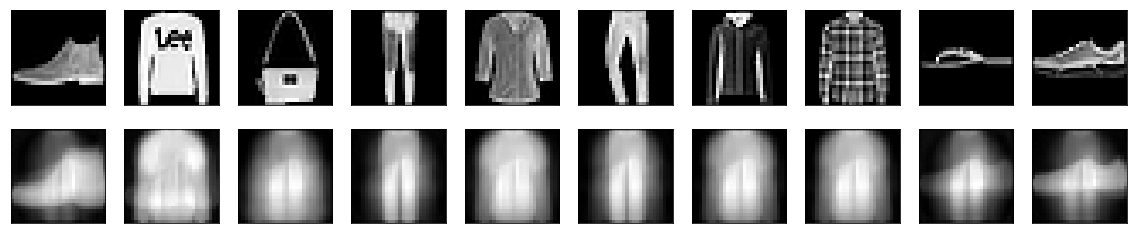

Dilated of the atom images of the decoder


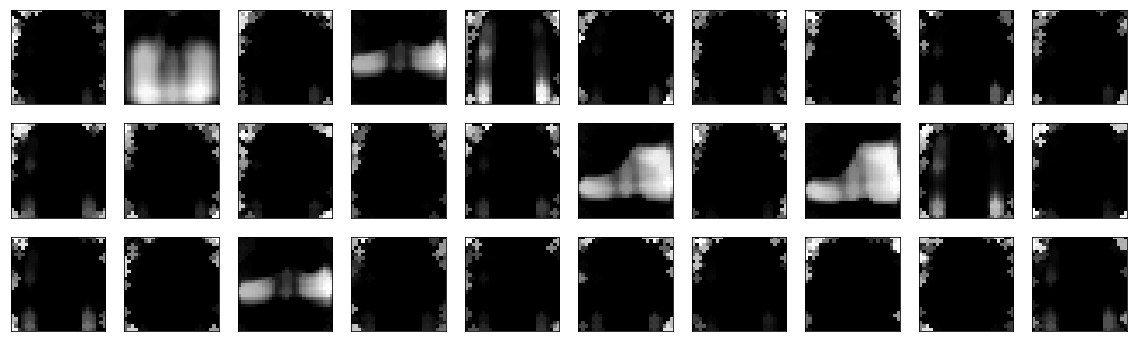

In [26]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 1.8 Sparsity_weight = 0.5 (sp_o = 0.01)

Original images and reconstructions - Reconstruction error:  0.07450477068424224


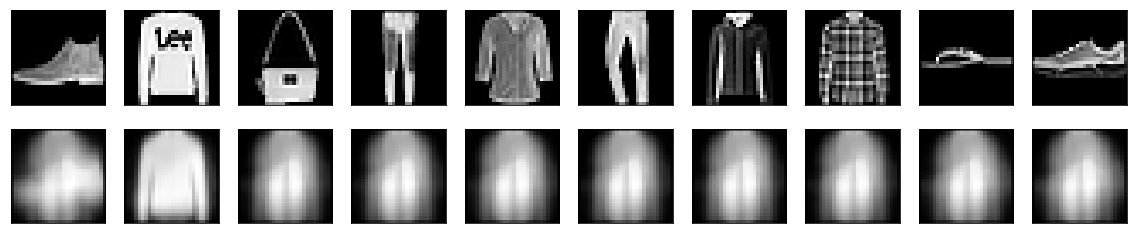

Histograms of the encodings - Sparsity (Hoyer):  0.16526122391223907


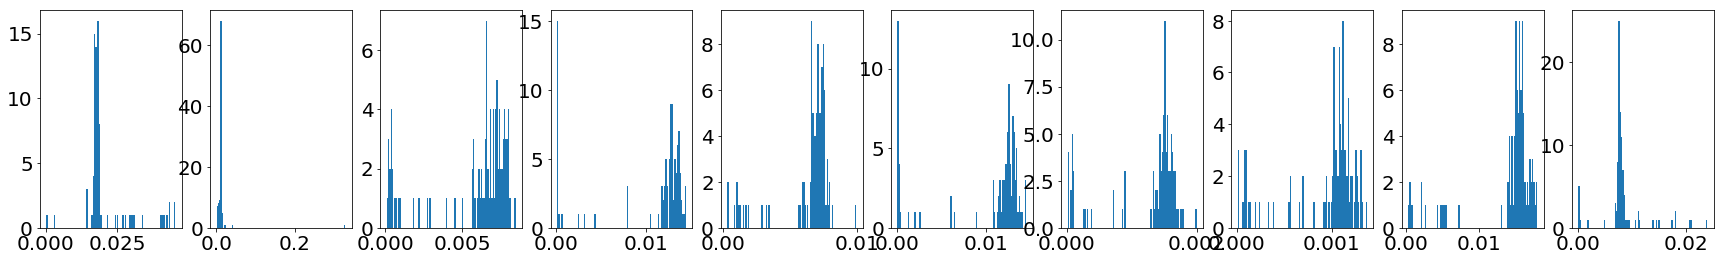

Atom images of the decoder


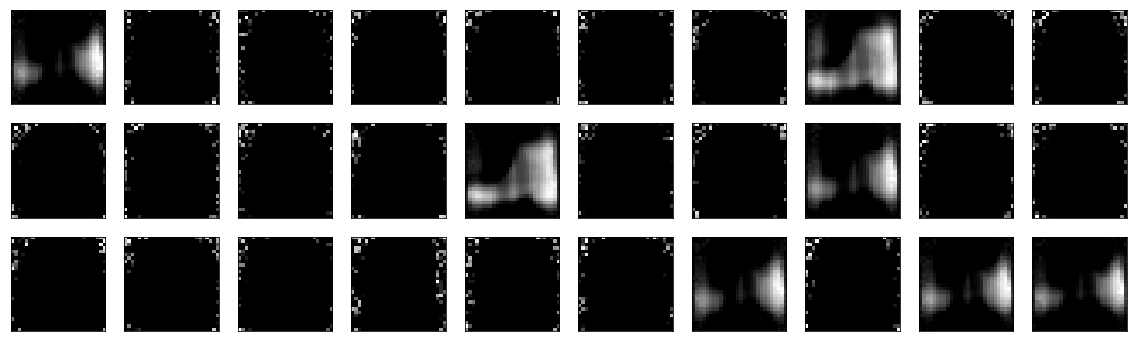

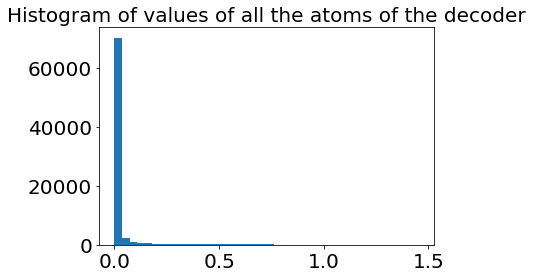

In [27]:
sp_o = 0.01
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


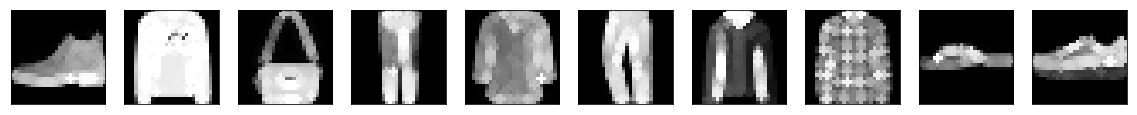

Dilatation of the reconstructions


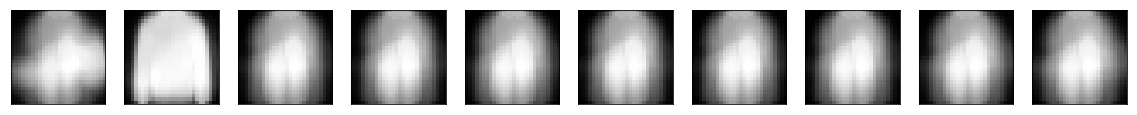

Original images and max-approximation to dilatation
Max-approx error to original:  0.09383326308727265  - Max-approx error to reconstruction:  0.0005312444283161312


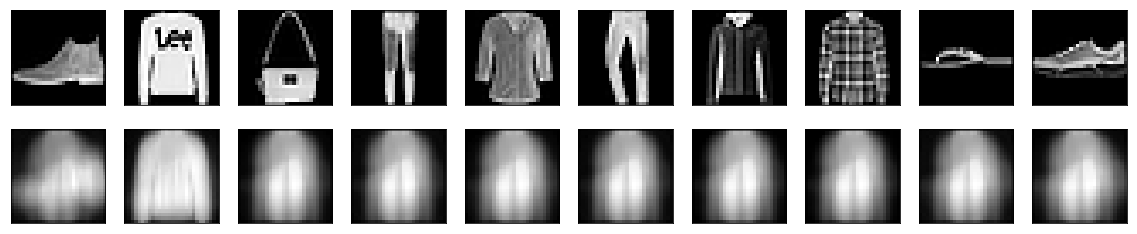

Dilated of the atom images of the decoder


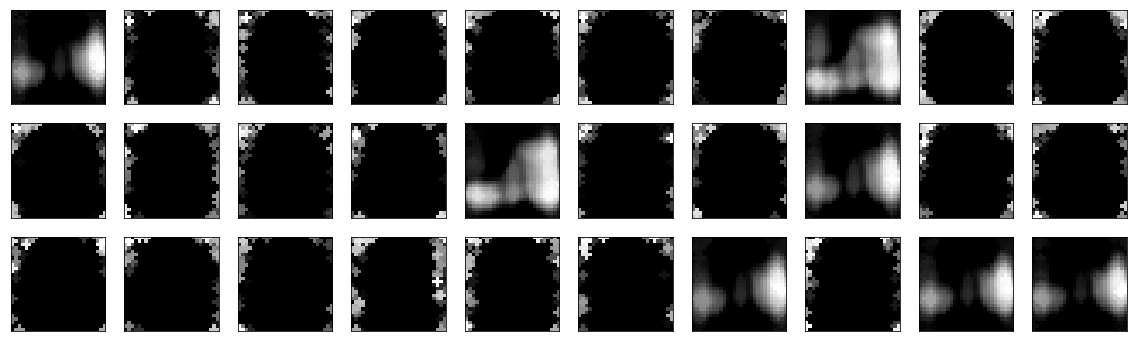

In [28]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 2. Sparsity_Objective = 0.05

## 2.1 Sparsity_weight = 0.0001 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.013128167673945427


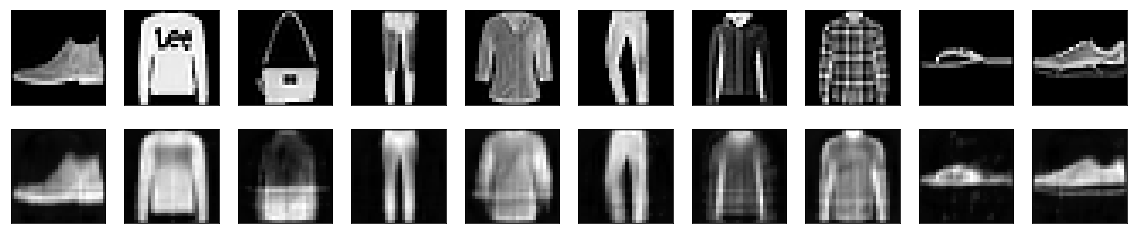

Histograms of the encodings - Sparsity (Hoyer):  0.38471803069114685


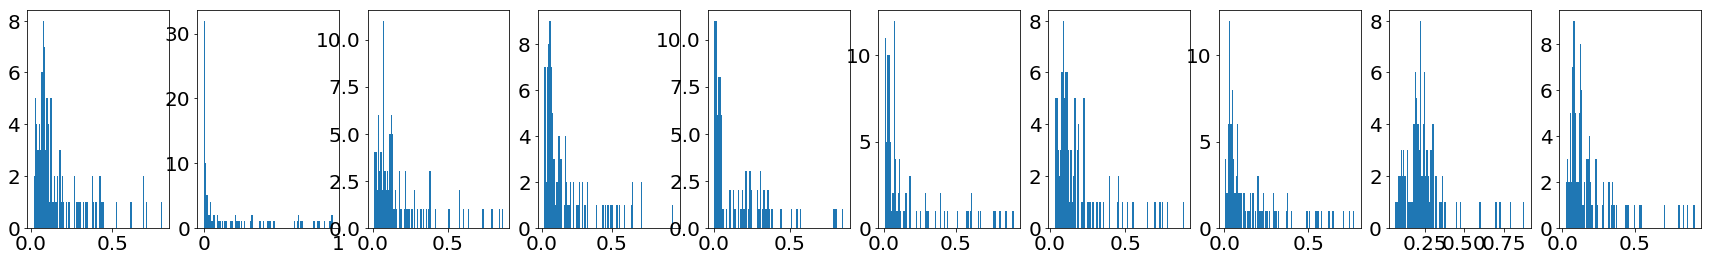

Atom images of the decoder


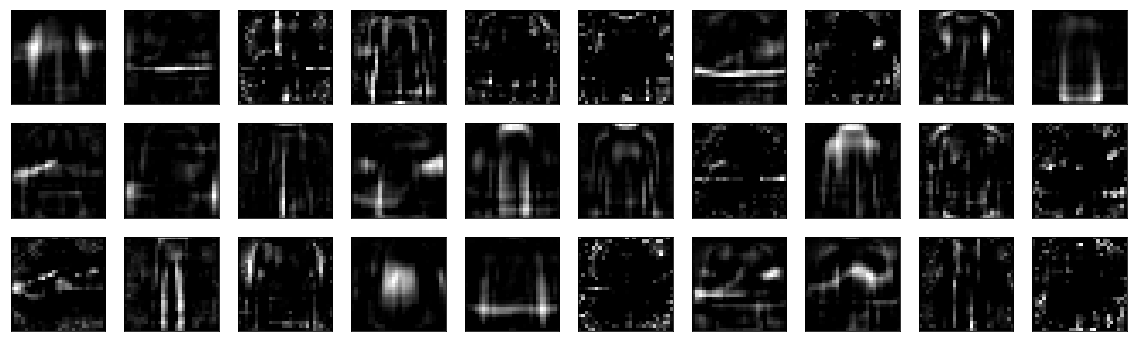

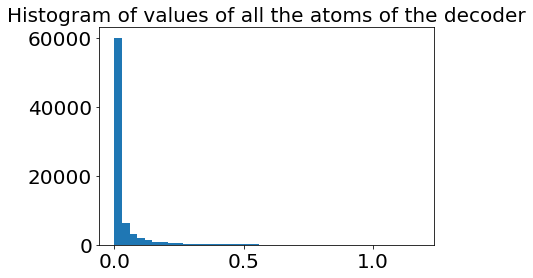

In [29]:
sp_o = 0.05
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


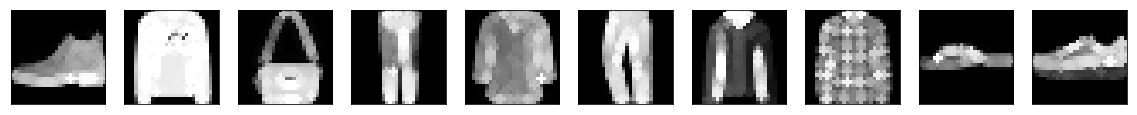

Dilatation of the reconstructions


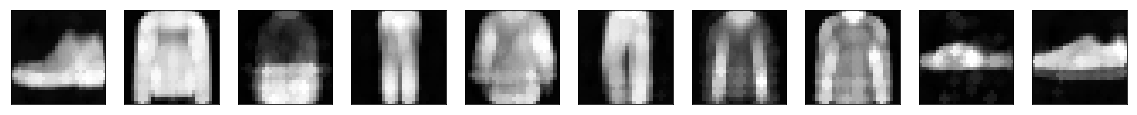

Original images and max-approximation to dilatation
Max-approx error to original:  0.8861728217124939  - Max-approx error to reconstruction:  0.9049988565444946


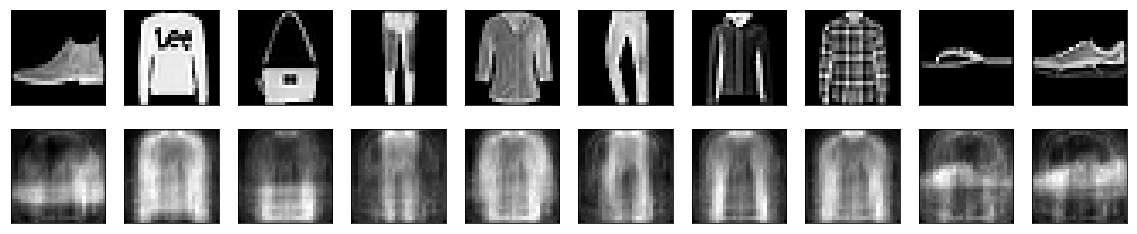

Dilated of the atom images of the decoder


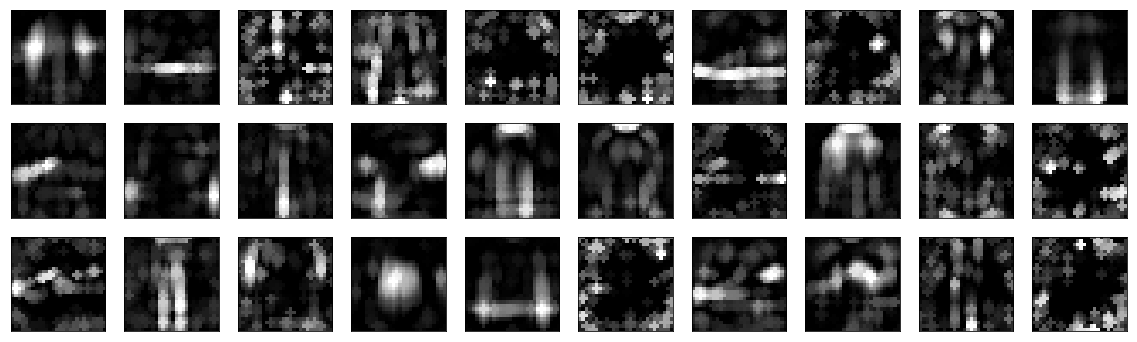

In [30]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.2 Sparsity_weight = 0.0005 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.01508617852628231


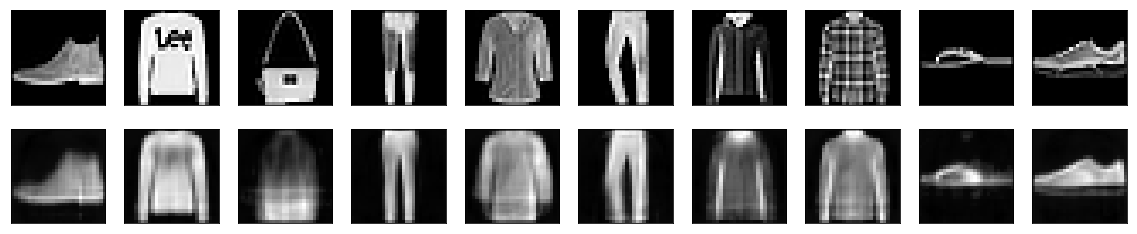

Histograms of the encodings - Sparsity (Hoyer):  0.4878997206687927


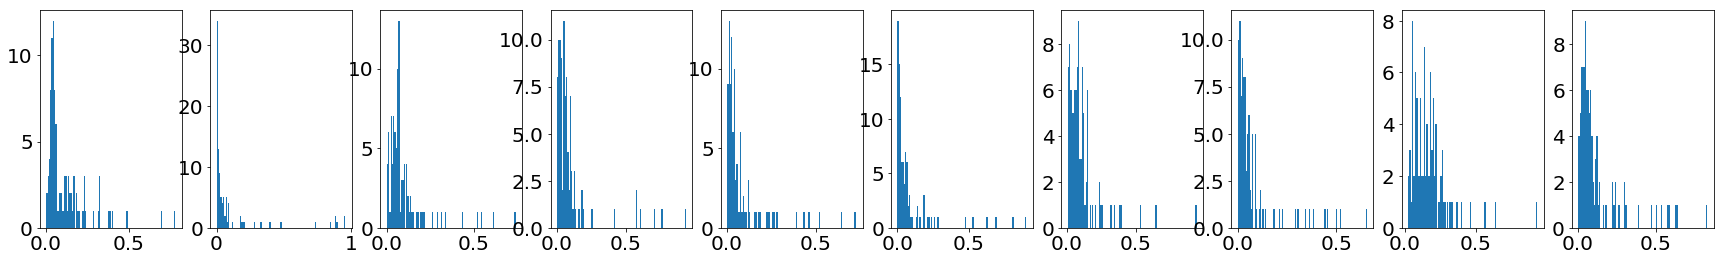

Atom images of the decoder


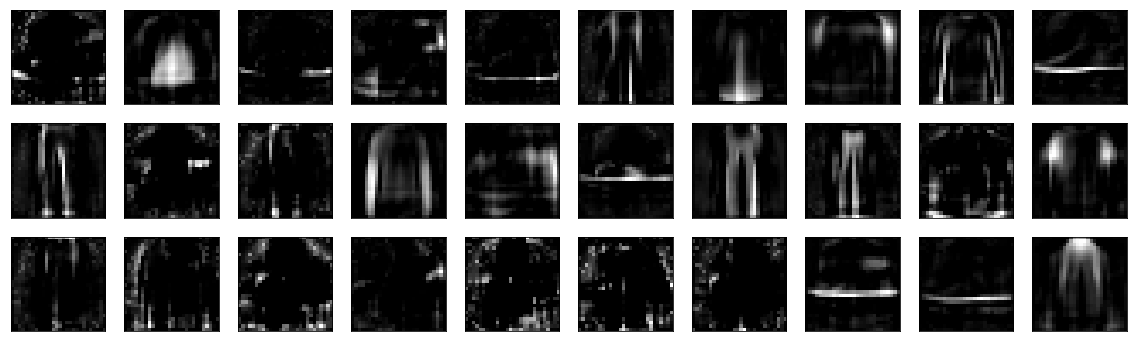

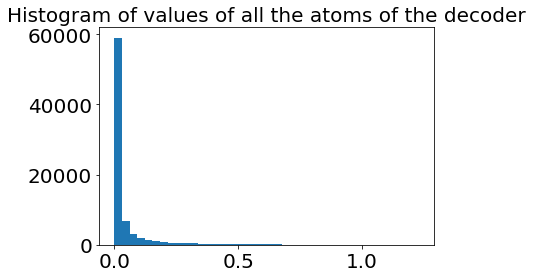

In [31]:
sp_o = 0.05
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


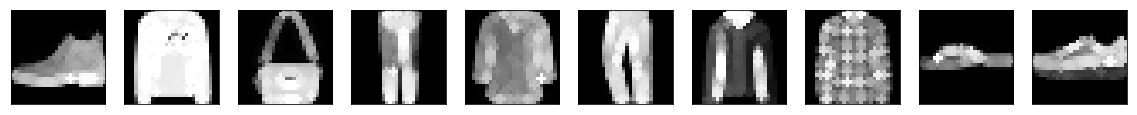

Dilatation of the reconstructions


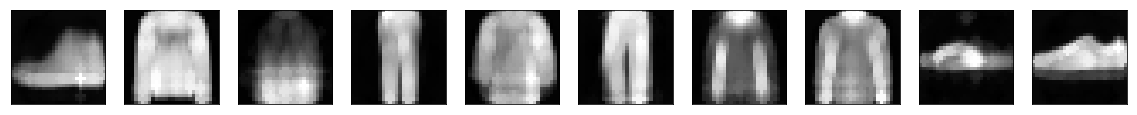

Original images and max-approximation to dilatation
Max-approx error to original:  0.3132858027458191  - Max-approx error to reconstruction:  0.3163057379245758


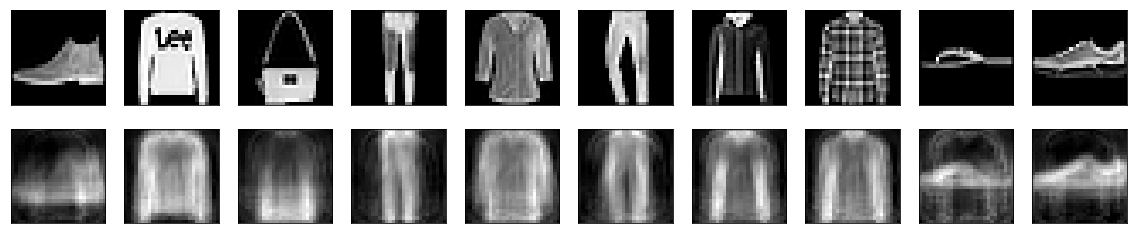

Dilated of the atom images of the decoder


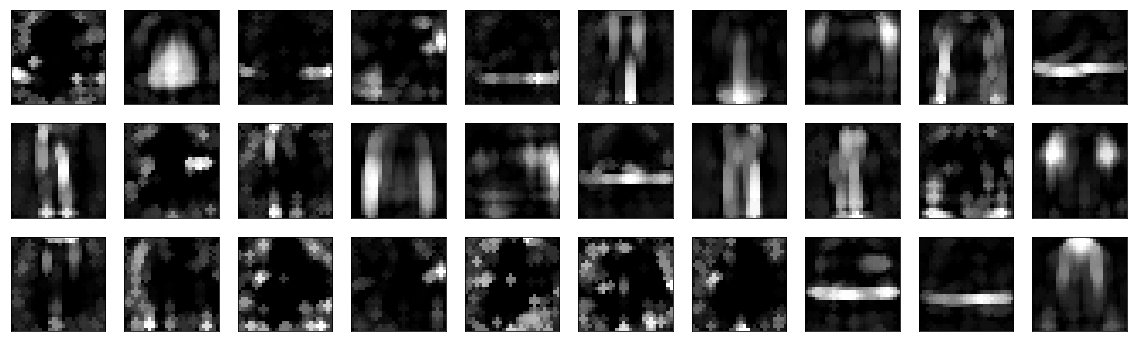

In [32]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.3 Sparsity_weight = 0.001 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.017418909856677055


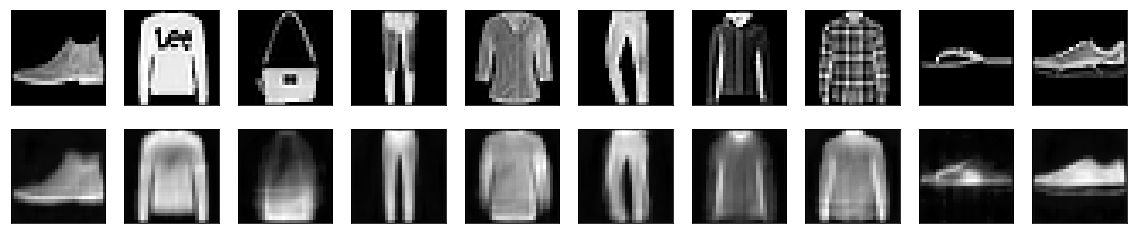

Histograms of the encodings - Sparsity (Hoyer):  0.5261573195457458


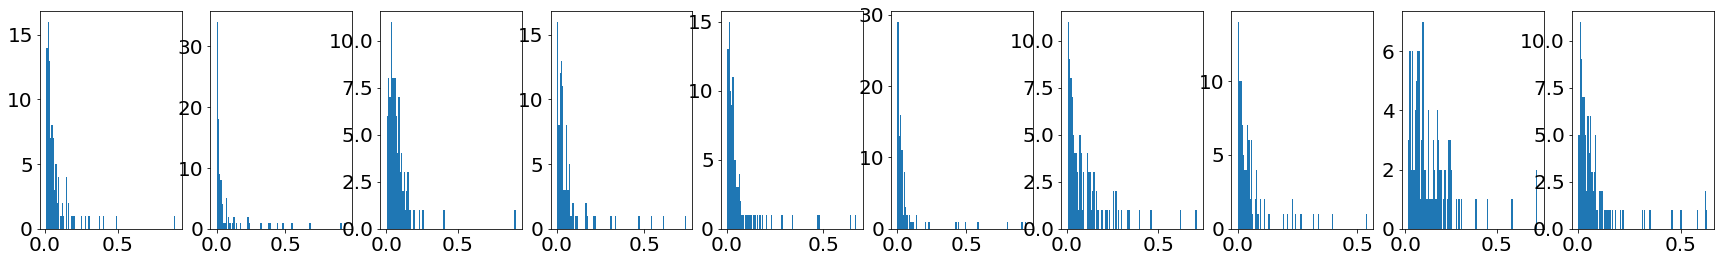

Atom images of the decoder


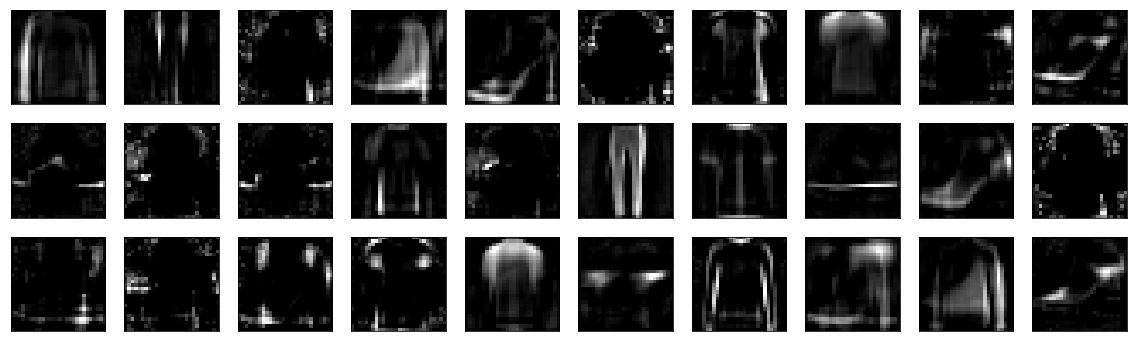

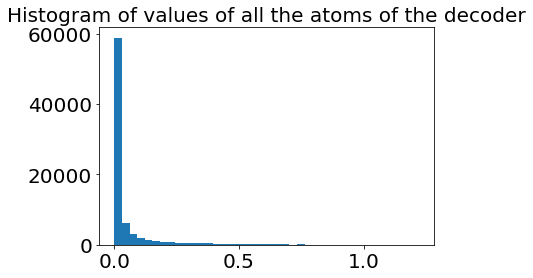

In [33]:
sp_o = 0.05
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


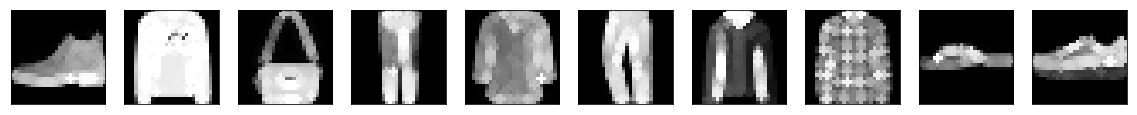

Dilatation of the reconstructions


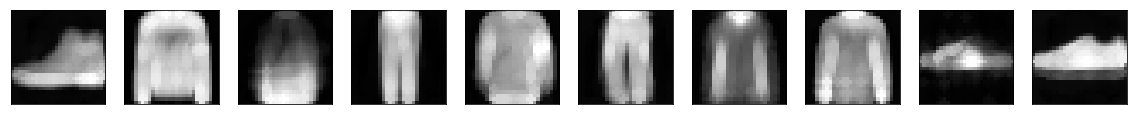

Original images and max-approximation to dilatation
Max-approx error to original:  0.1335912456035614  - Max-approx error to reconstruction:  0.16243202621936798


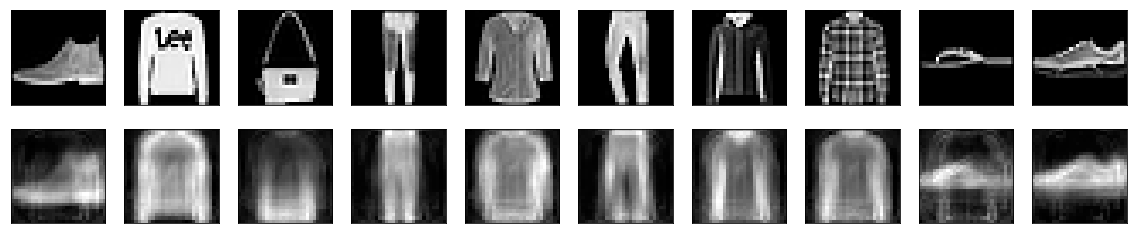

Dilated of the atom images of the decoder


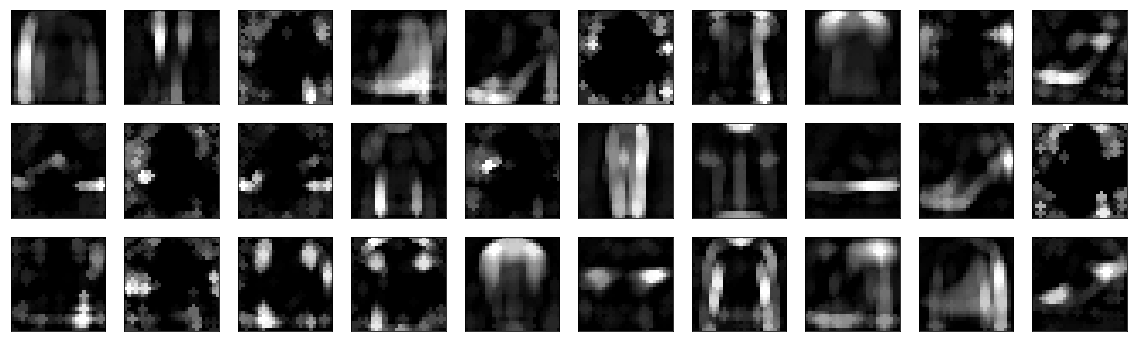

In [34]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.4 Sparsity_weight = 0.005 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.016770643281936646


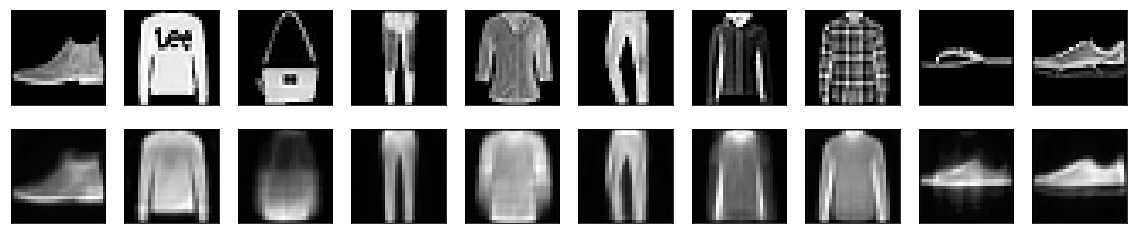

Histograms of the encodings - Sparsity (Hoyer):  0.5722101330757141


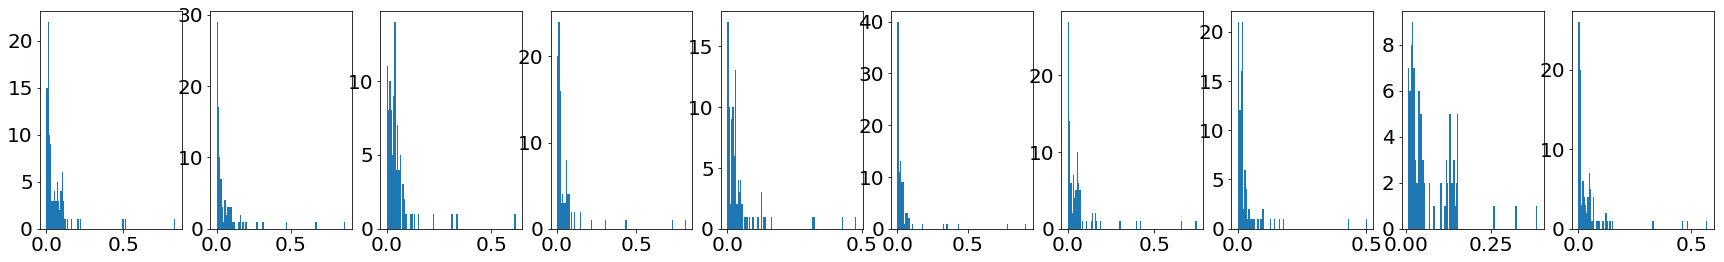

Atom images of the decoder


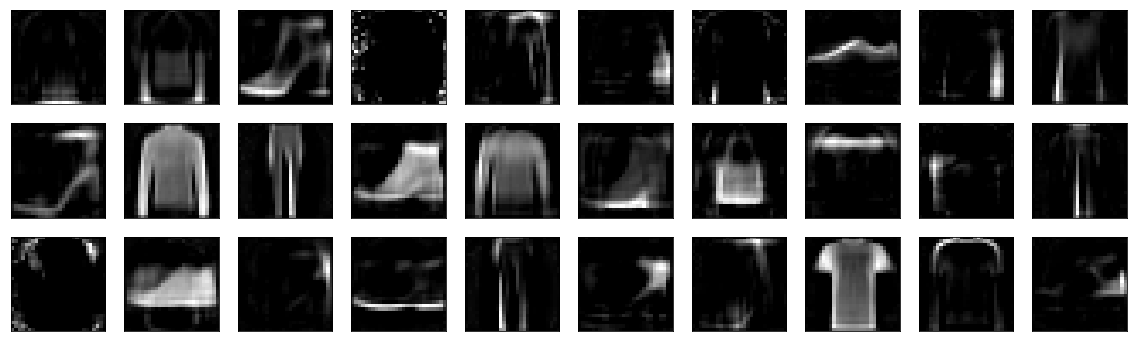

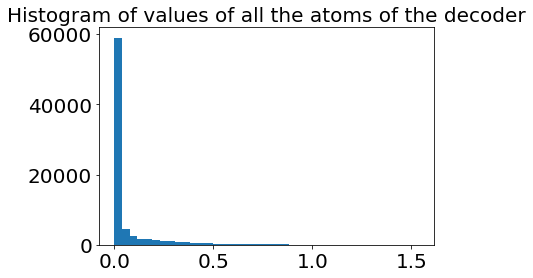

In [35]:
sp_o = 0.05
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


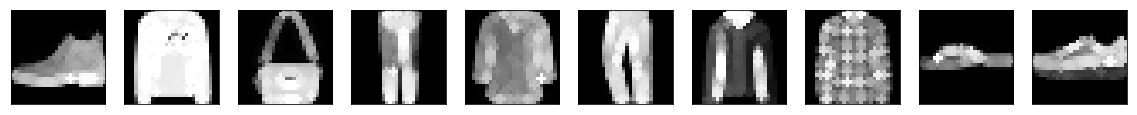

Dilatation of the reconstructions


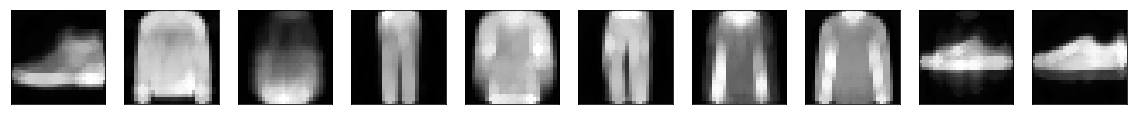

Original images and max-approximation to dilatation
Max-approx error to original:  0.0736466857612133  - Max-approx error to reconstruction:  0.06865974585413932


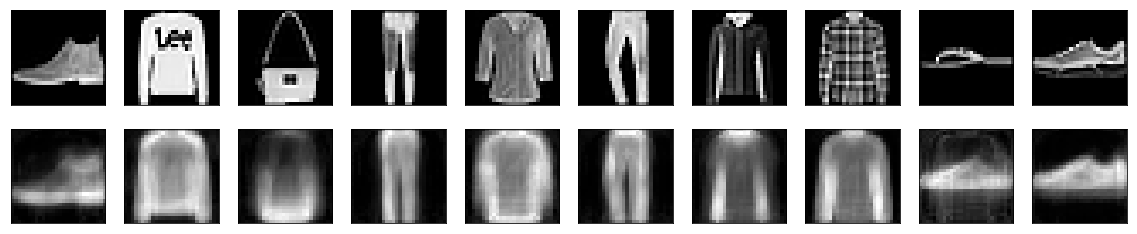

Dilated of the atom images of the decoder


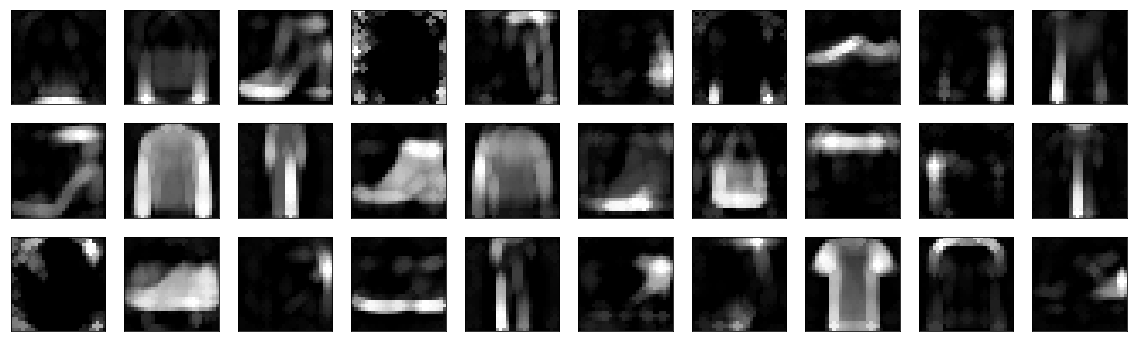

In [36]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.5 Sparsity_weight = 0.01 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.016599556550383567


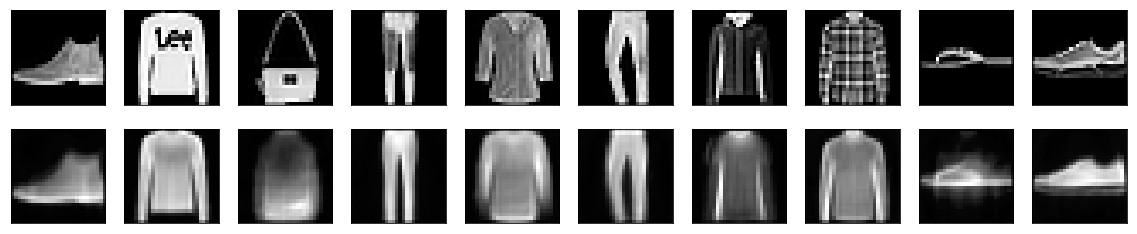

Histograms of the encodings - Sparsity (Hoyer):  0.5625956058502197


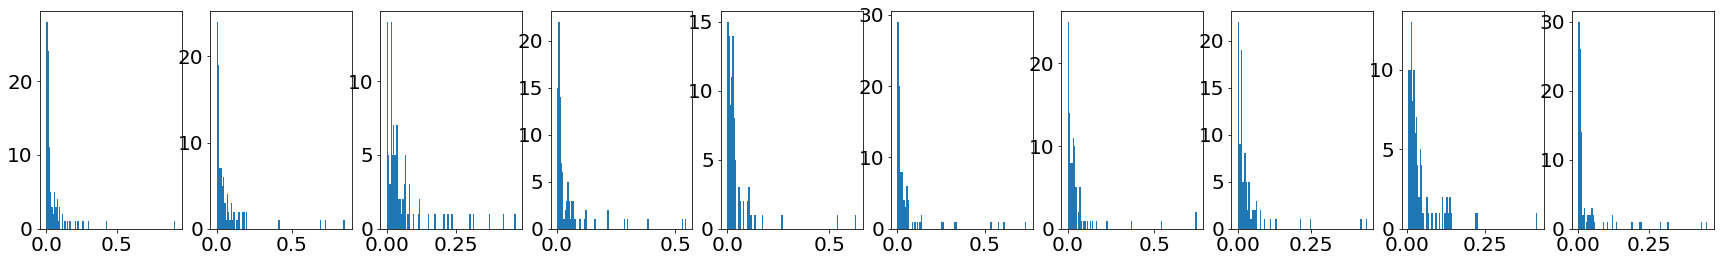

Atom images of the decoder


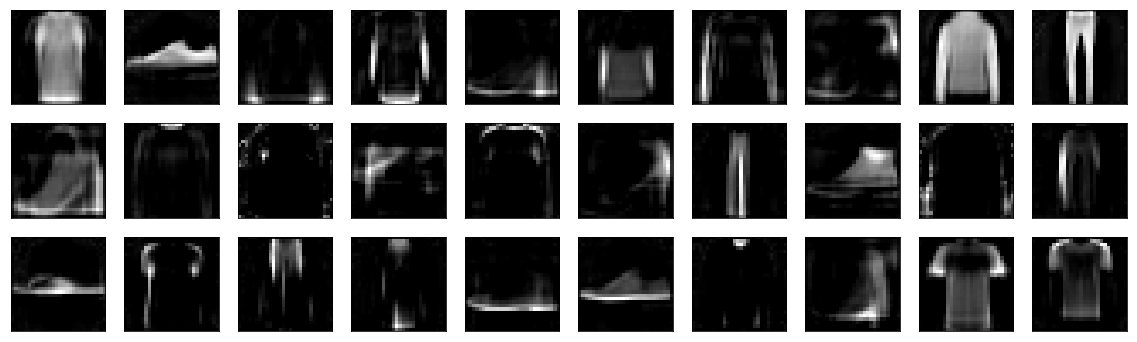

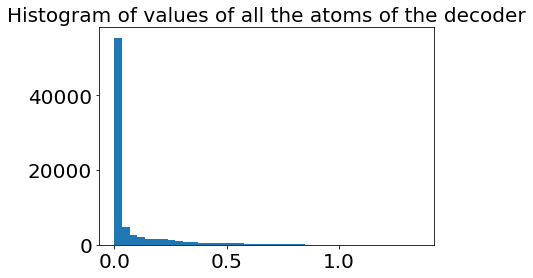

In [37]:
sp_o = 0.05
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


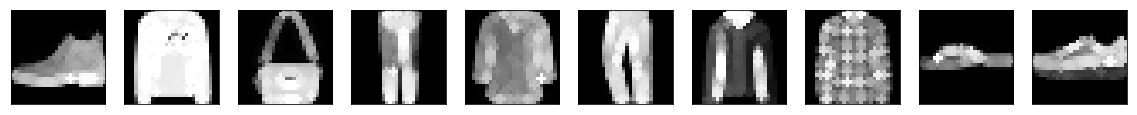

Dilatation of the reconstructions


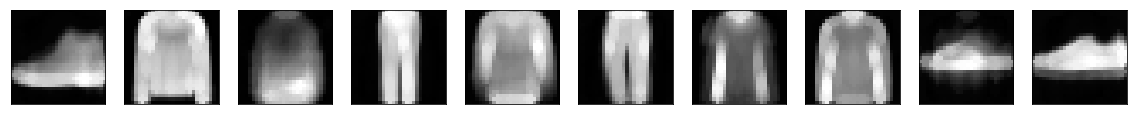

Original images and max-approximation to dilatation
Max-approx error to original:  0.07298515617847443  - Max-approx error to reconstruction:  0.07412055504322052


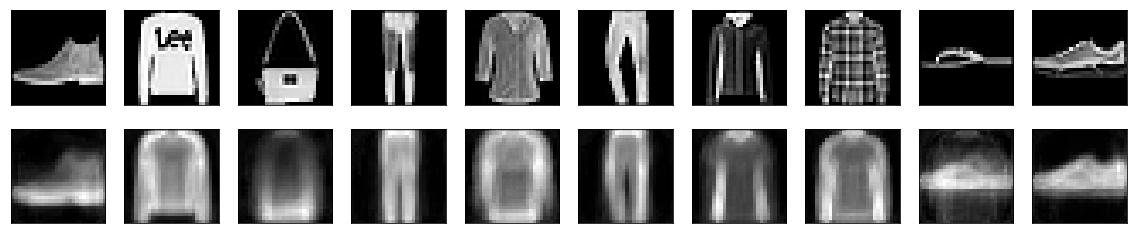

Dilated of the atom images of the decoder


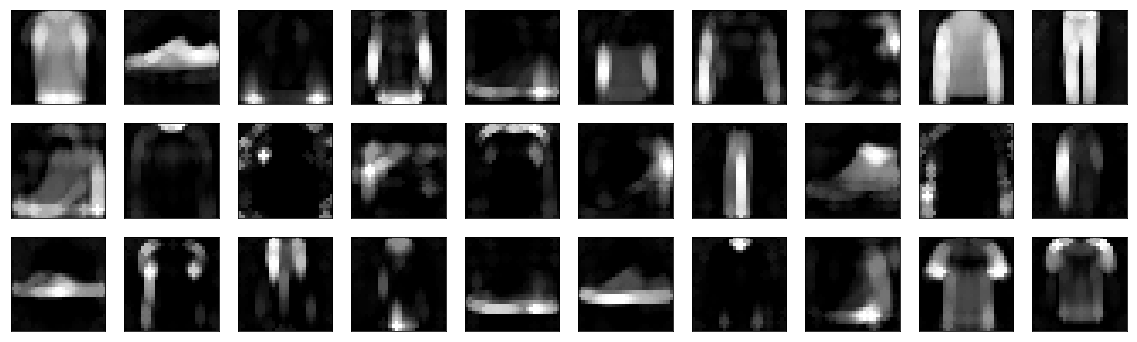

In [38]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.6 Sparsity_weight = 0.05 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.01858959384560585


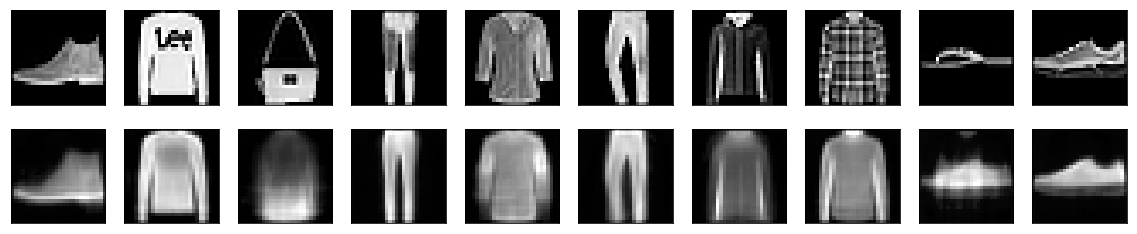

Histograms of the encodings - Sparsity (Hoyer):  0.4569132328033447


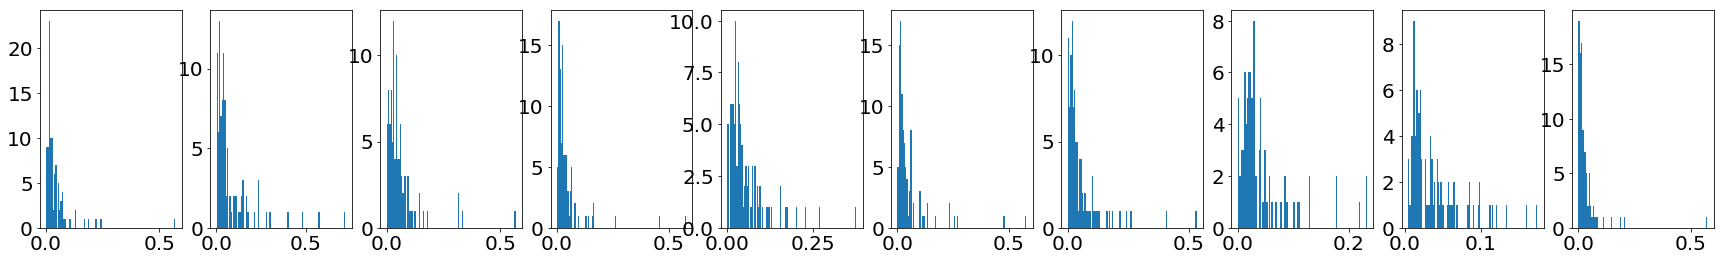

Atom images of the decoder


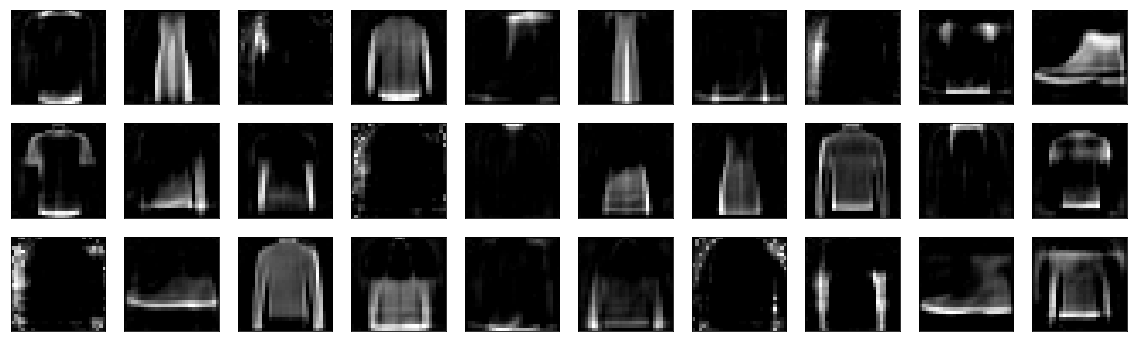

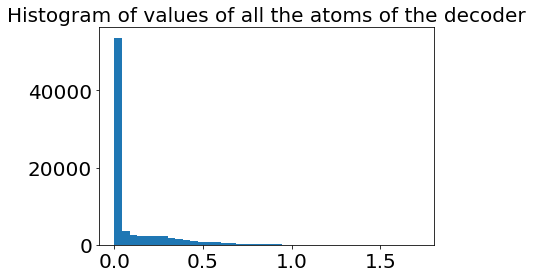

In [39]:
sp_o = 0.05
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


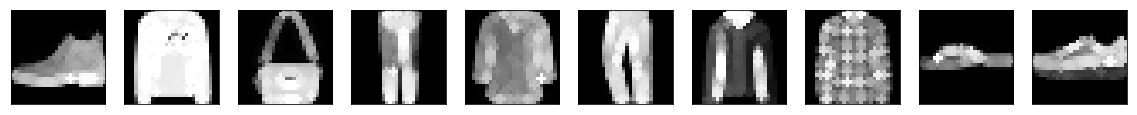

Dilatation of the reconstructions


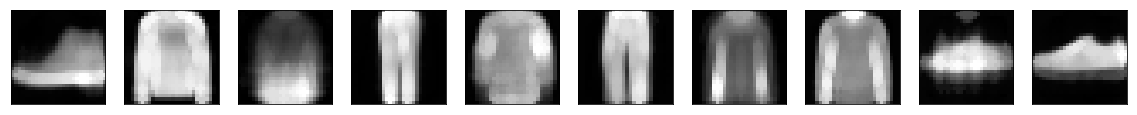

Original images and max-approximation to dilatation
Max-approx error to original:  0.06810259172916412  - Max-approx error to reconstruction:  0.08764307507276535


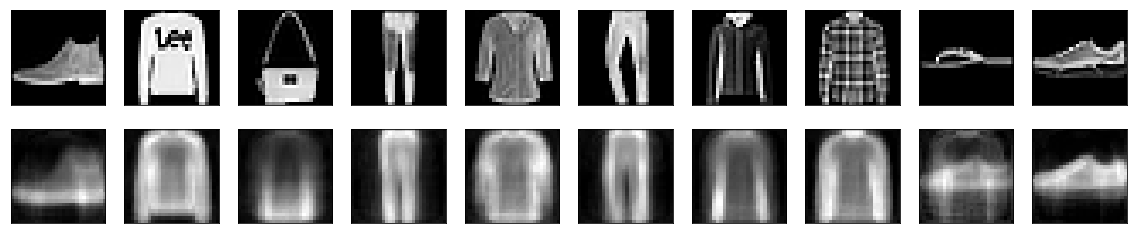

Dilated of the atom images of the decoder


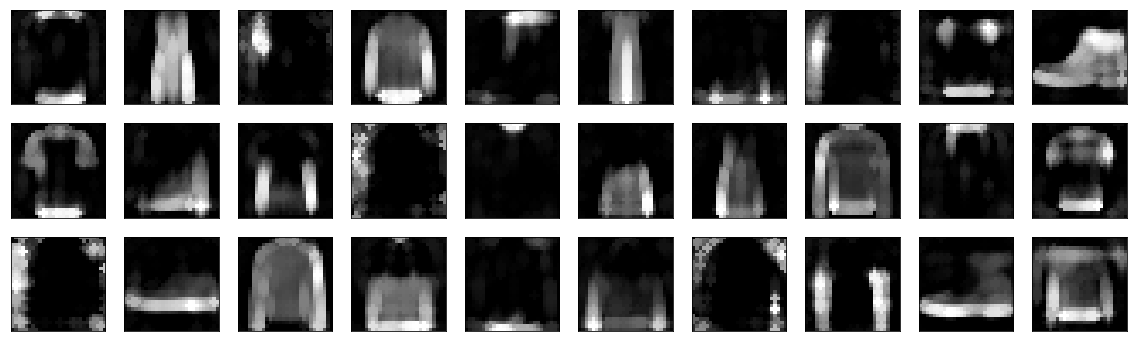

In [40]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.7 Sparsity_weight = 0.1 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.01970290586054325


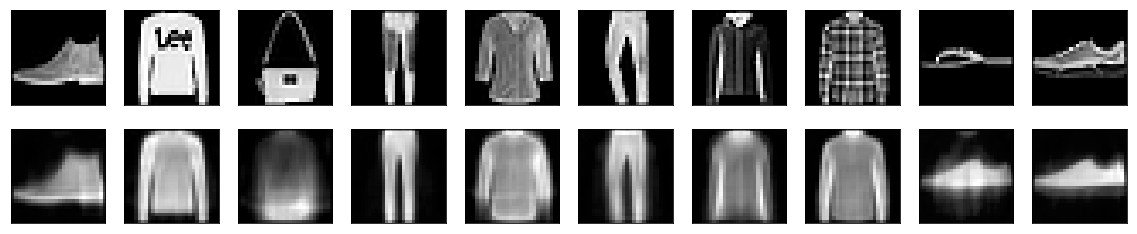

Histograms of the encodings - Sparsity (Hoyer):  0.4065094292163849


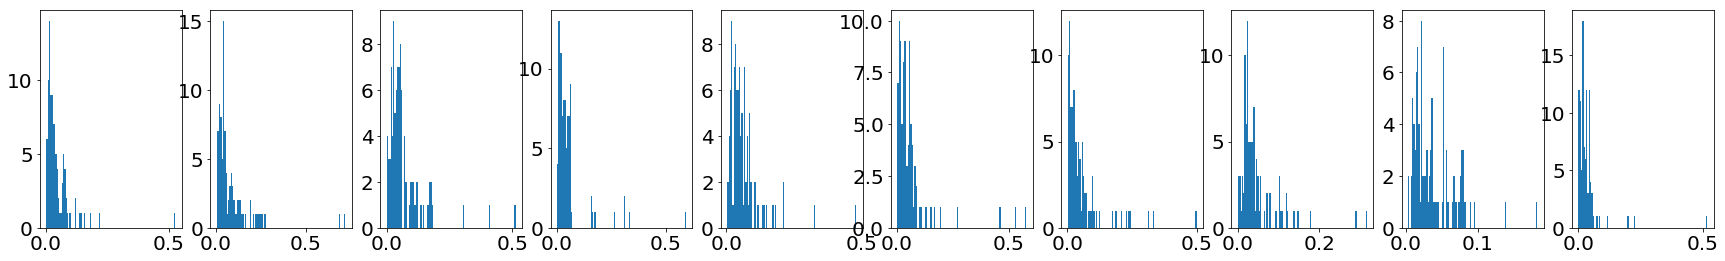

Atom images of the decoder


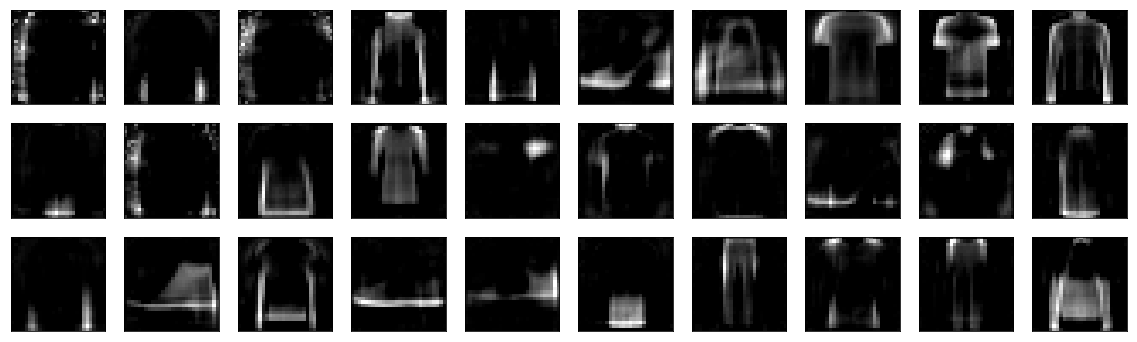

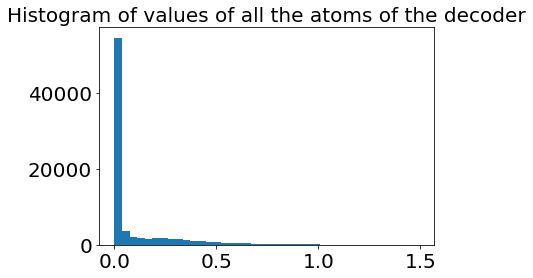

In [41]:
sp_o = 0.05
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


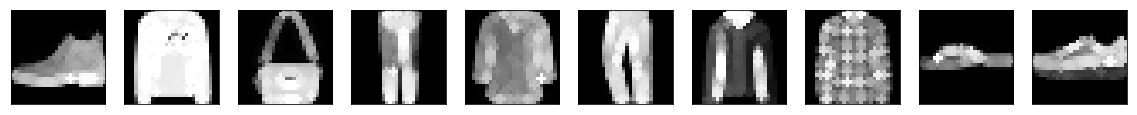

Dilatation of the reconstructions


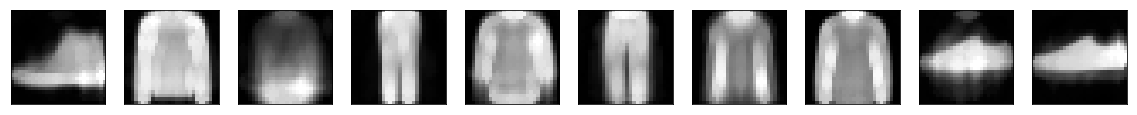

Original images and max-approximation to dilatation
Max-approx error to original:  0.06969070167541504  - Max-approx error to reconstruction:  0.0866930835723877


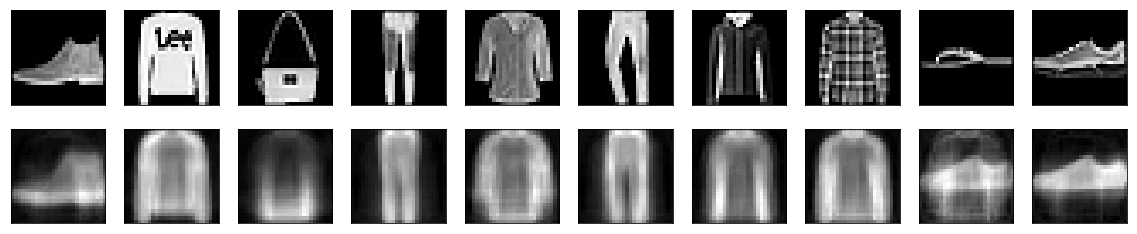

Dilated of the atom images of the decoder


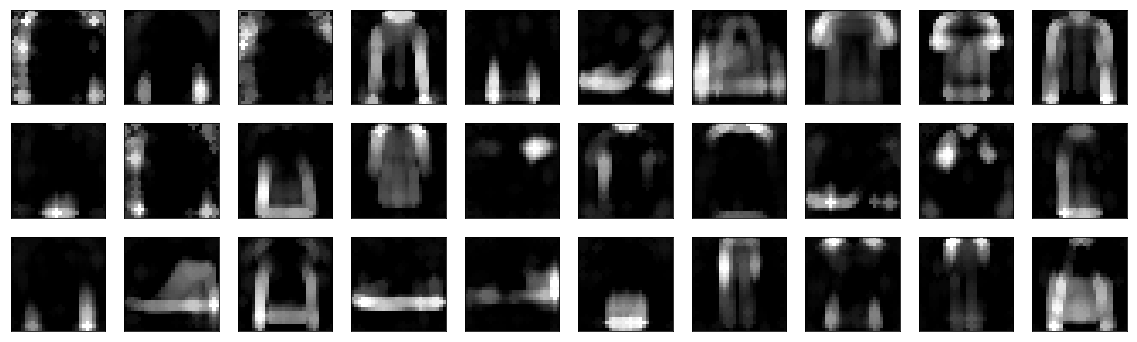

In [42]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 2.8 Sparsity_weight = 0.5 (sp_o = 0.05)

Original images and reconstructions - Reconstruction error:  0.060674863362312315


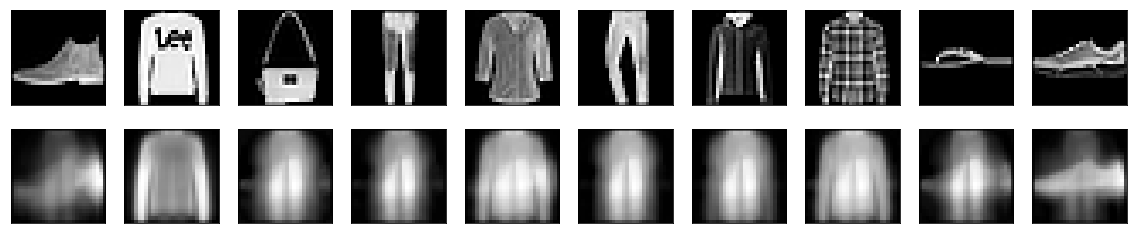

Histograms of the encodings - Sparsity (Hoyer):  0.21971455216407776


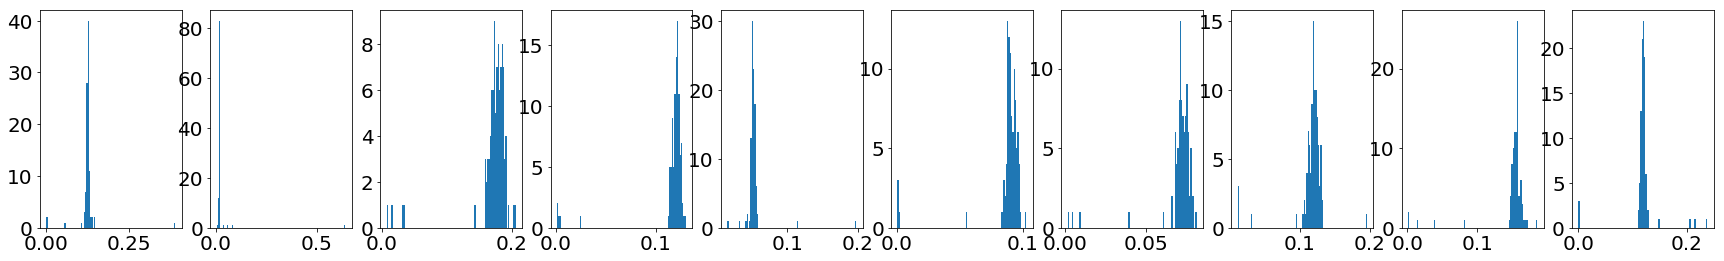

Atom images of the decoder


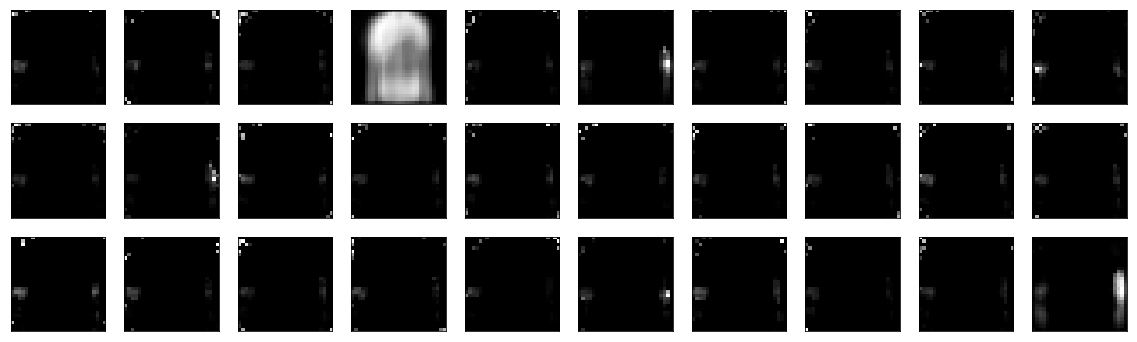

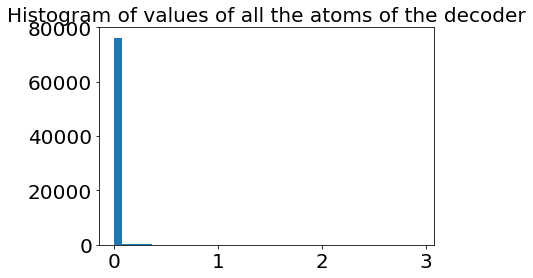

In [43]:
sp_o = 0.05
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


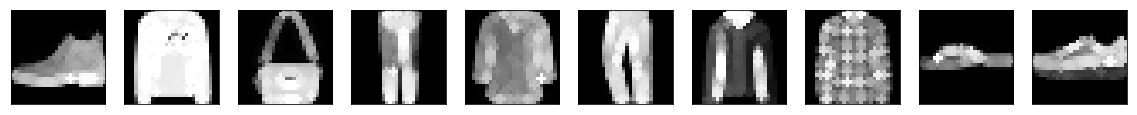

Dilatation of the reconstructions


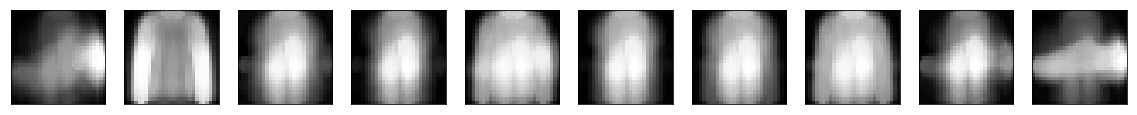

Original images and max-approximation to dilatation
Max-approx error to original:  0.07622608116865158  - Max-approx error to reconstruction:  0.001990494375489652


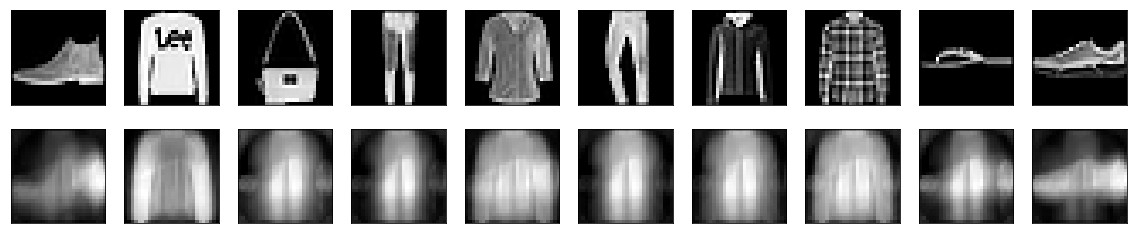

Dilated of the atom images of the decoder


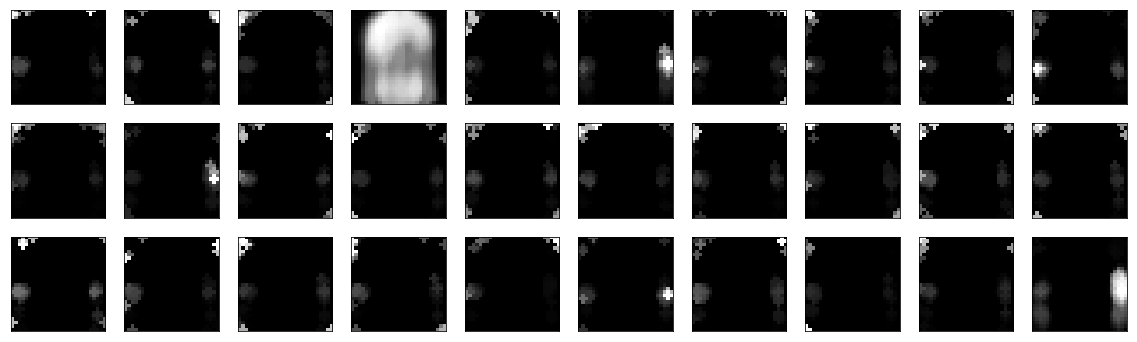

In [44]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 3. Sparsity_Objective = 0.1

## 3.1 Sparsity_weight = 0.0001 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.010818998512625693


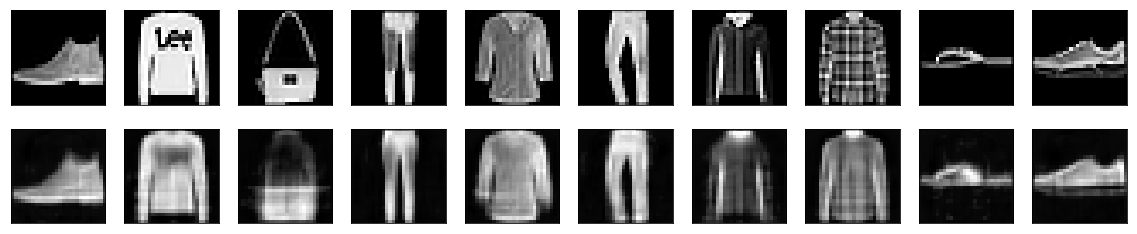

Histograms of the encodings - Sparsity (Hoyer):  0.2713721692562103


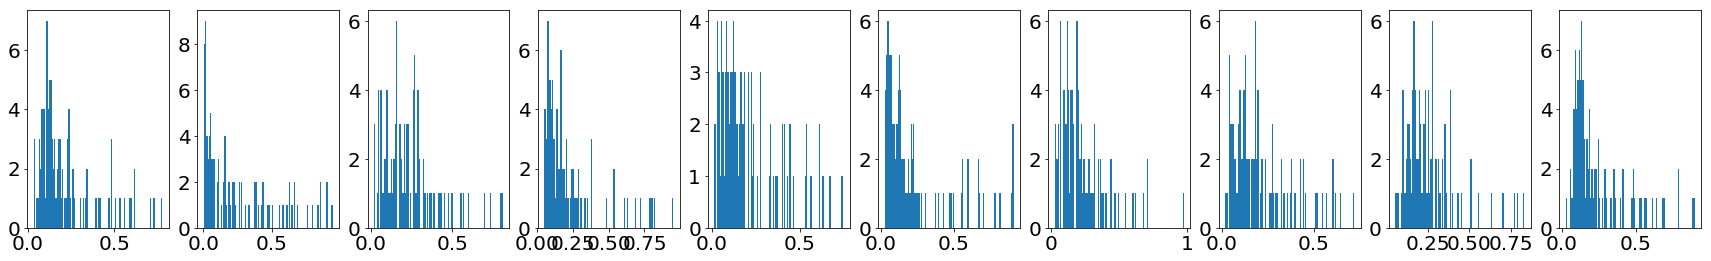

Atom images of the decoder


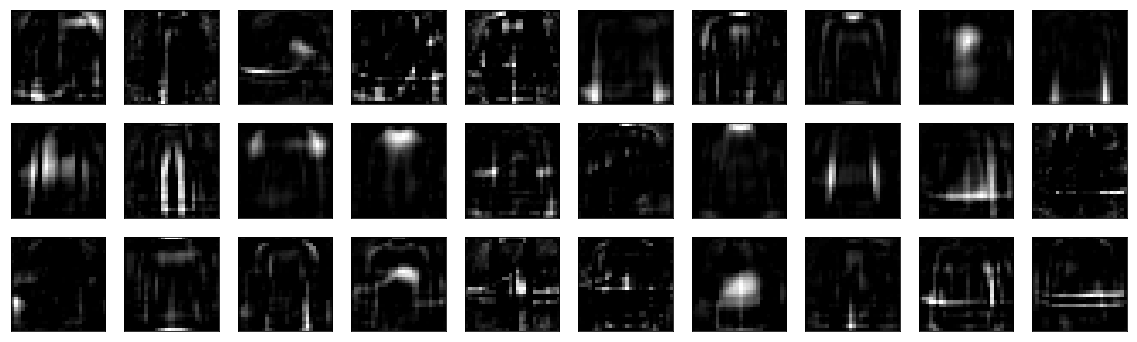

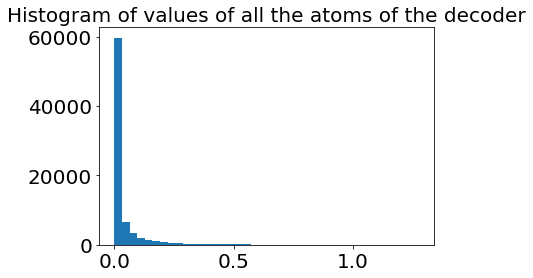

In [45]:
sp_o = 0.1
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


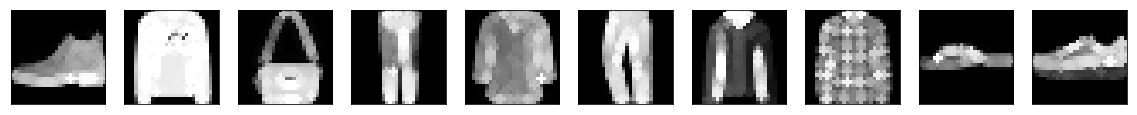

Dilatation of the reconstructions


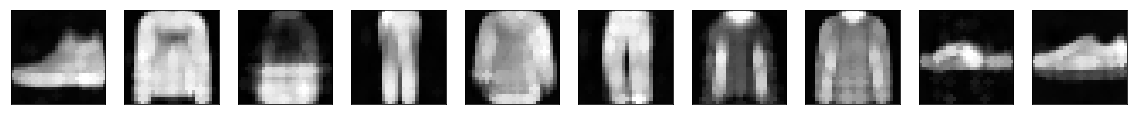

Original images and max-approximation to dilatation
Max-approx error to original:  1.2118380533218385  - Max-approx error to reconstruction:  1.2671298599243164


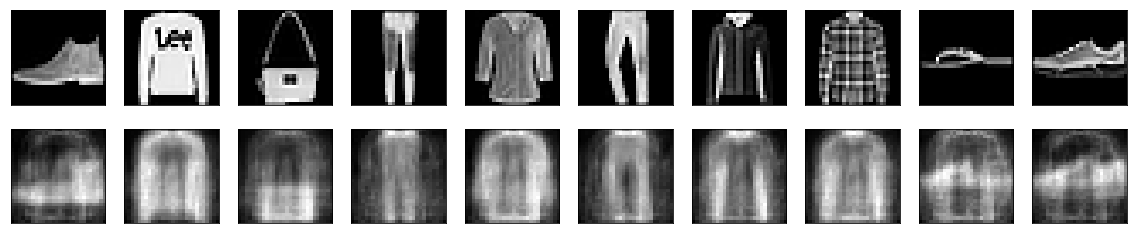

Dilated of the atom images of the decoder


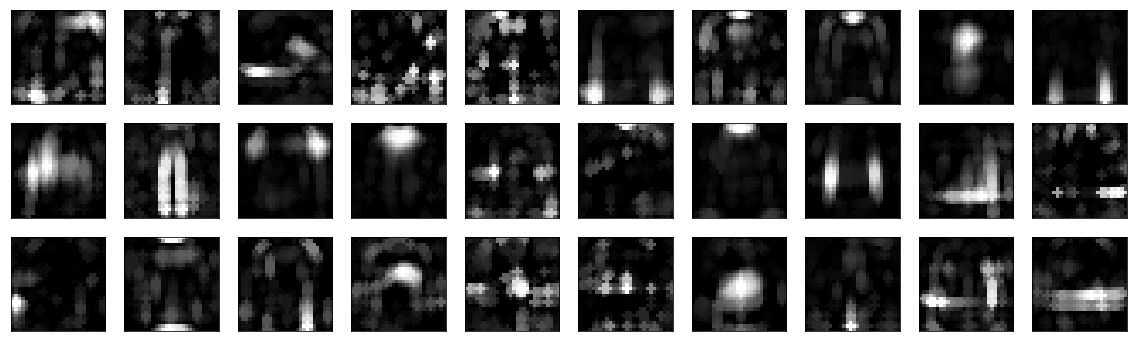

In [46]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.2 Sparsity_weight = 0.0005 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.012373977595567704


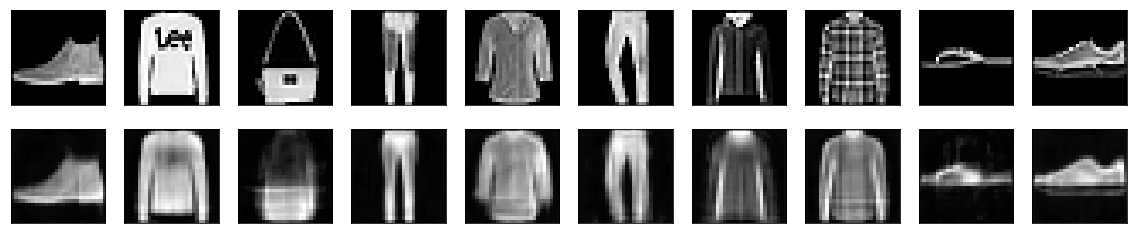

Histograms of the encodings - Sparsity (Hoyer):  0.3696630299091339


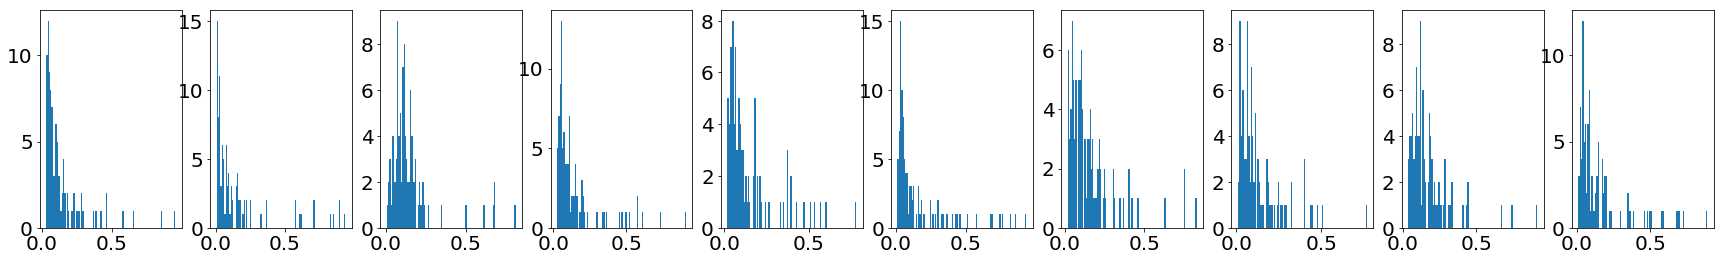

Atom images of the decoder


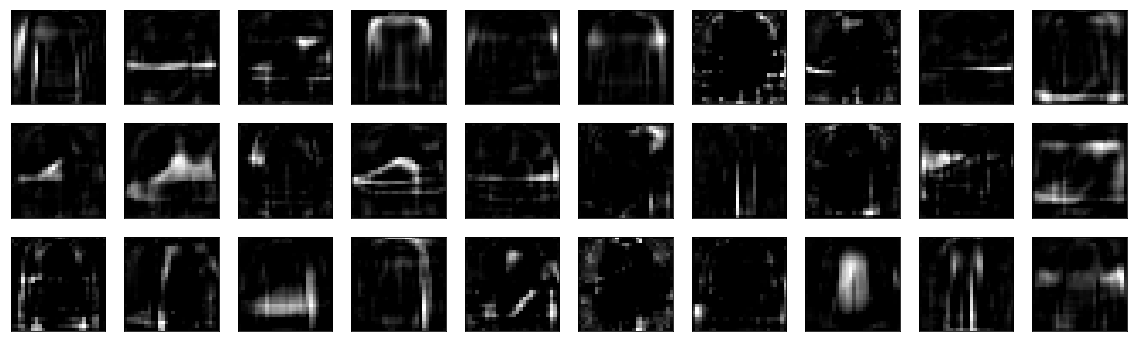

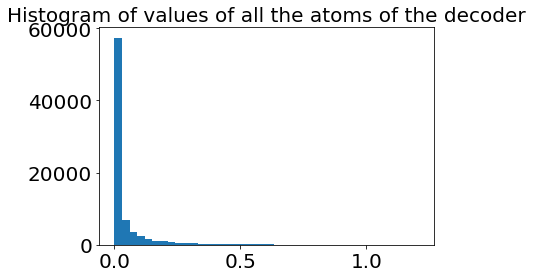

In [47]:
sp_o = 0.1
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


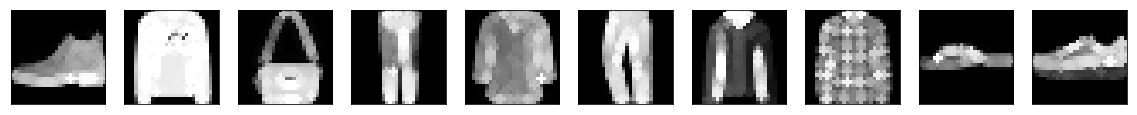

Dilatation of the reconstructions


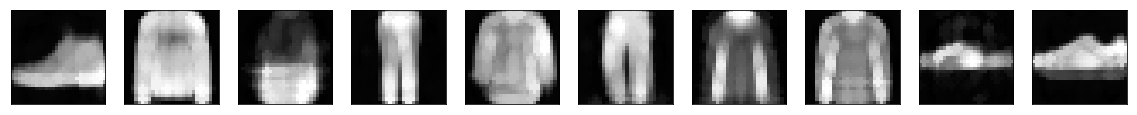

Original images and max-approximation to dilatation
Max-approx error to original:  0.5207249616622924  - Max-approx error to reconstruction:  0.5523843511581421


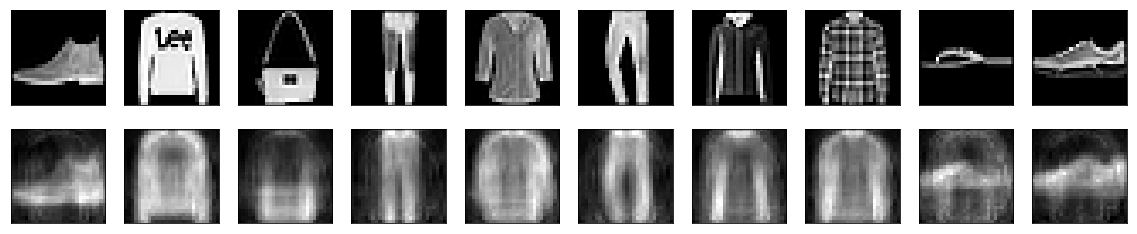

Dilated of the atom images of the decoder


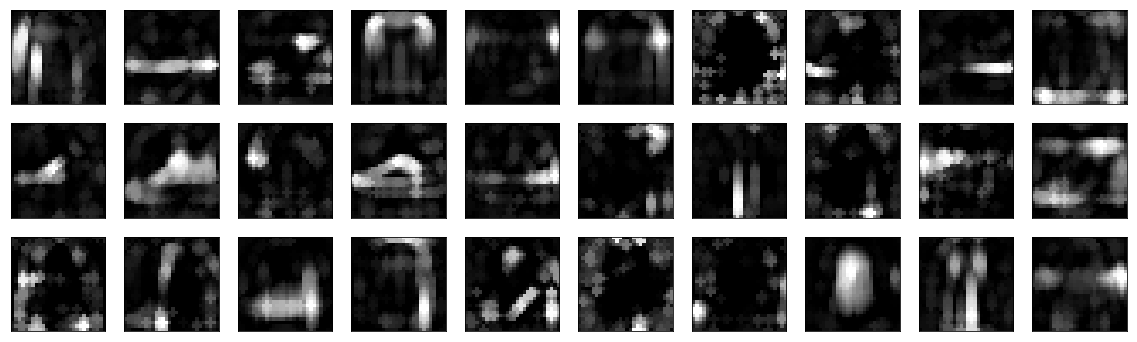

In [48]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.3 Sparsity_weight = 0.001 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.013200869885087013


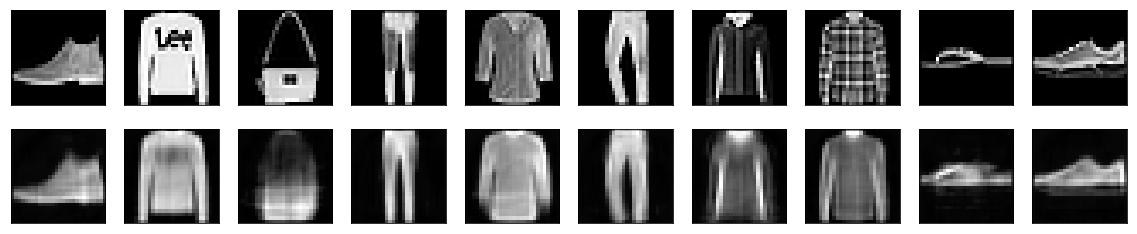

Histograms of the encodings - Sparsity (Hoyer):  0.40055689215660095


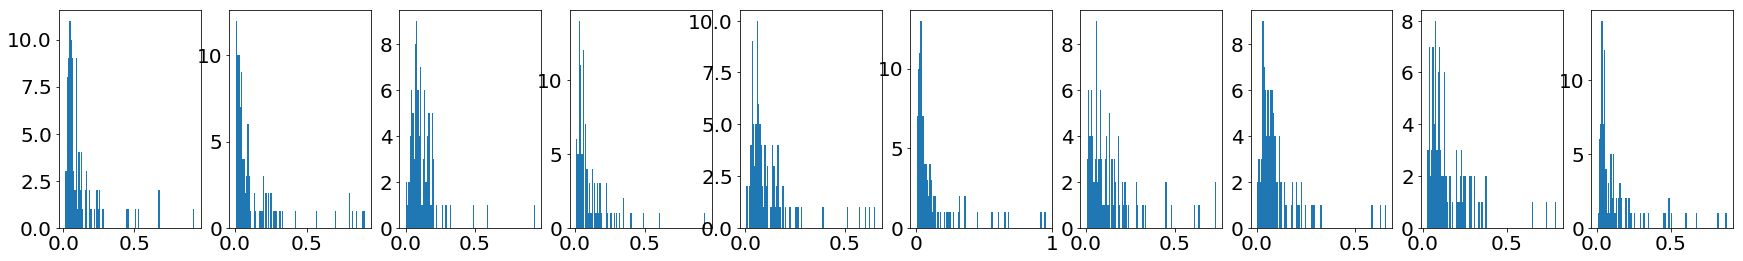

Atom images of the decoder


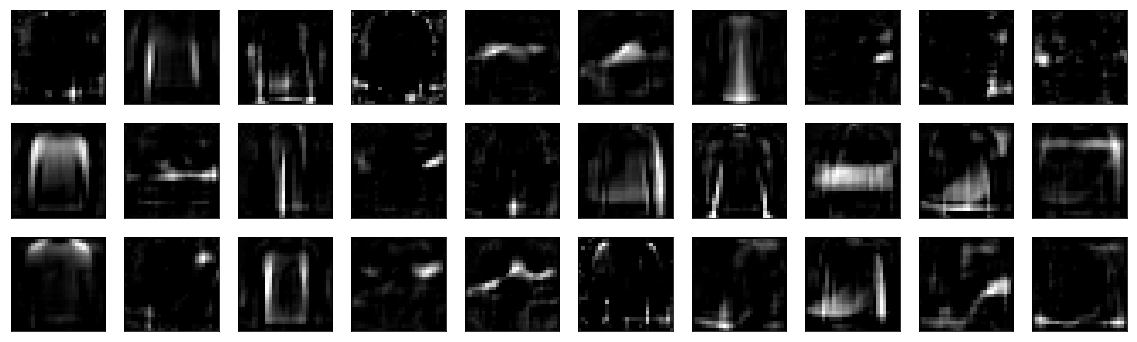

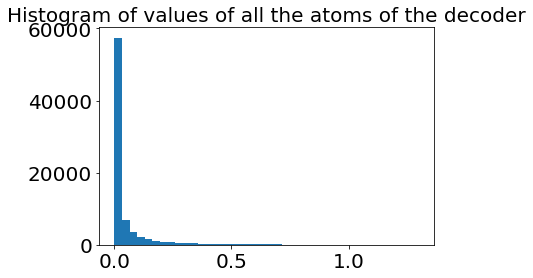

In [49]:
sp_o = 0.1
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


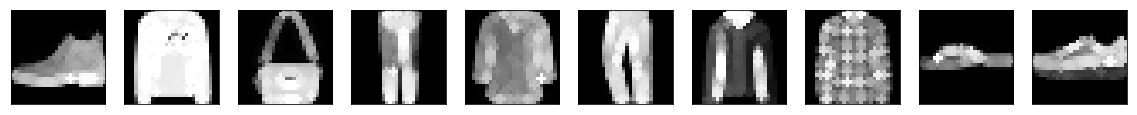

Dilatation of the reconstructions


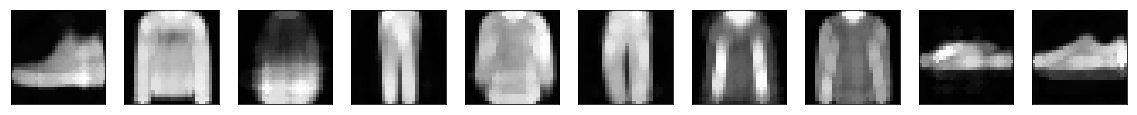

Original images and max-approximation to dilatation
Max-approx error to original:  0.4054487147808075  - Max-approx error to reconstruction:  0.4005265944957733


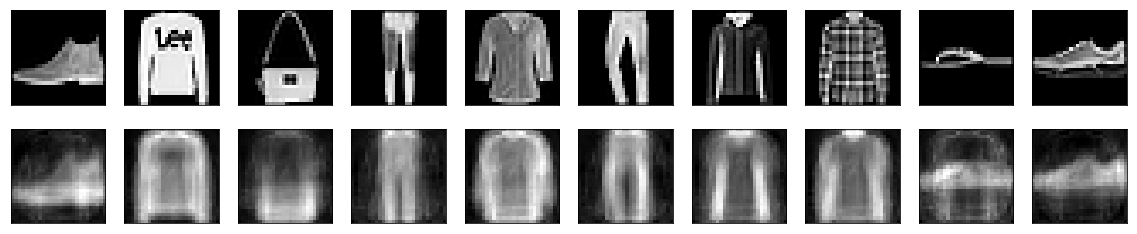

Dilated of the atom images of the decoder


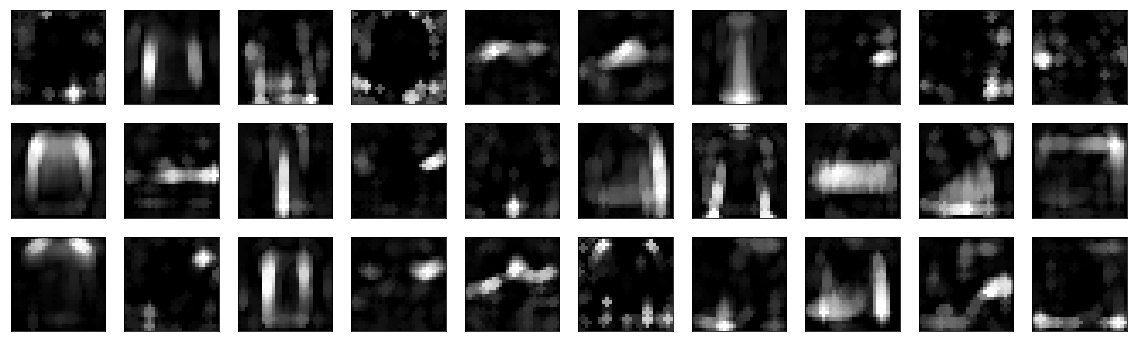

In [50]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.4 Sparsity_weight = 0.005 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.012937554481625558


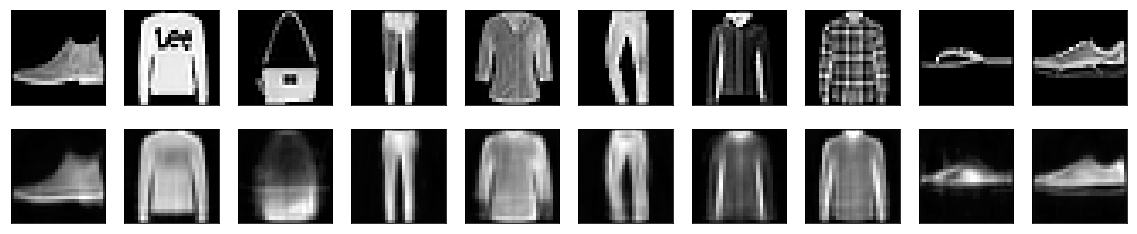

Histograms of the encodings - Sparsity (Hoyer):  0.41837841272354126


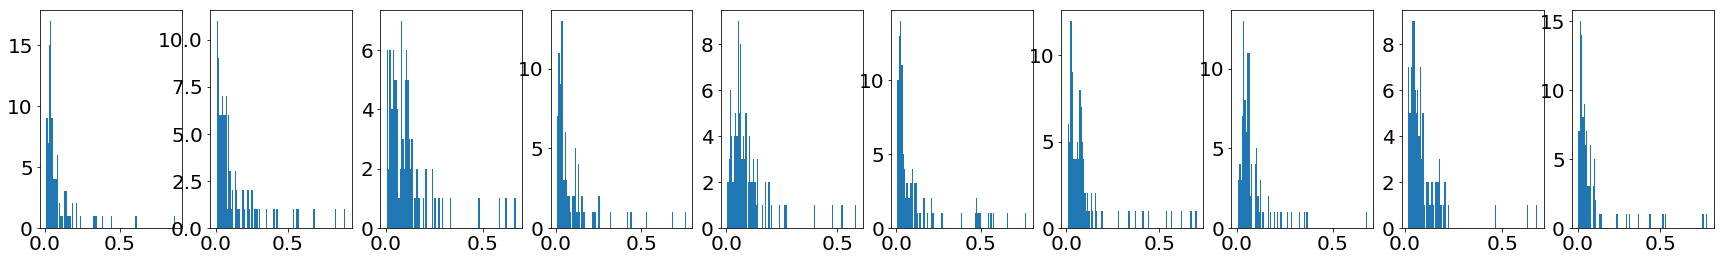

Atom images of the decoder


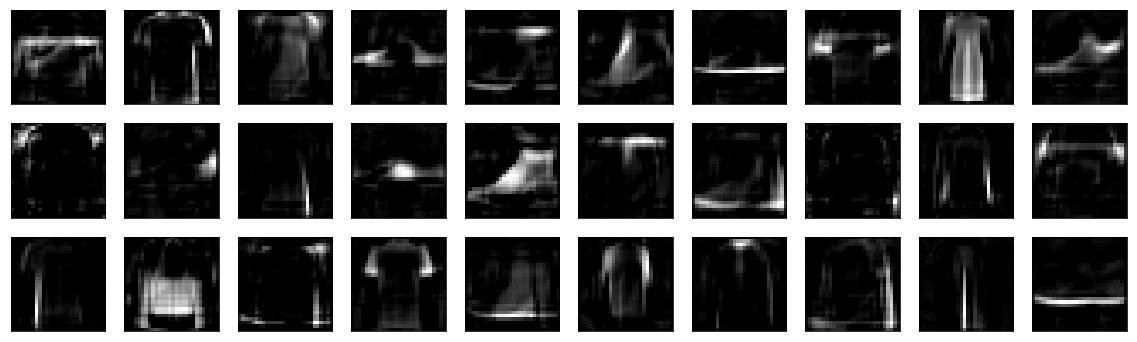

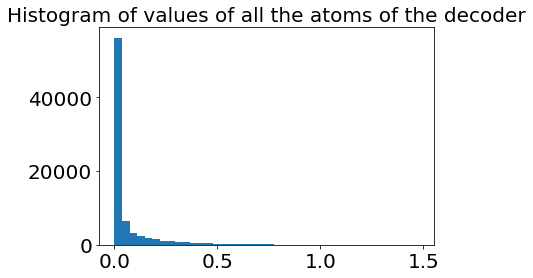

In [51]:
sp_o = 0.1
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


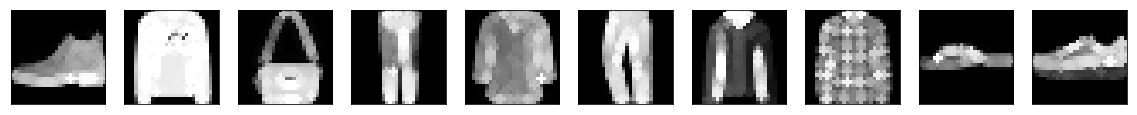

Dilatation of the reconstructions


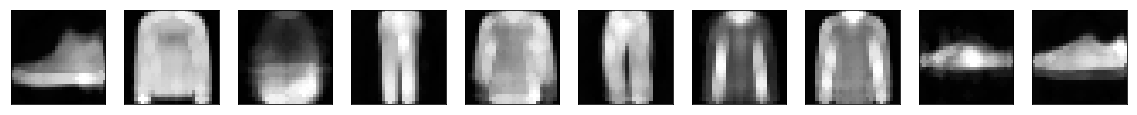

Original images and max-approximation to dilatation
Max-approx error to original:  0.3049589828491211  - Max-approx error to reconstruction:  0.3020267858505249


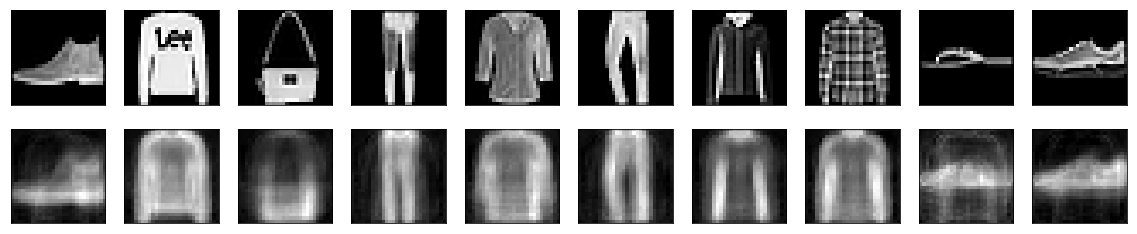

Dilated of the atom images of the decoder


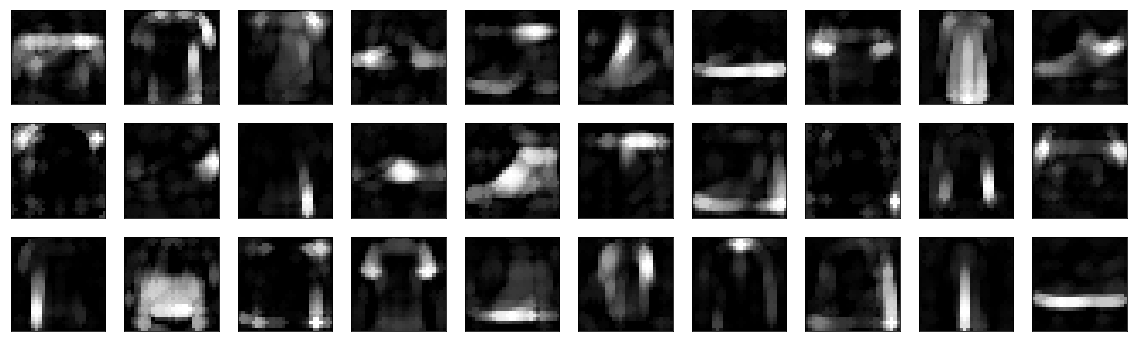

In [52]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.5 Sparsity_weight = 0.01 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.012422831183671951


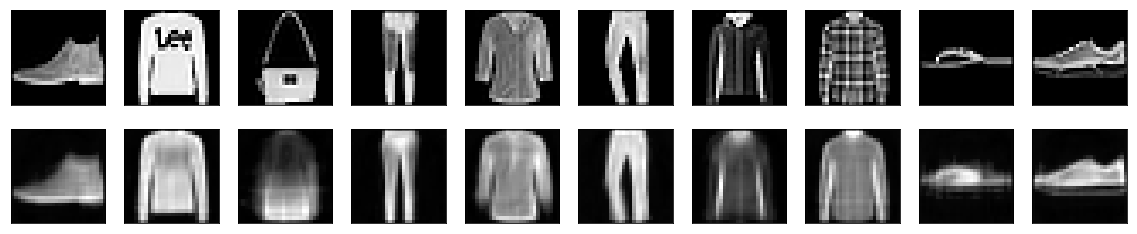

Histograms of the encodings - Sparsity (Hoyer):  0.40286093950271606


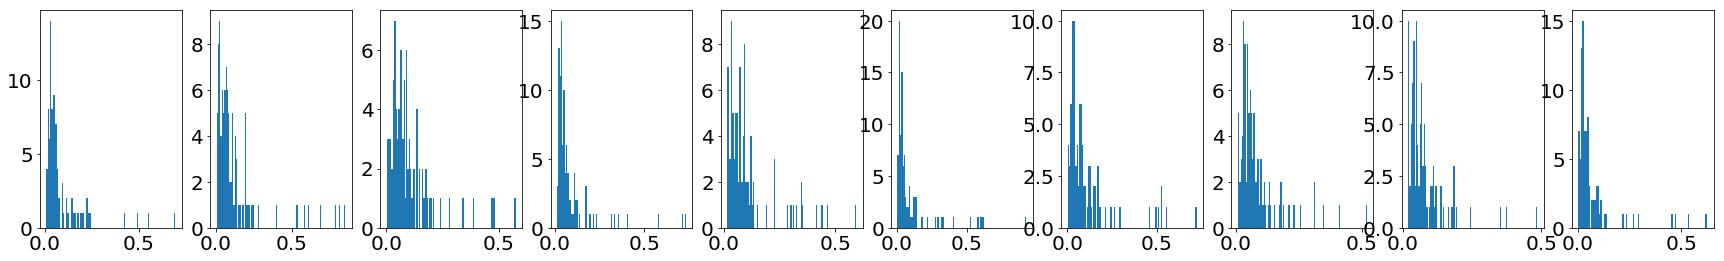

Atom images of the decoder


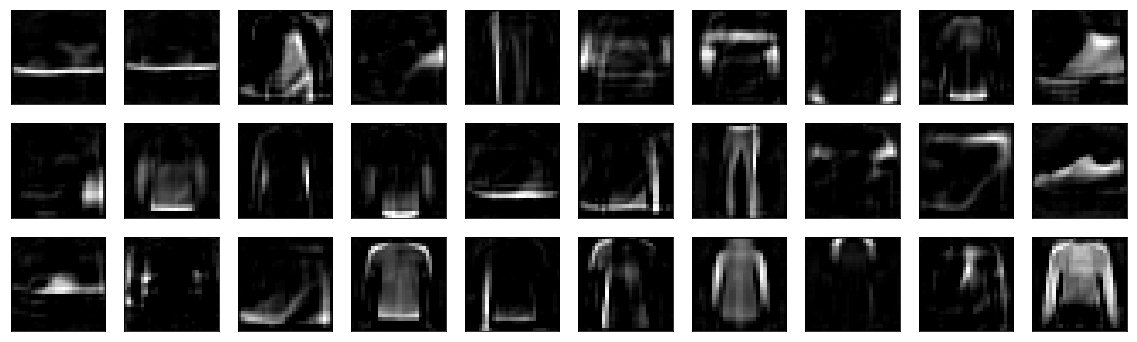

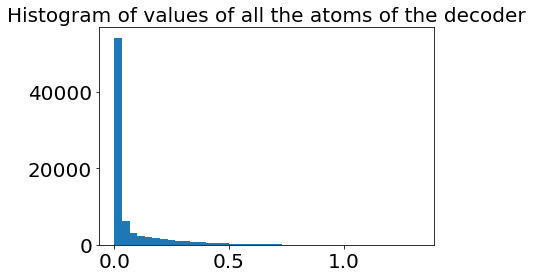

In [53]:
sp_o = 0.1
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


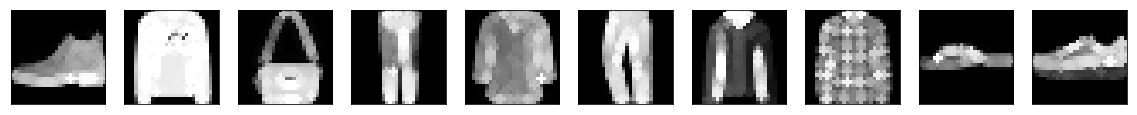

Dilatation of the reconstructions


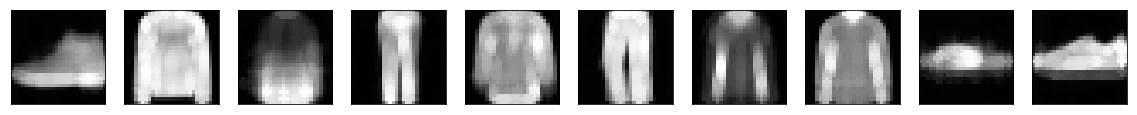

Original images and max-approximation to dilatation
Max-approx error to original:  0.3101966549396515  - Max-approx error to reconstruction:  0.3157011654853821


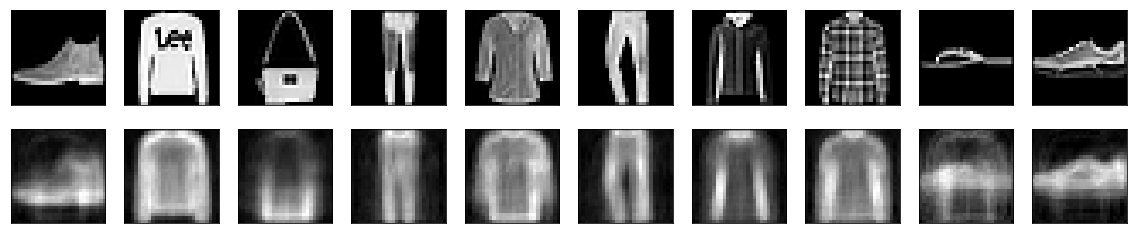

Dilated of the atom images of the decoder


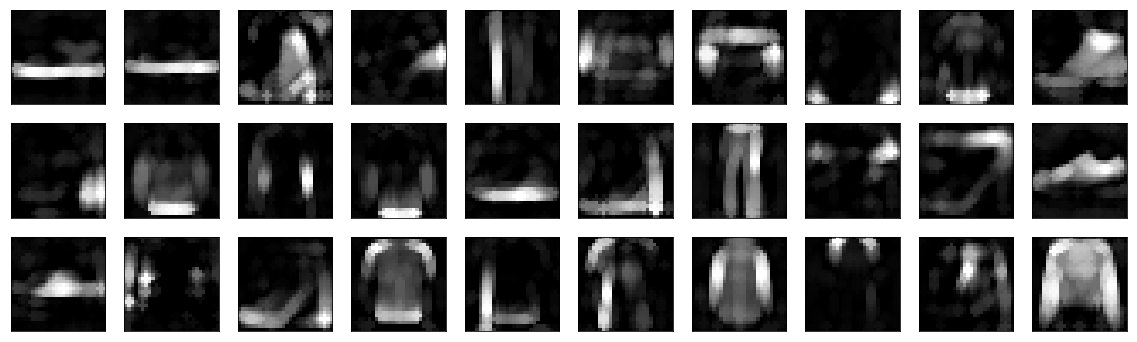

In [54]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.6 Sparsity_weight = 0.05 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.015458500188589096


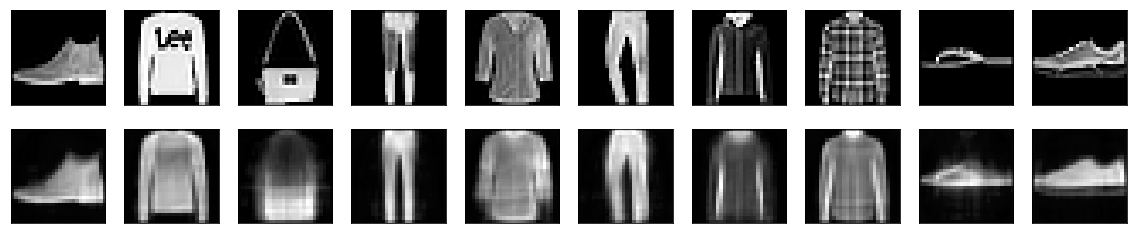

Histograms of the encodings - Sparsity (Hoyer):  0.32941341400146484


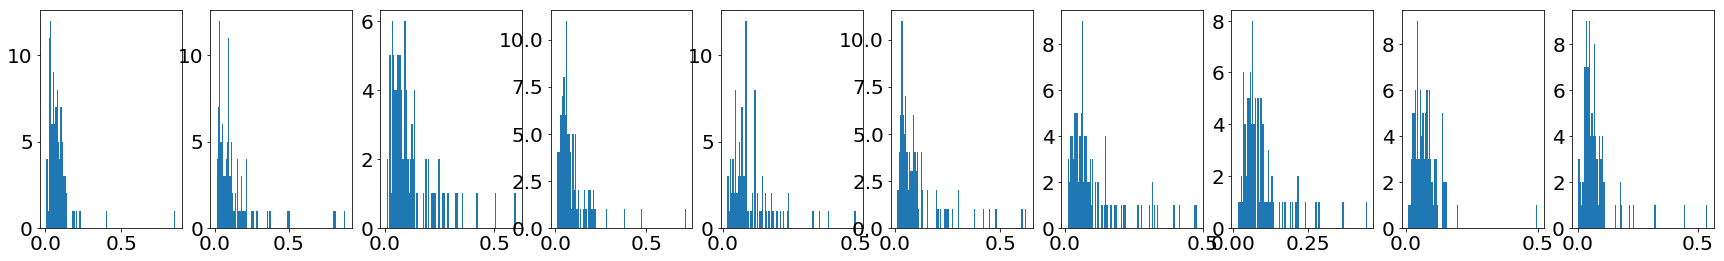

Atom images of the decoder


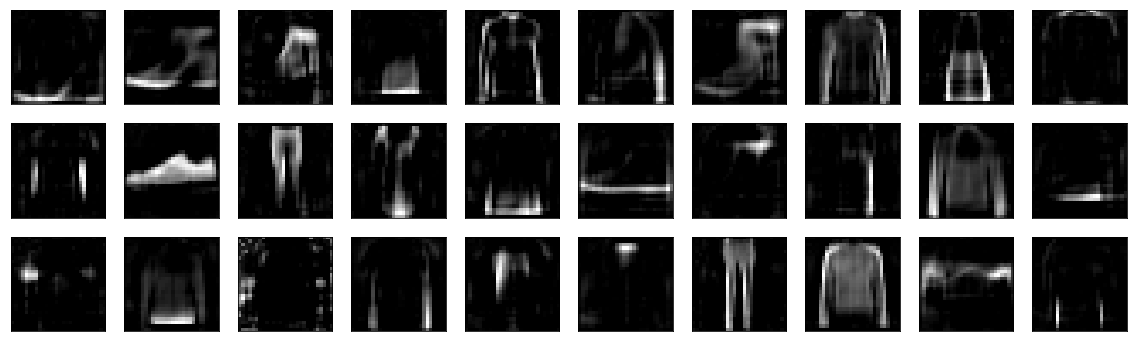

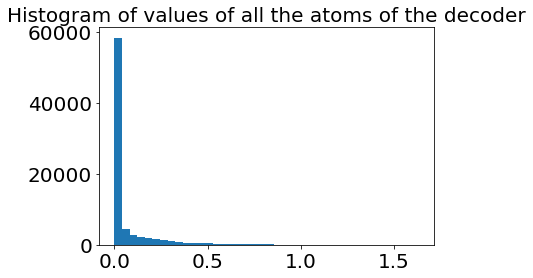

In [55]:
sp_o = 0.1
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


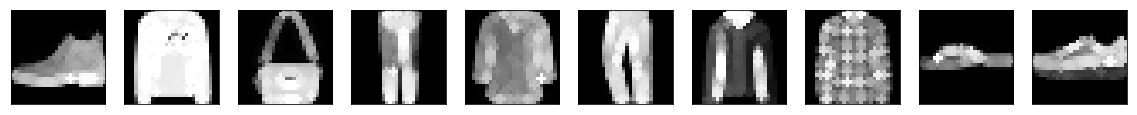

Dilatation of the reconstructions


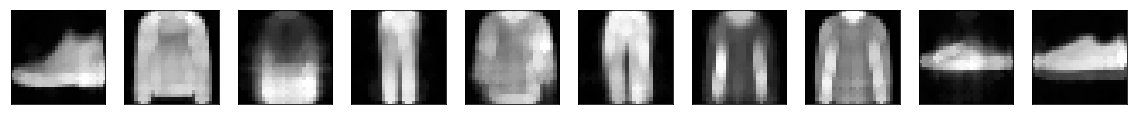

Original images and max-approximation to dilatation
Max-approx error to original:  0.24487123167514802  - Max-approx error to reconstruction:  0.3029071391582489


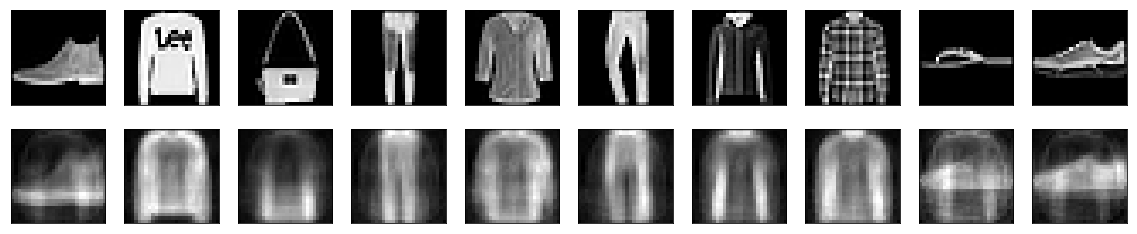

Dilated of the atom images of the decoder


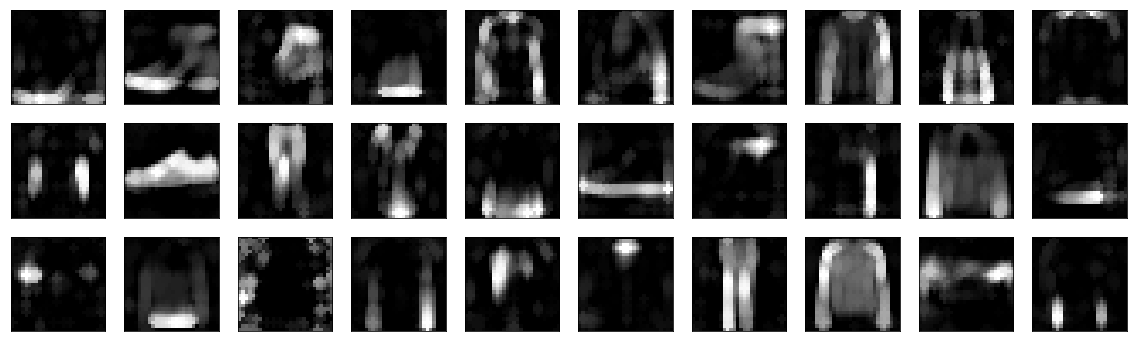

In [56]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.7 Sparsity_weight = 0.1 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.014867728179693222


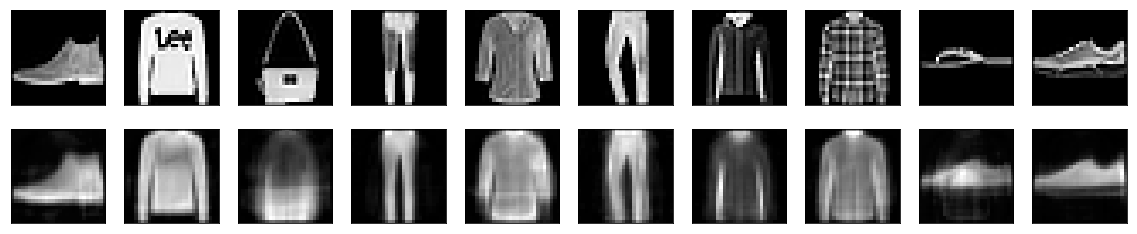

Histograms of the encodings - Sparsity (Hoyer):  0.3146195113658905


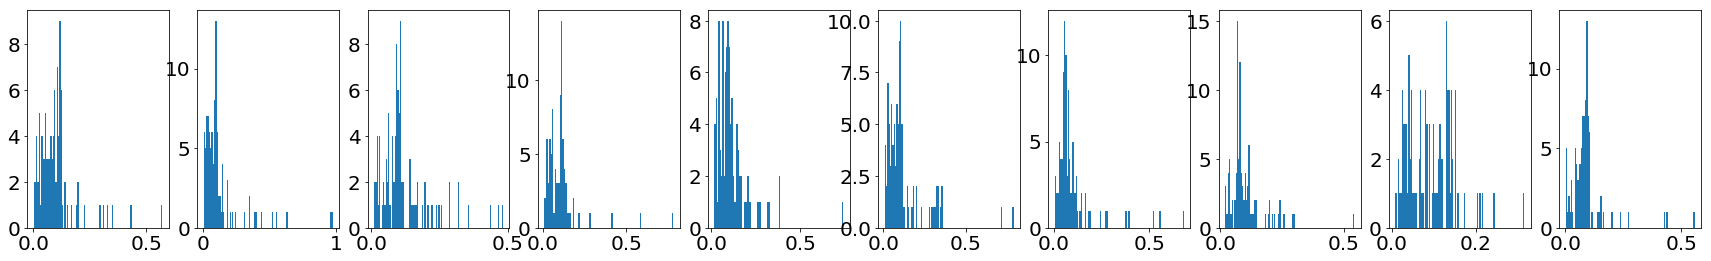

Atom images of the decoder


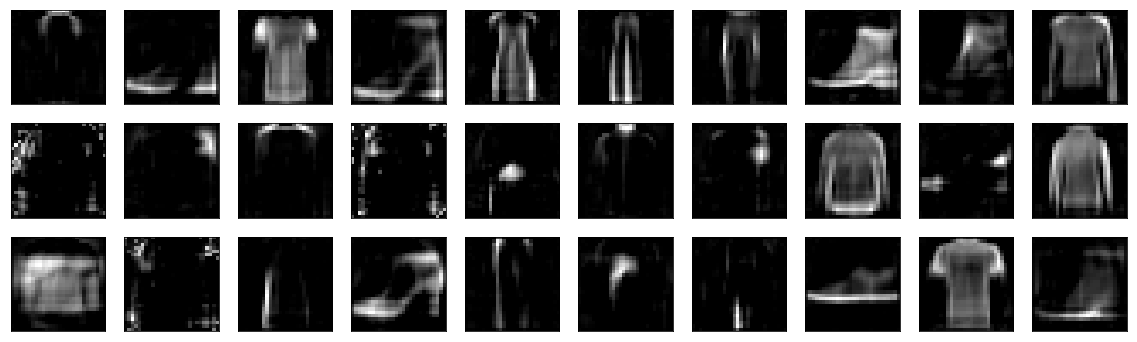

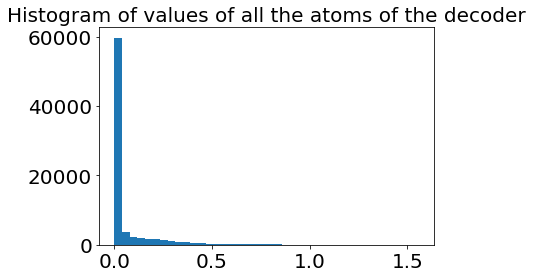

In [57]:
sp_o = 0.1
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


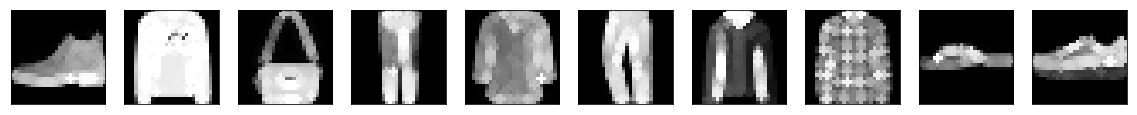

Dilatation of the reconstructions


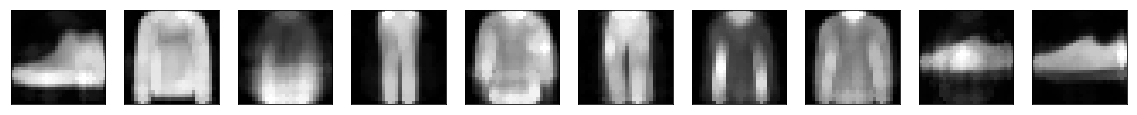

Original images and max-approximation to dilatation
Max-approx error to original:  0.2319301738500595  - Max-approx error to reconstruction:  0.25166732861995694


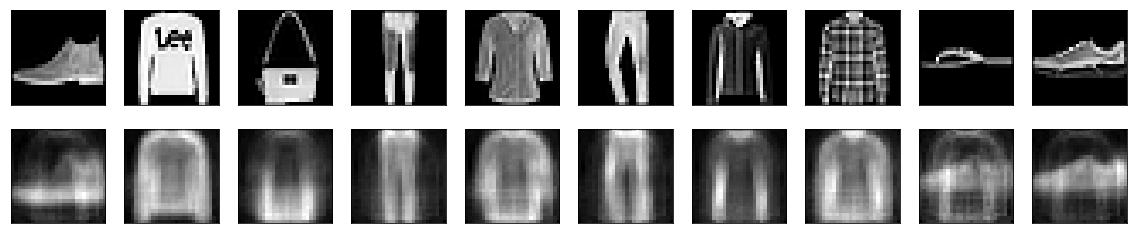

Dilated of the atom images of the decoder


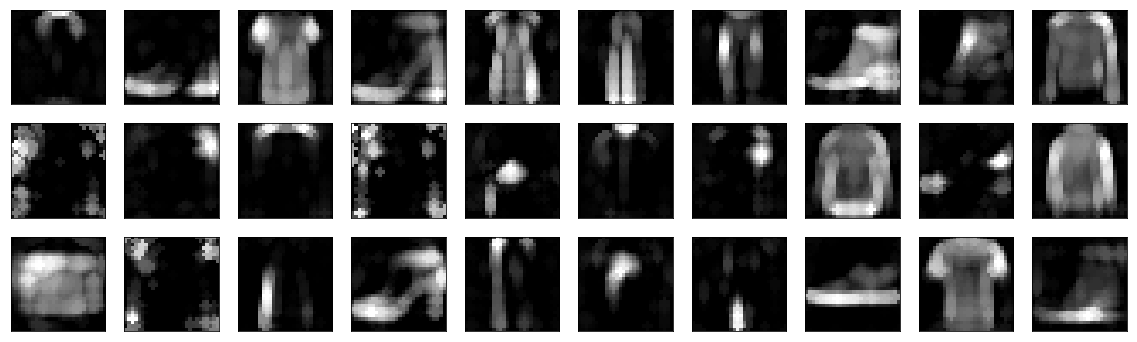

In [58]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 3.8 Sparsity_weight = 0.5 (sp_o = 0.1)

Original images and reconstructions - Reconstruction error:  0.04279498313069344


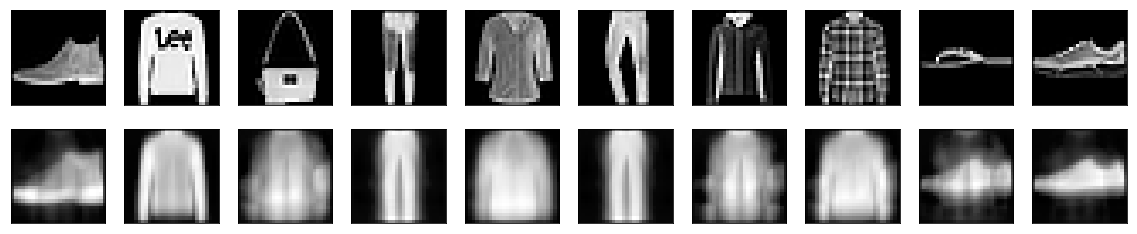

Histograms of the encodings - Sparsity (Hoyer):  0.4733860492706299


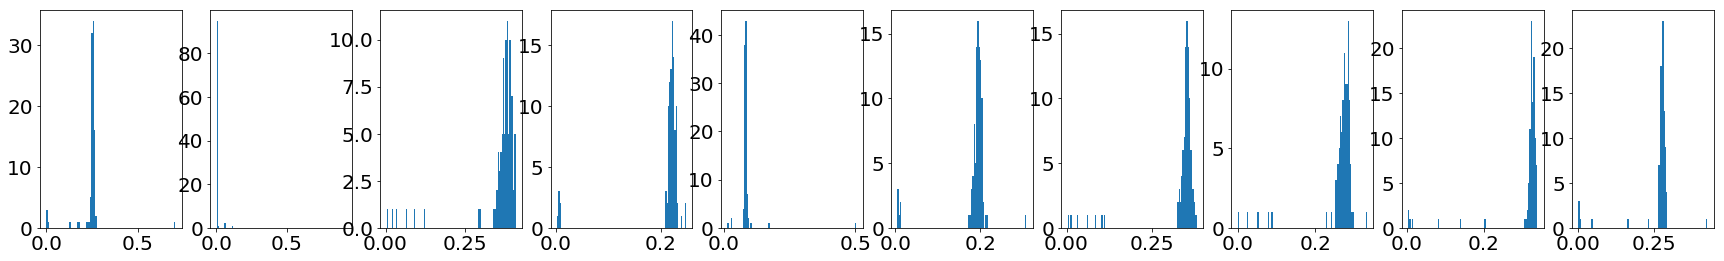

Atom images of the decoder


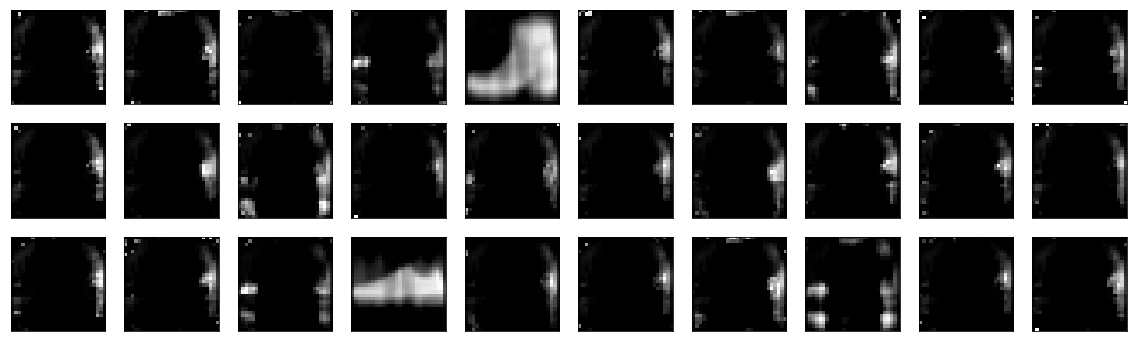

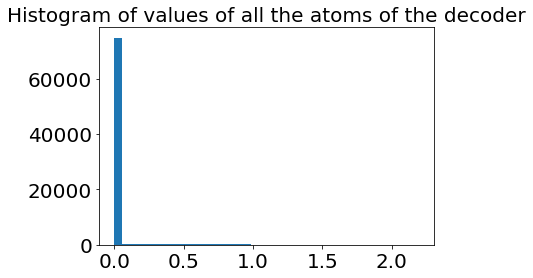

In [59]:
sp_o = 0.1
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


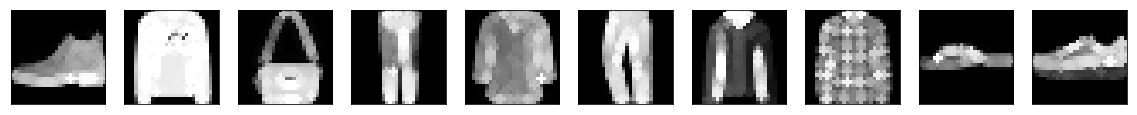

Dilatation of the reconstructions


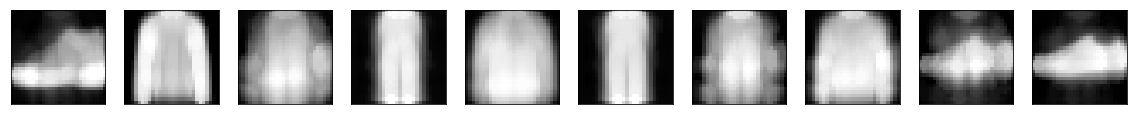

Original images and max-approximation to dilatation
Max-approx error to original:  0.05046442840695381  - Max-approx error to reconstruction:  0.00649425595626235


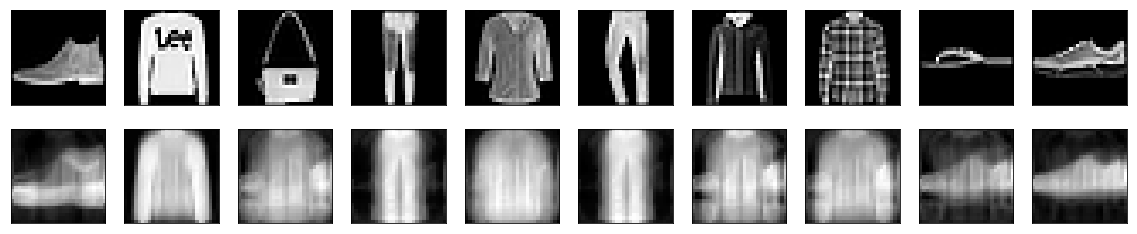

Dilated of the atom images of the decoder


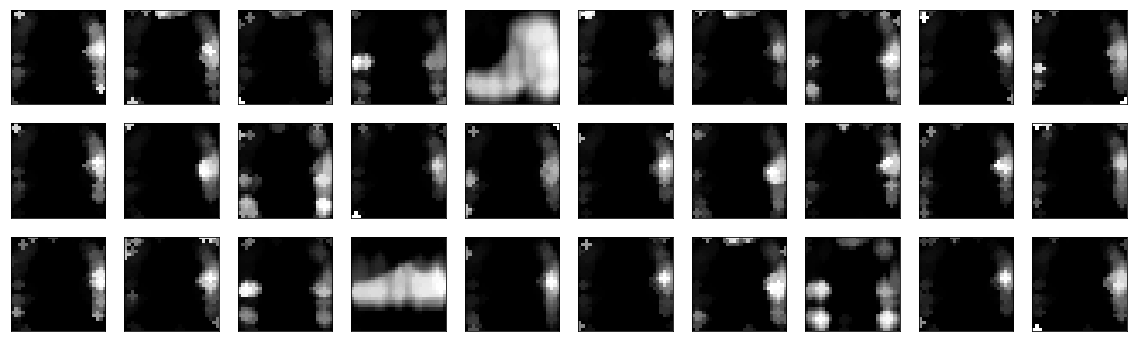

In [60]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

# 4. Sparsity_Objective = 0.2

## 4.1 Sparsity_weight = 0.0001 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.009559357281029225


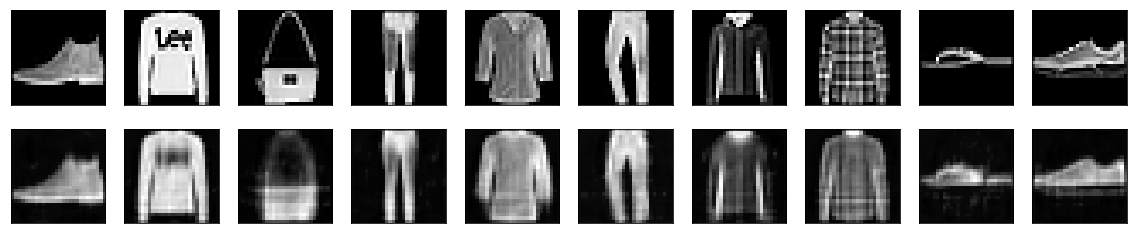

Histograms of the encodings - Sparsity (Hoyer):  0.20324423909187317


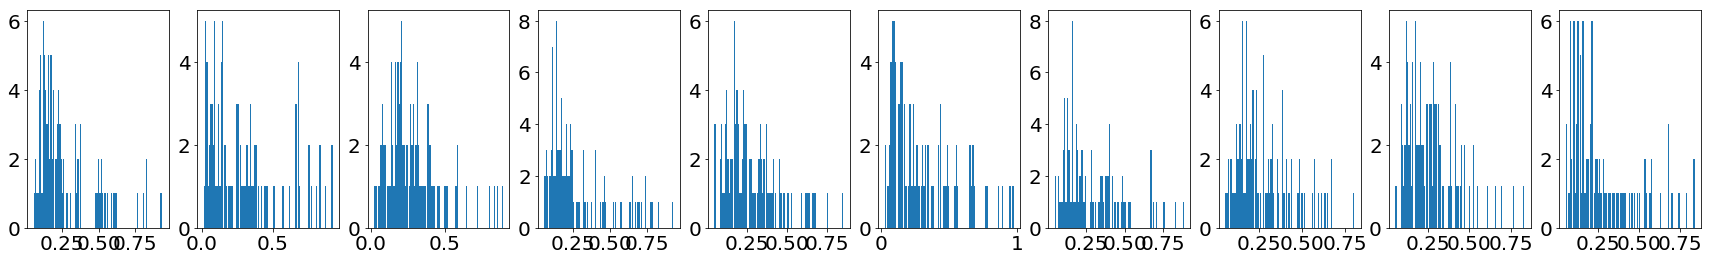

Atom images of the decoder


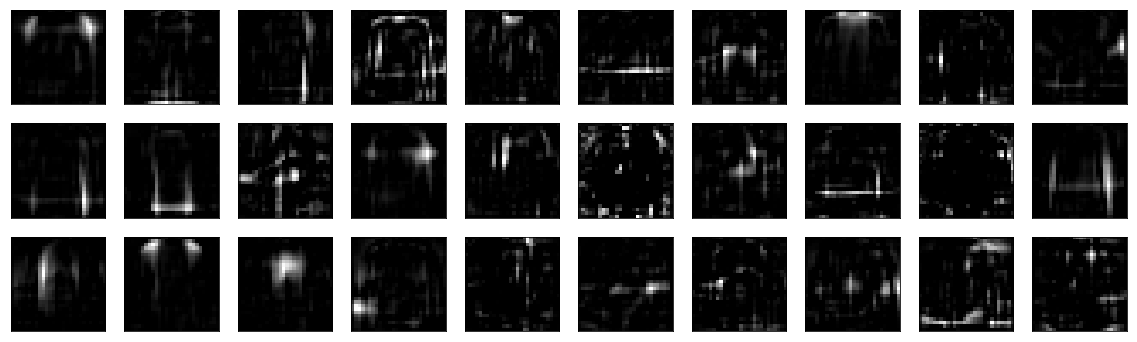

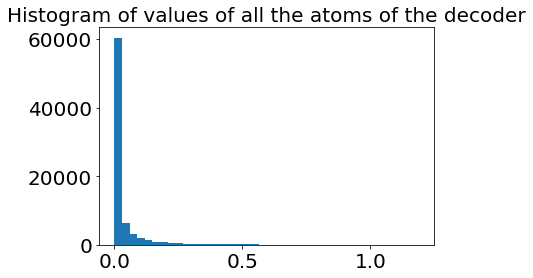

In [61]:
sp_o = 0.2
sp_w = 0.0001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


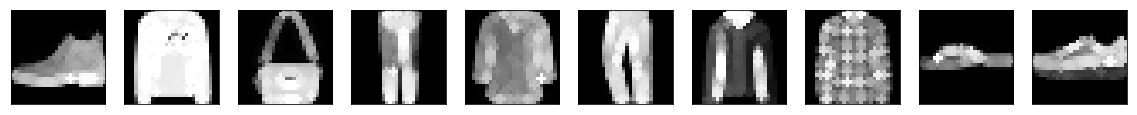

Dilatation of the reconstructions


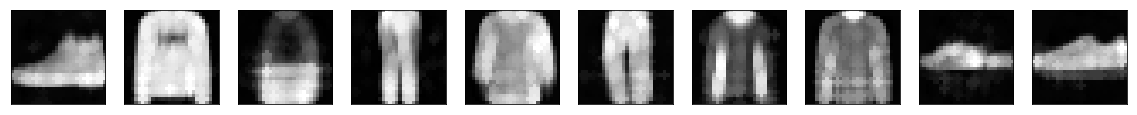

Original images and max-approximation to dilatation
Max-approx error to original:  1.7297949922561646  - Max-approx error to reconstruction:  1.7715007093429564


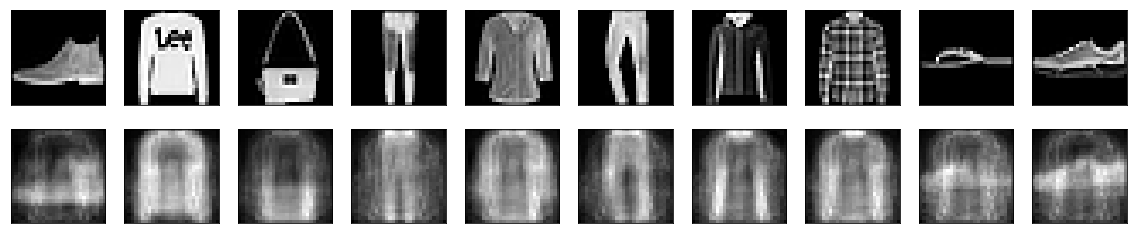

Dilated of the atom images of the decoder


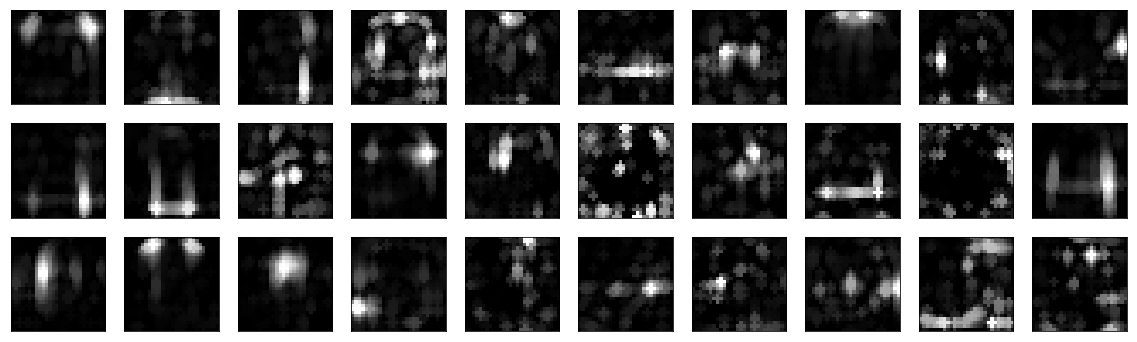

In [62]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.2 Sparsity_weight = 0.0005 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.010316436761617661


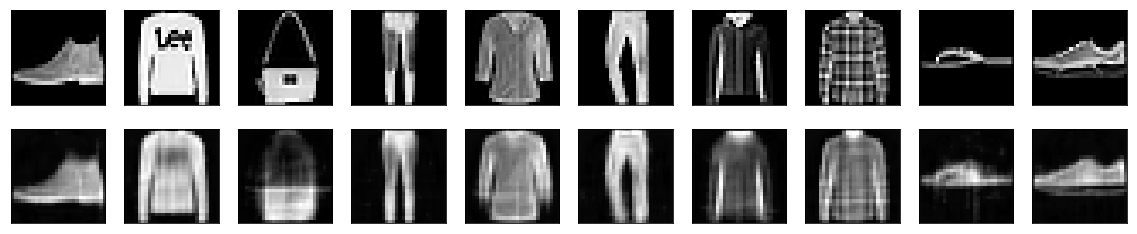

Histograms of the encodings - Sparsity (Hoyer):  0.25062933564186096


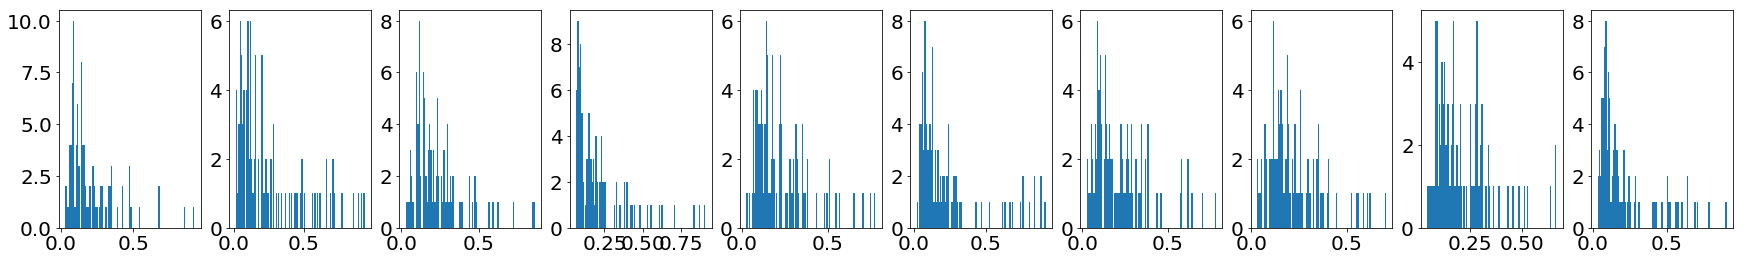

Atom images of the decoder


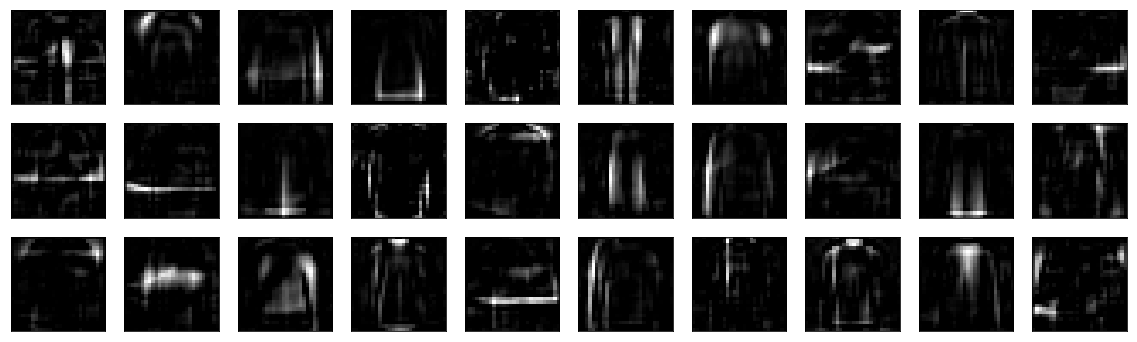

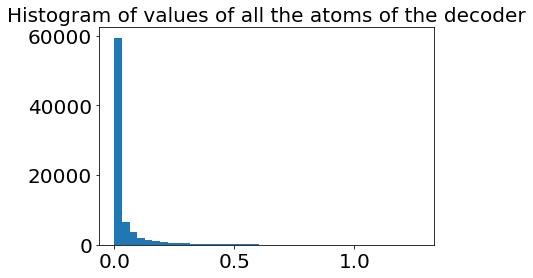

In [63]:
sp_o = 0.2
sp_w = 0.0005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_10_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


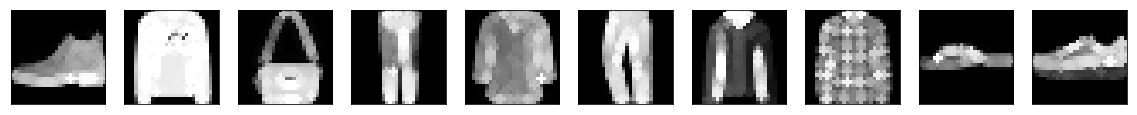

Dilatation of the reconstructions


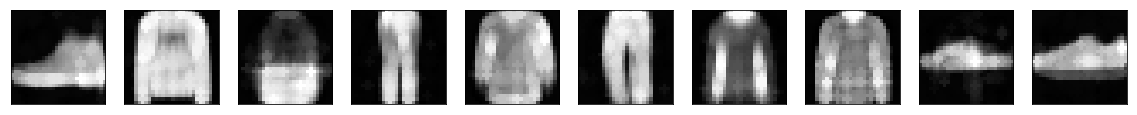

Original images and max-approximation to dilatation
Max-approx error to original:  1.1401987895965575  - Max-approx error to reconstruction:  1.2083135087966919


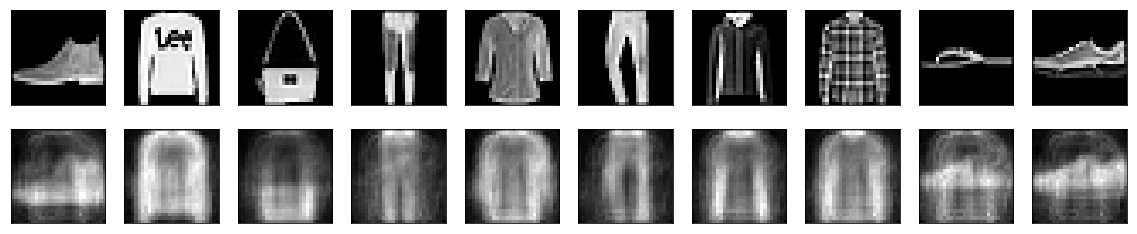

Dilated of the atom images of the decoder


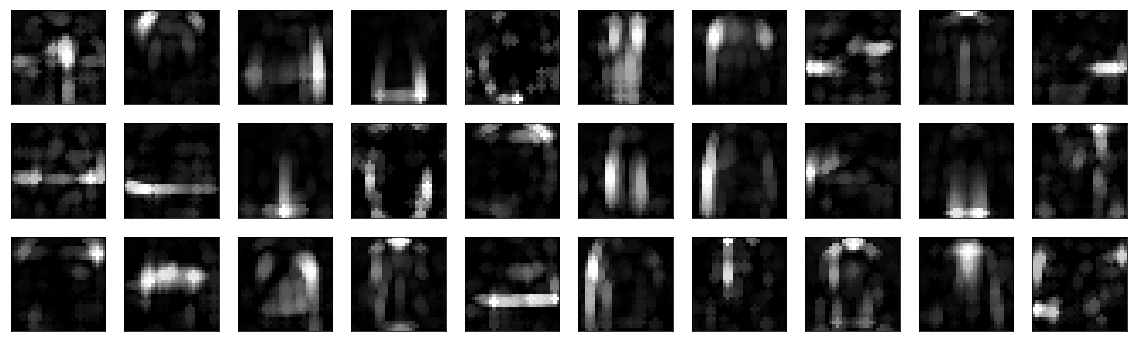

In [64]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.3 Sparsity_weight = 0.001 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.009823395378887653


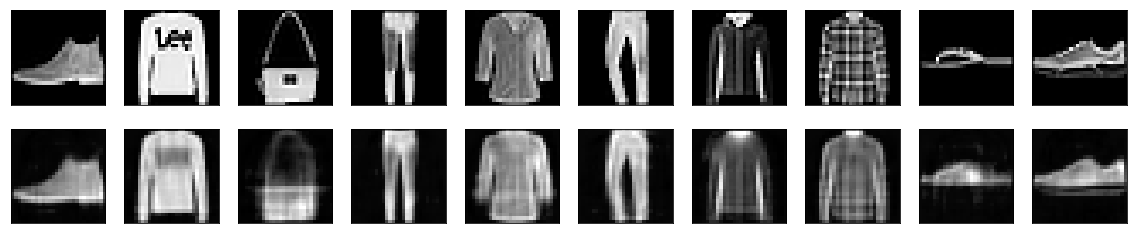

Histograms of the encodings - Sparsity (Hoyer):  0.263908326625824


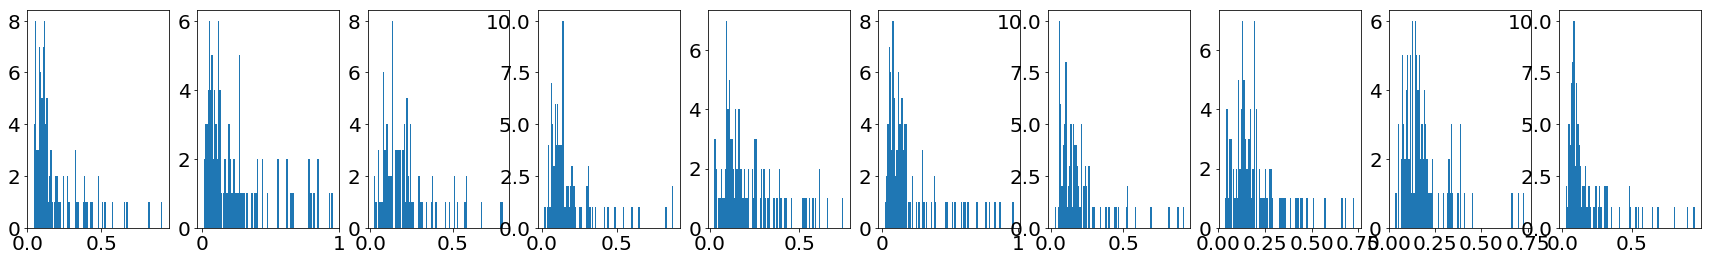

Atom images of the decoder


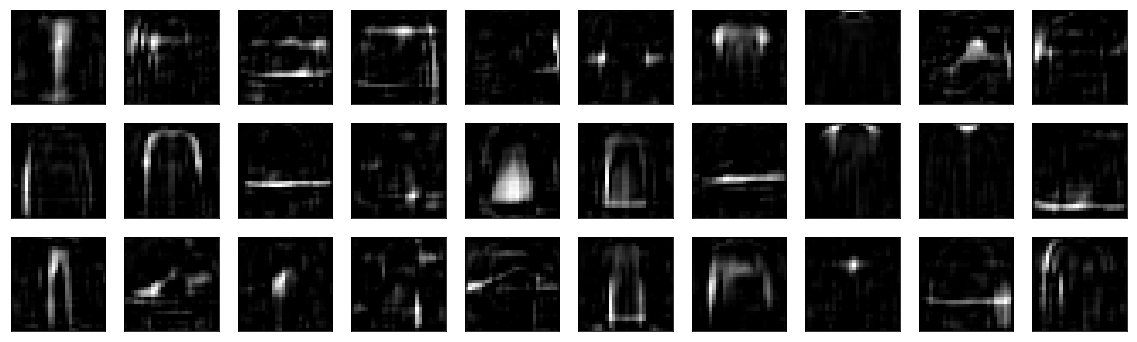

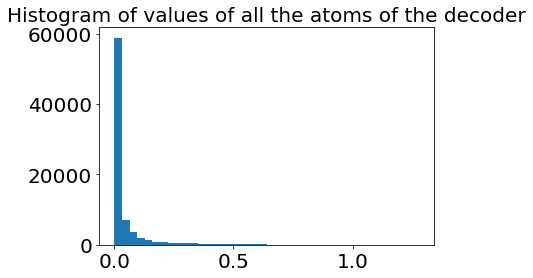

In [65]:
sp_o = 0.2
sp_w = 0.001
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


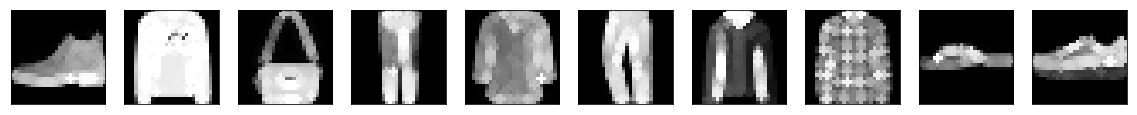

Dilatation of the reconstructions


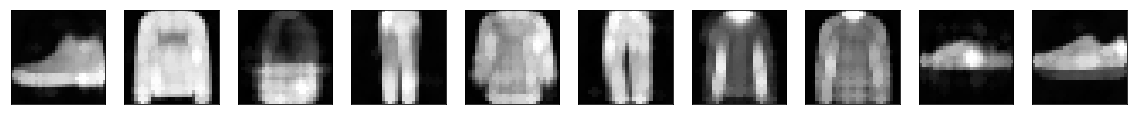

Original images and max-approximation to dilatation
Max-approx error to original:  1.088532403087616  - Max-approx error to reconstruction:  1.109779769706726


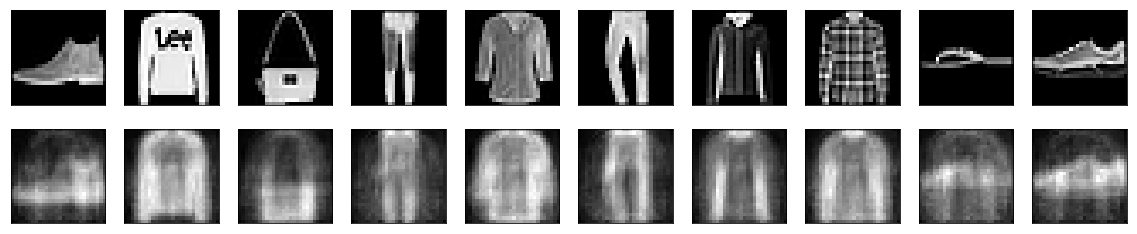

Dilated of the atom images of the decoder


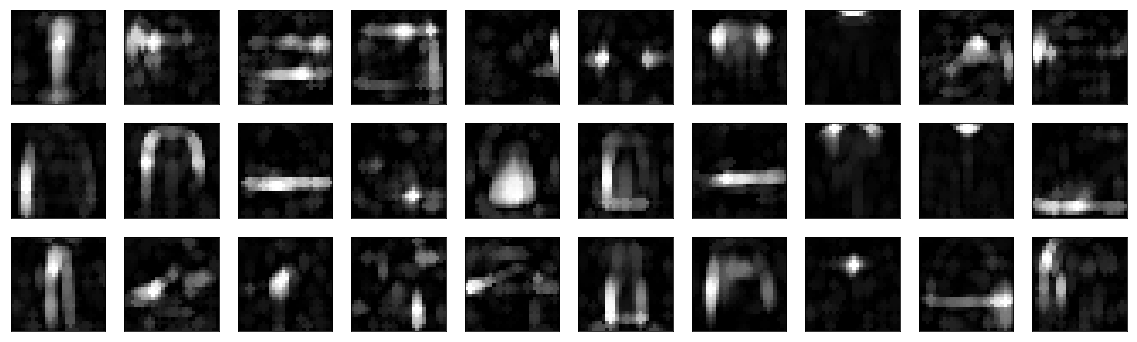

In [66]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.4 Sparsity_weight = 0.005 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.01038119952082634


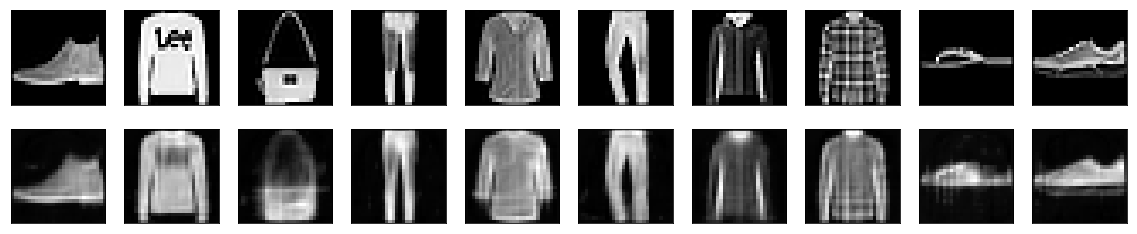

Histograms of the encodings - Sparsity (Hoyer):  0.2527105510234833


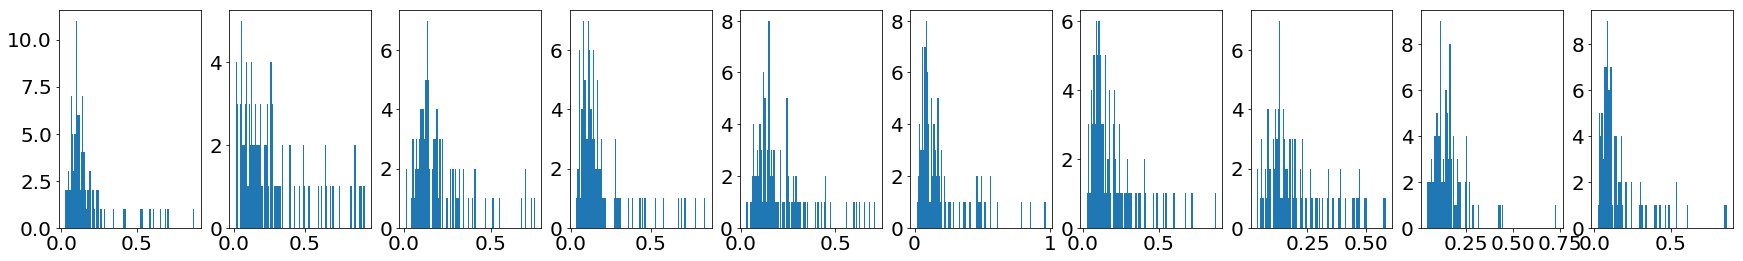

Atom images of the decoder


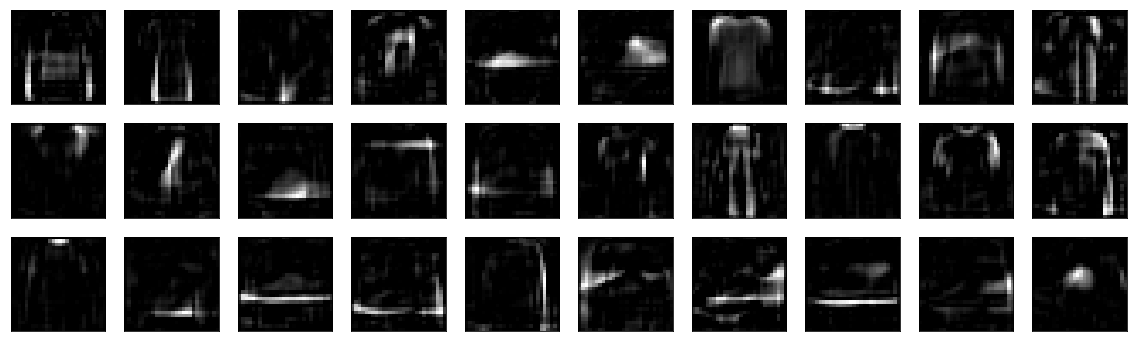

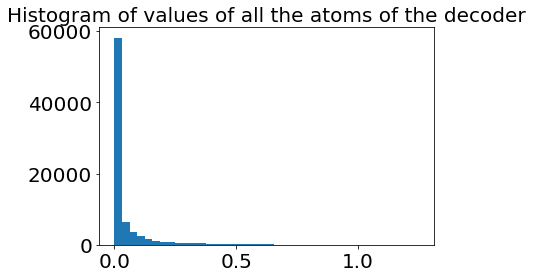

In [67]:
sp_o = 0.2
sp_w = 0.005
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


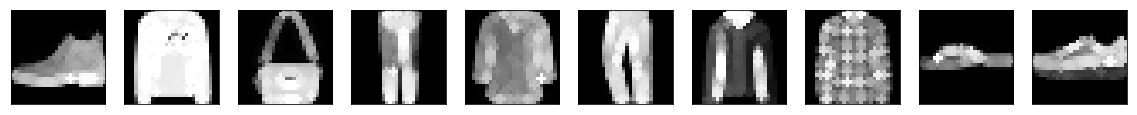

Dilatation of the reconstructions


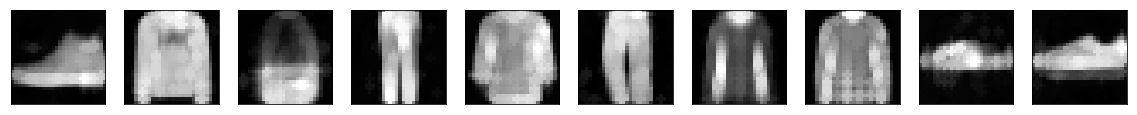

Original images and max-approximation to dilatation
Max-approx error to original:  1.113969706058502  - Max-approx error to reconstruction:  1.1032165912628173


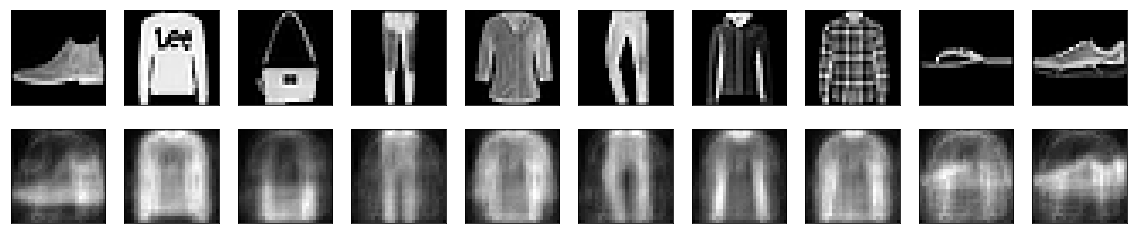

Dilated of the atom images of the decoder


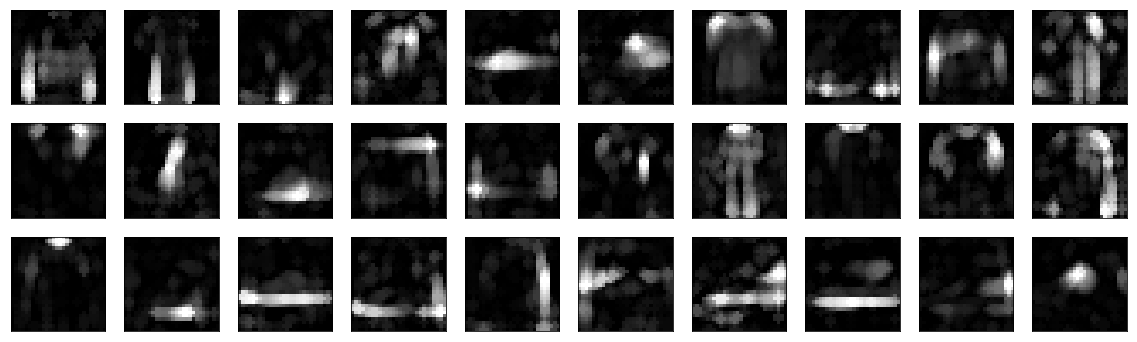

In [68]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.5 Sparsity_weight = 0.01 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.009850214840471744


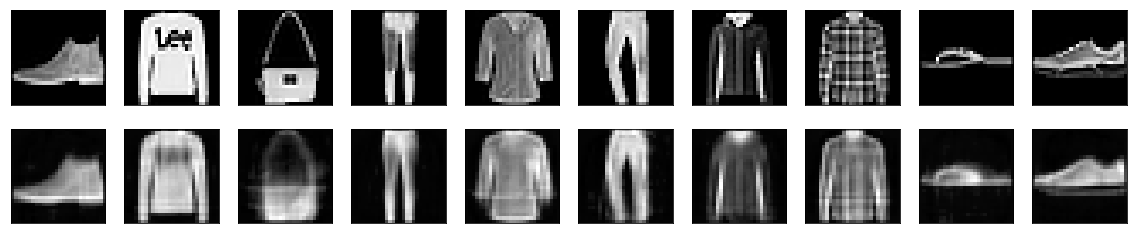

Histograms of the encodings - Sparsity (Hoyer):  0.23470373451709747


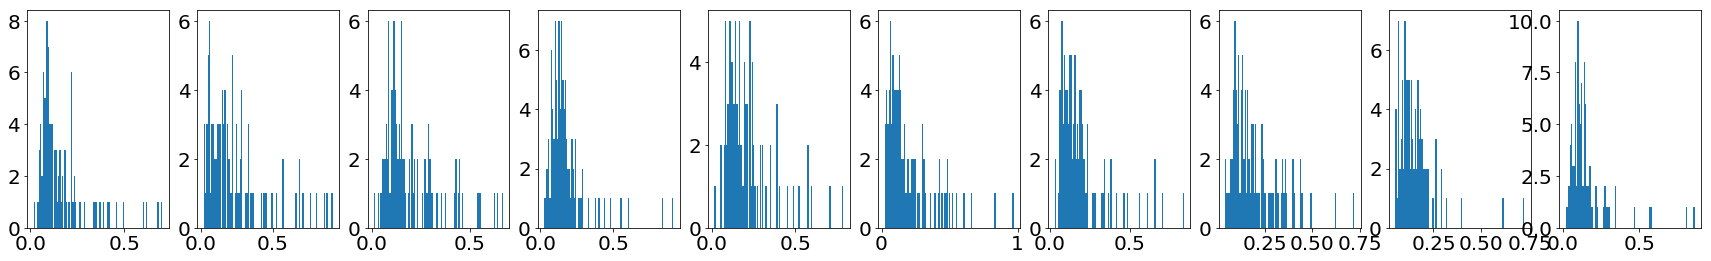

Atom images of the decoder


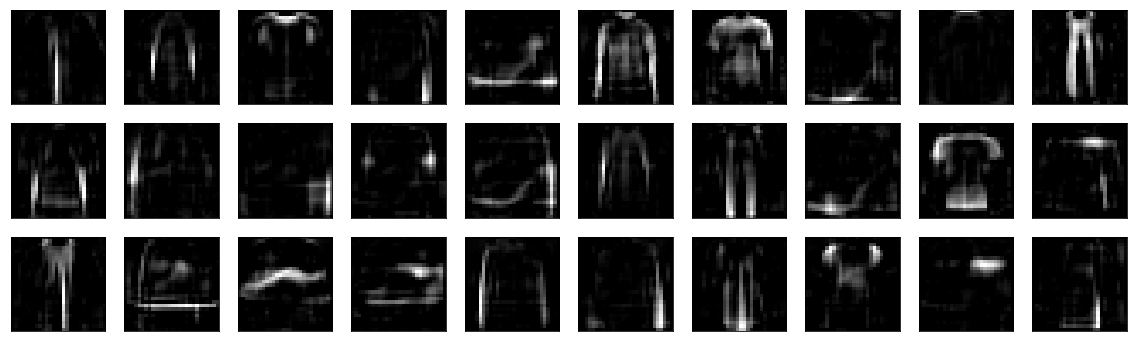

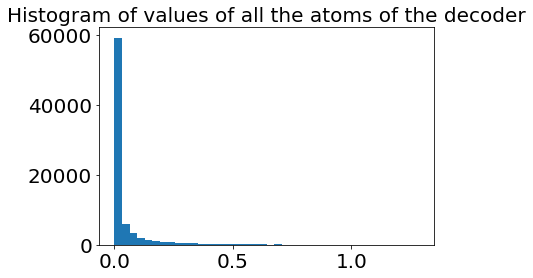

In [69]:
sp_o = 0.2
sp_w = 0.01
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


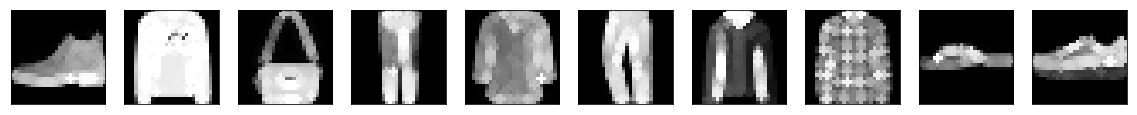

Dilatation of the reconstructions


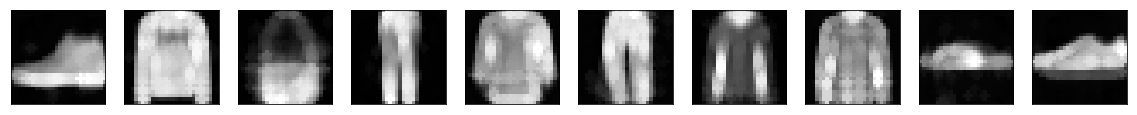

Original images and max-approximation to dilatation
Max-approx error to original:  1.0811522883415223  - Max-approx error to reconstruction:  1.1006436160087585


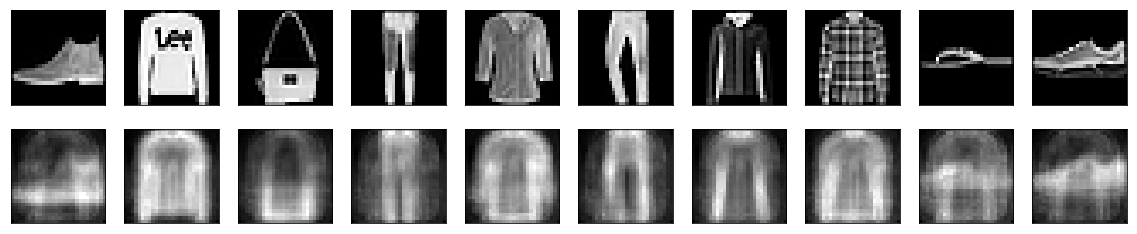

Dilated of the atom images of the decoder


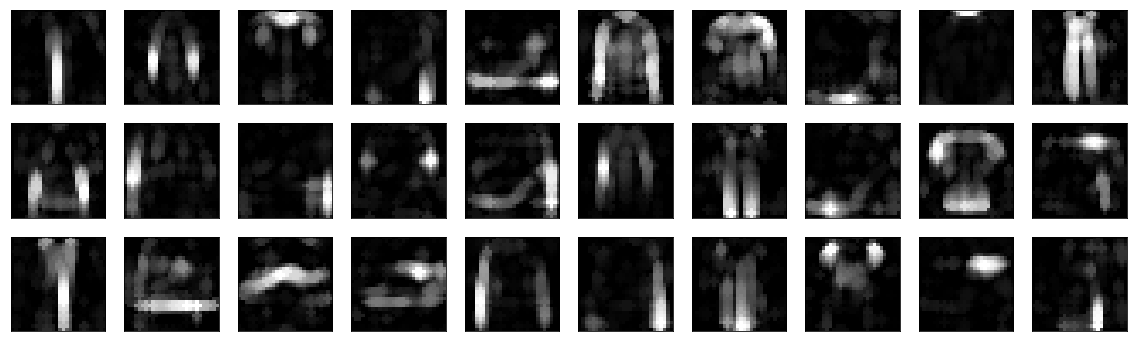

In [70]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.6 Sparsity_weight = 0.05 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.01120761029869318


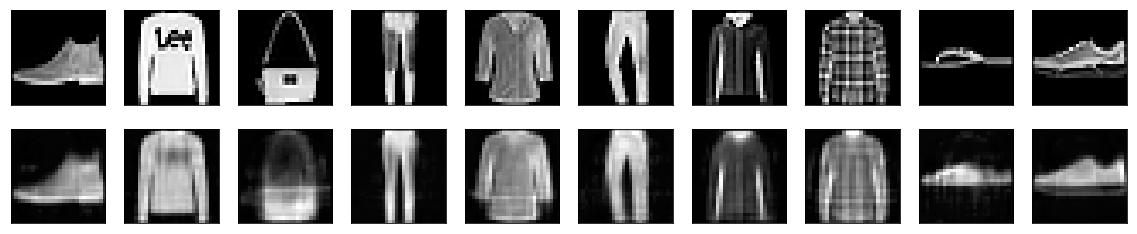

Histograms of the encodings - Sparsity (Hoyer):  0.22202004492282867


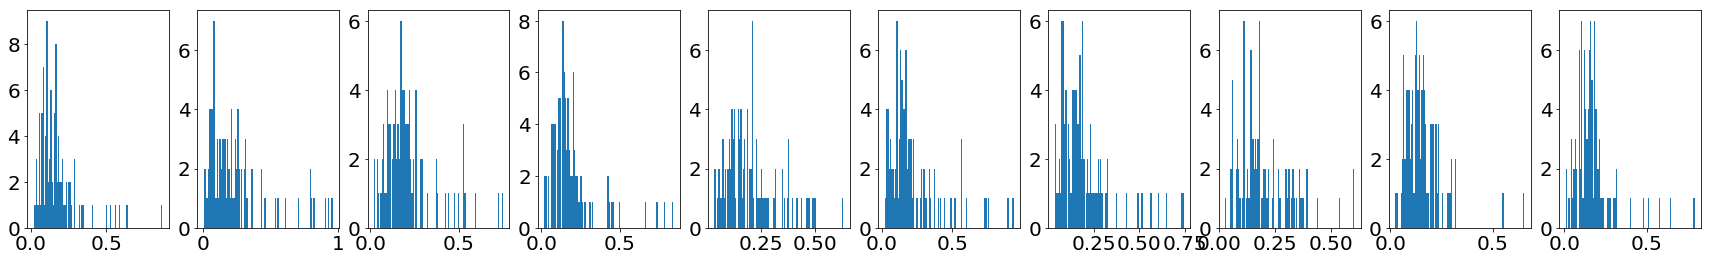

Atom images of the decoder


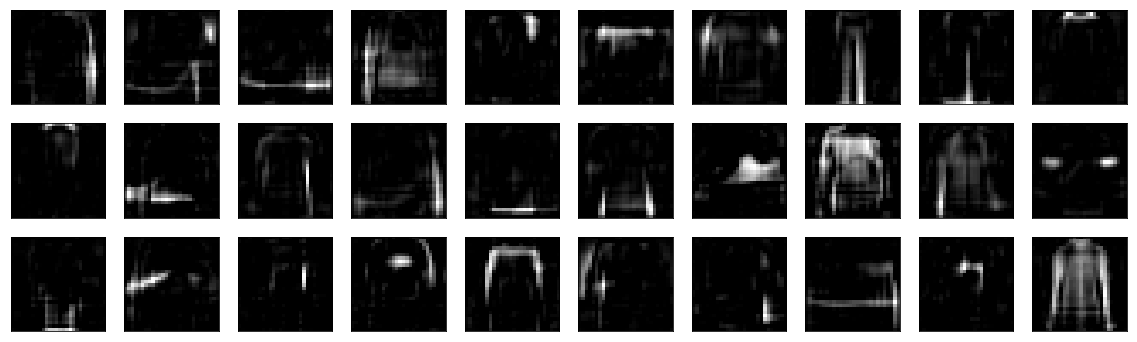

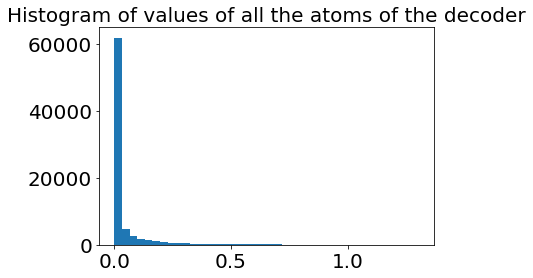

In [71]:
sp_o = 0.2
sp_w = 0.05
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


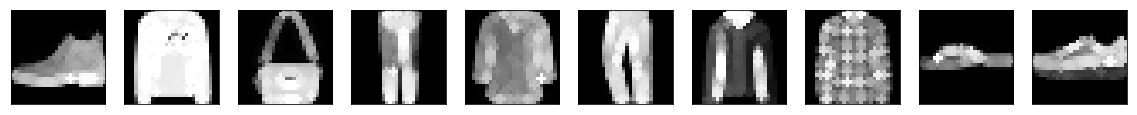

Dilatation of the reconstructions


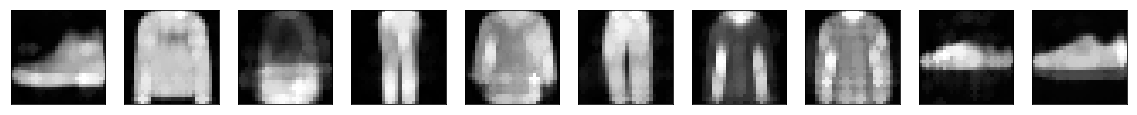

Original images and max-approximation to dilatation
Max-approx error to original:  0.8557066825866699  - Max-approx error to reconstruction:  0.9246668540000915


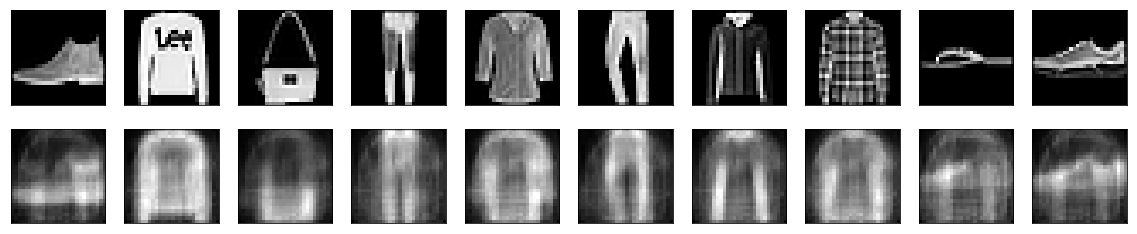

Dilated of the atom images of the decoder


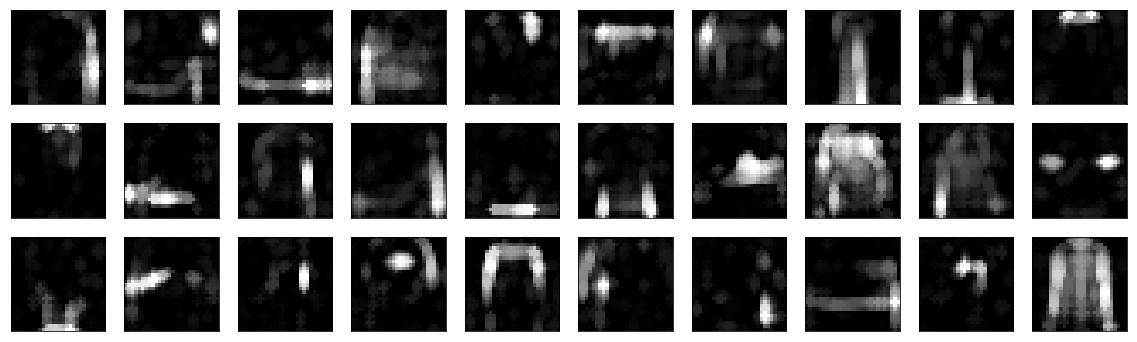

In [72]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.7 Sparsity_weight = 0.1 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.01423719391822815


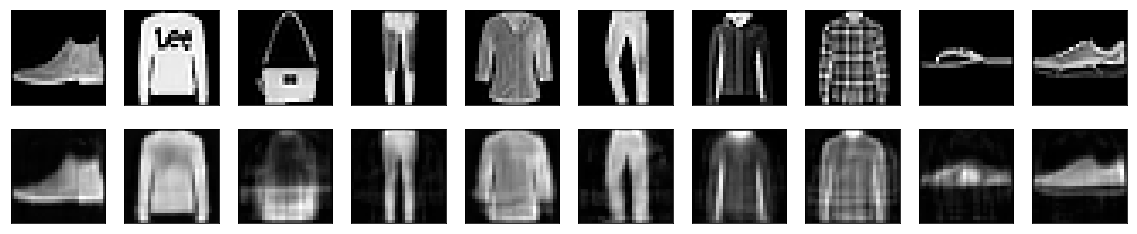

Histograms of the encodings - Sparsity (Hoyer):  0.26026859879493713


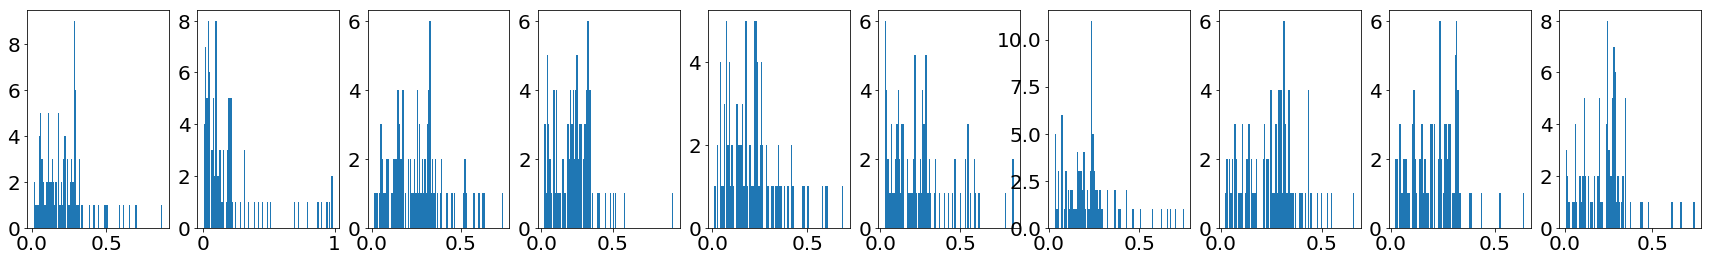

Atom images of the decoder


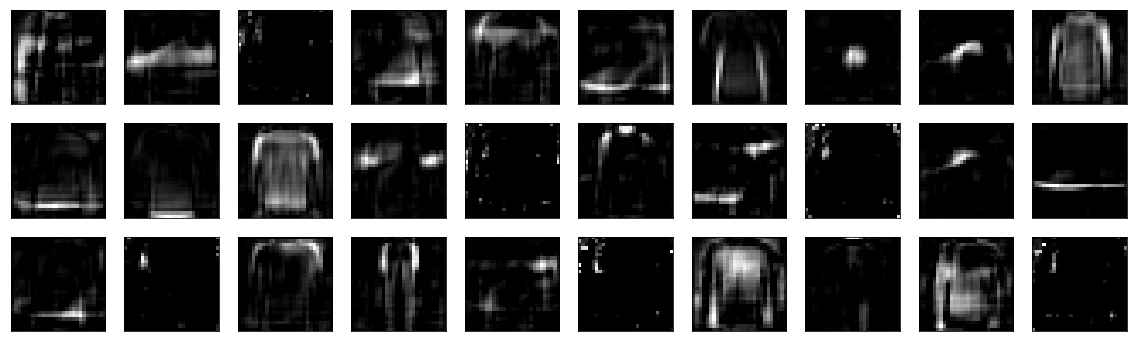

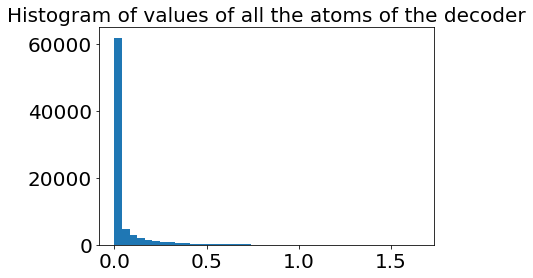

In [73]:
sp_o = 0.2
sp_w = 0.1
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


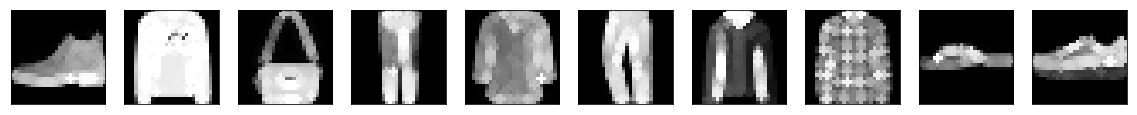

Dilatation of the reconstructions


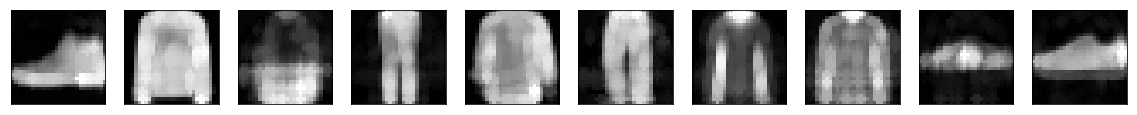

Original images and max-approximation to dilatation
Max-approx error to original:  0.6981829769134521  - Max-approx error to reconstruction:  0.7691156328201294


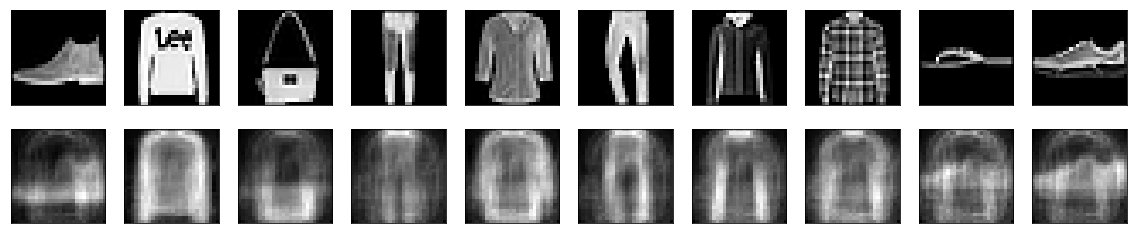

Dilated of the atom images of the decoder


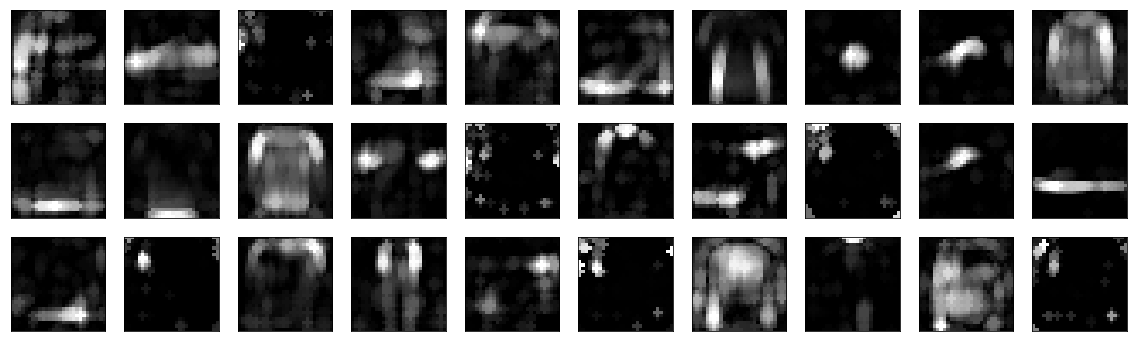

In [74]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)

## 4.8 Sparsity_weight = 0.5 (sp_o = 0.2)

Original images and reconstructions - Reconstruction error:  0.027708542793989183


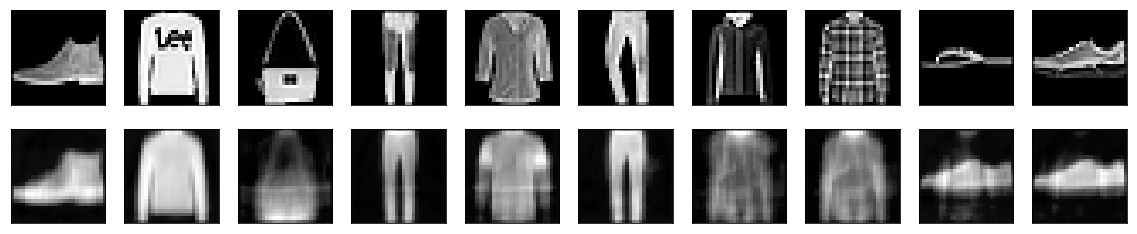

Histograms of the encodings - Sparsity (Hoyer):  0.5101032257080078


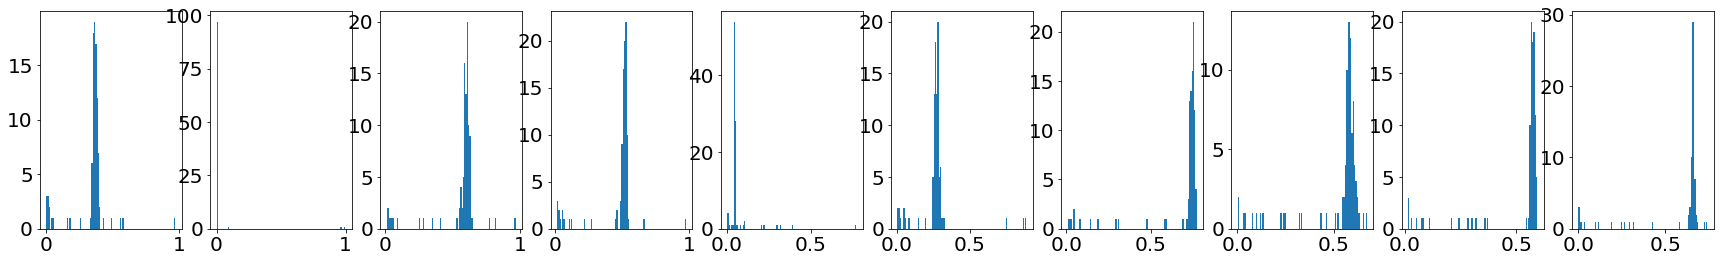

Atom images of the decoder


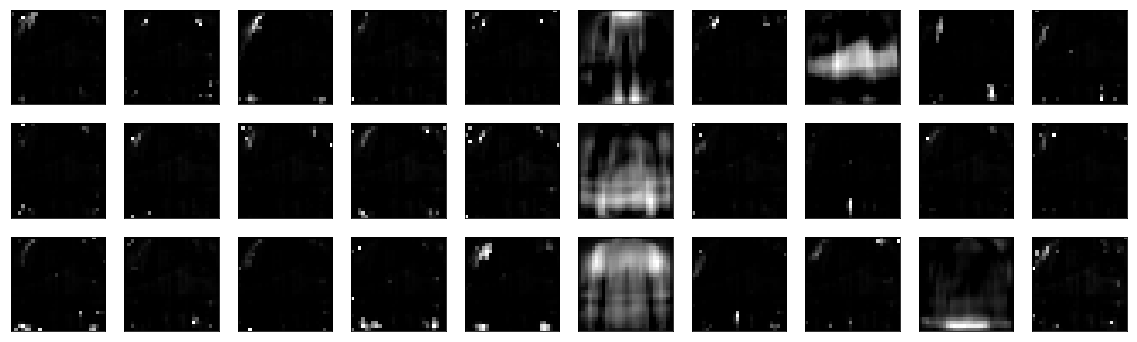

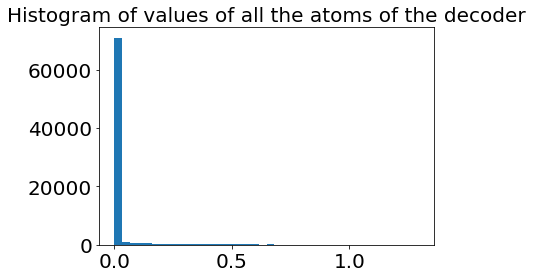

In [75]:
sp_o = 0.2
sp_w = 0.5
i = np.arange(8)[sparsity_weights==sp_w][0]
j = np.arange(4)[sparsity_objectives==sp_o][0]
AE = Sparse_NonNeg_ShallowAE_KLsum_NonNegConstraint.load('18_09_11_dim100_KLdivSum_'+str(sp_w)+'_'+str(sp_o)+'_NonNegConstraint.h5', path_to_model_directory='../Results/ShallowAE/SeveralChannels/WithPADO/')
print('Original images and reconstructions - Reconstruction error: ', test_mse[i,j])
AE.plot_reconstructions(x_small_PADO)
print('Histograms of the encodings - Sparsity (Hoyer): ', test_sparsity[i,j])
AE.plot_histograms_of_the_encoding(x_small_PADO)
print('Atom images of the decoder')
AE.plot_atoms_decoder(nb_to_plot=30)
AE.plot_histograms_of_the_decoder_atoms()

Dilatation of the original images


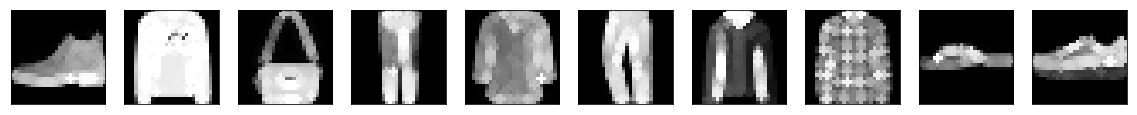

Dilatation of the reconstructions


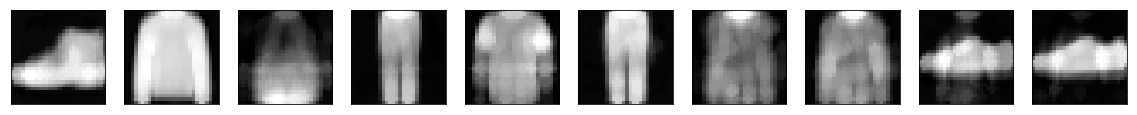

Original images and max-approximation to dilatation
Max-approx error to original:  0.07994751671552658  - Max-approx error to reconstruction:  0.06073821653723717


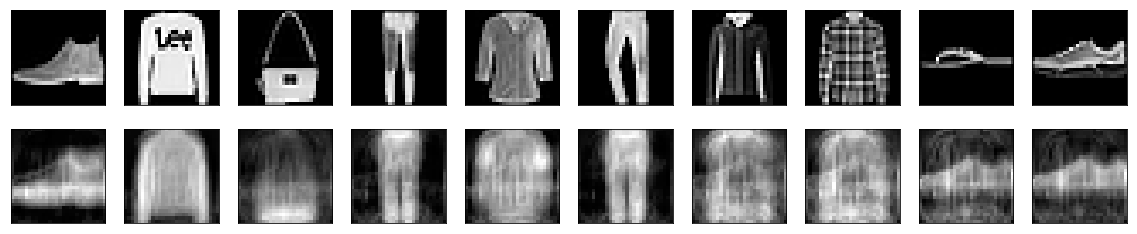

Dilated of the atom images of the decoder


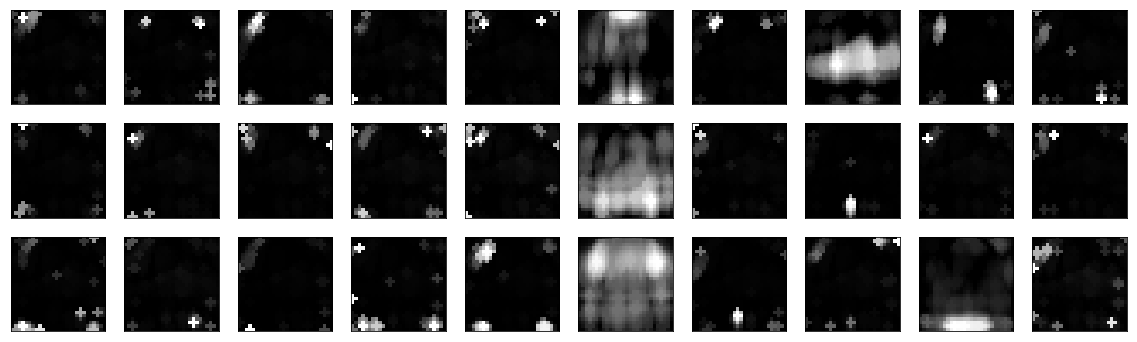

In [76]:
print('Dilatation of the original images')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
print('Dilatation of the reconstructions')
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small_PADO), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=False, SE_scale=1)
print('Original images and max-approximation to dilatation')
print('Max-approx error to original: ', test_max_approx_to_Original[i,j], ' - Max-approx error to reconstruction: ', test_max_approx_to_Rec[i,j])
AE_dil.plot_reconstructions(x_small_PADO)
print('Dilated of the atom images of the decoder')
AE_dil.plot_atoms_decoder(nb_to_plot=30)